# Analysis of new paleomagnetic data from the Umkondo Large Igneous Province

A field season to Botswana in 2012 resulted in the collection of paleomagnetic samples from 32 mafic intrusions (some of them sampled in multiple locations) with the goal of developing new data from the Umkondo large igneous province (LIP). Paleomagnetic data for these intrusions were developed at the Institute for Rock Magnetism and in the new UC Berkeley paleomagnetism lab (as described within the main text).

## Import needed modules for data analysis

In [1]:
import pmag, pmagplotlib, IPmag
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
from IPython.core.display import HTML
import numpy as np
import scipy as sp
from scipy import special
from IPython.display import display, Image
import pickle
%matplotlib inline

def _repr_latex_(self):
 return "\centering{%s}" % self.to_latex() 
pd.DataFrame._repr_latex_ = _repr_latex_ 

## Location of studied sites

Import and display table with location of studied sites.

In [2]:
Site_Locations = pd.read_csv('../Data/Field_Data/BotswanaWaypoints.csv')
Site_Locations

,ID,LAT(WGS84),LONG(WGS84),ELEV(meters),COMMENTS
0,PW1,-24.68781,25.86215,0,same as JP1
1,PW2,-24.68822,25.86452,0,same as JP1
2,PW3,-24.74891,25.65574,0,NaN
3,PW4,-24.69056,25.77397,0,NaN
4,PW5,-24.72715,25.77590,0,NaN
5,PW6,-24.54694,25.80892,982,NaN
6,PW7,-24.47670,25.59706,1084,NaN
7,PW8,-24.47402,25.59705,1110,NaN
8,PW9,-24.45268,25.57415,1129,NaN
9,PW10,-24.41968,25.58463,1125,NaN


### Locality maps of sites      

Location of sites within a map of all of Botswana and then a map zoomed in on the southeast part of the country.

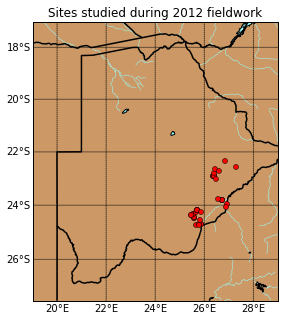

In [3]:
fig = plt.figure(figsize=(5,5))
m = Basemap(projection='merc',llcrnrlat=-27.5,urcrnrlat=-17,llcrnrlon=19,
            urcrnrlon=29,lat_ts=-25,resolution='i',area_thresh = 0.1)
m.drawrivers(color='#99ffff')
m.drawcoastlines()
m.drawcountries(linewidth=1.5)
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
parallels = np.arange(-90,90,2.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(0.,360.,2.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
plt.title('Sites studied during 2012 fieldwork')

site_long=[]
site_lat=[]
for n in range(0,len(Site_Locations)):
    site_long.append(Site_Locations['LONG(WGS84)'][n])          
    site_lat.append(Site_Locations['LAT(WGS84)'][n])  

x,y = m(site_long,site_lat)
m.plot(x, y, 'ro', markersize=5)
plt.show()

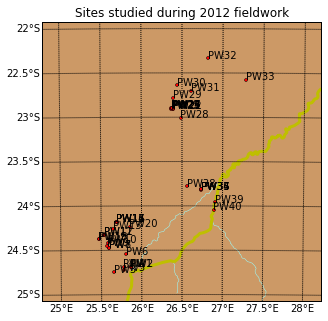

In [4]:
fig = plt.figure(figsize=(5,5))
m = Basemap(projection='aea',lat_0=-23.5,lon_0=26.5,resolution='f',
            width=350000,height=350000)
m.drawrivers(color='#99ffff')
m.drawcoastlines()
m.drawcountries(linewidth=3, color='y')
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
parallels = np.arange(-90,90,0.5)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(0.,360.,0.5)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
plt.title('Sites studied during 2012 fieldwork')

x,y = m(site_long,site_lat)
m.plot(x, y, 'ro', markersize=3)

labels = Site_Locations['ID']    
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+1000, ypt, label)

plt.savefig('Code_Output/Botswana_detailed_map_2.pdf')

plt.show()

## Analysis of demagnetization data from the newly samples sites

Samples from every site underwent alternating field (AF) demagnetization at the Institute for Rock Magnetism. A subset of sampled localities (31 out of 40) were selected to undergo thermal demagnetization at the UC Berkeley Paleomagnetism Lab. Six samples from each of these 31 localities underwent thermal demagnetization. For both the thermal and AF demagnetizations, samples underwent a liquid nitrogen immersion in a very low field environment after the natural remanent magnetization (NRM) was measured with the goal of removing remanence associated with multidomain magnetite which undergoes low-temperature demagnetization when cycled through the isotropic point (~130 K) and the Verwey transition (~120 K).

Principle component analysis was conducted using on the data using the PmagPy software package as implemented in the demag_gui.py program. Least-squares fits to the data are stored in the pmag_specimens.txt files and are imported below.

In [5]:
PW1_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW1/pmag_specimens.txt',
                     sep='\t',header=1)
PW3_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW3/pmag_specimens.txt',
                     sep='\t',header=1)
PW4_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW4/pmag_specimens.txt',
                     sep='\t',header=1)
PW5_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW5/pmag_specimens.txt',
                     sep='\t',header=1)
PW6_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW6/pmag_specimens.txt',
                     sep='\t',header=1)
PW7_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW7/pmag_specimens.txt',
                     sep='\t',header=1)
PW9_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW9/pmag_specimens.txt',
                     sep='\t',header=1)
PW10_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW10/pmag_specimens.txt',
                      sep='\t',header=1)
PW11_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW11/pmag_specimens.txt',
                      sep='\t',header=1)
PW13_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW13/pmag_specimens.txt',
                      sep='\t',header=1)
PW15_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW15/pmag_specimens.txt',
                      sep='\t',header=1)
PW18_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW18/pmag_specimens.txt',
                      sep='\t',header=1)
PW19_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW19/pmag_specimens.txt',
                      sep='\t',header=1)
PW20_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW20/pmag_specimens.txt',
                      sep='\t',header=1)
PW22_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW22/pmag_specimens.txt',
                      sep='\t',header=1)
PW23_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW23/pmag_specimens.txt',
                      sep='\t',header=1)
PW24_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW24/pmag_specimens.txt',
                      sep='\t',header=1)
PW25_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW25/pmag_specimens.txt',
                      sep='\t',header=1)
PW26_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW26/pmag_specimens.txt',
                      sep='\t',header=1)
PW27_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW27/pmag_specimens.txt',
                      sep='\t',header=1)
PW28_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW28/pmag_specimens.txt',
                      sep='\t',header=1)
PW29_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW29/pmag_specimens.txt',
                      sep='\t',header=1)
PW30_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW30/pmag_specimens.txt',
                      sep='\t',header=1)
PW31_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW31/pmag_specimens.txt',
                      sep='\t',header=1)
PW32_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW32/pmag_specimens.txt',
                      sep='\t',header=1)
PW34_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW34/pmag_specimens.txt',
                      sep='\t',header=1)
PW36_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW36/pmag_specimens.txt',
                      sep='\t',header=1)
PW37_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW37/pmag_specimens.txt',
                      sep='\t',header=1)
PW38_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW38/pmag_specimens.txt',
                      sep='\t',header=1)
PW39_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW39/pmag_specimens.txt',
                      sep='\t',header=1)
PW40_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_HT/PW40/pmag_specimens.txt',
                      sep='\t',header=1)

In [6]:
#slice dataframe to include only tilt corrected fits
PW1_tc = PW1_data[PW1_data['specimen_tilt_correction'] == 100]
PW1_tc.reset_index(inplace=True)
PW3_tc = PW3_data[PW3_data['specimen_tilt_correction'] == 100]
PW3_tc.reset_index(inplace=True)
PW4_tc = PW4_data[PW4_data['specimen_tilt_correction'] == 100]
PW4_tc.reset_index(inplace=True)
PW5_tc = PW5_data[PW5_data['specimen_tilt_correction'] == 100]
PW5_tc.reset_index(inplace=True)
PW6_tc = PW6_data[PW6_data['specimen_tilt_correction'] == 100]
PW6_tc.reset_index(inplace=True)
PW7_tc = PW7_data[PW7_data['specimen_tilt_correction'] == 100]
PW7_tc.reset_index(inplace=True)
PW9_tc = PW9_data[PW9_data['specimen_tilt_correction'] == 100]
PW9_tc.reset_index(inplace=True)
PW10_tc = PW10_data[PW10_data['specimen_tilt_correction'] == 100]
PW10_tc.reset_index(inplace=True)
PW11_tc = PW11_data[PW11_data['specimen_tilt_correction'] == 100]
PW11_tc.reset_index(inplace=True)
PW13_tc = PW13_data[PW13_data['specimen_tilt_correction'] == 100]
PW13_tc.reset_index(inplace=True)
PW15_tc = PW15_data[PW15_data['specimen_tilt_correction'] == 100]
PW15_tc.reset_index(inplace=True)
PW18_tc = PW18_data[PW18_data['specimen_tilt_correction'] == 100]
PW18_tc.reset_index(inplace=True)
PW19_tc = PW19_data[PW19_data['specimen_tilt_correction'] == 100]
PW19_tc.reset_index(inplace=True)
PW20_tc = PW20_data[PW20_data['specimen_tilt_correction'] == 100]
PW20_tc.reset_index(inplace=True)
PW22_tc = PW22_data[PW22_data['specimen_tilt_correction'] == 100]
PW22_tc.reset_index(inplace=True)
PW23_tc = PW23_data[PW23_data['specimen_tilt_correction'] == 100]
PW23_tc.reset_index(inplace=True)
PW24_tc = PW24_data[PW24_data['specimen_tilt_correction'] == 100]
PW24_tc.reset_index(inplace=True)
PW25_tc = PW25_data[PW25_data['specimen_tilt_correction'] == 100]
PW25_tc.reset_index(inplace=True)
PW26_tc = PW26_data[PW26_data['specimen_tilt_correction'] == 100]
PW26_tc.reset_index(inplace=True)
PW27_tc = PW27_data[PW27_data['specimen_tilt_correction'] == 100]
PW27_tc.reset_index(inplace=True)
PW28_tc = PW28_data[PW28_data['specimen_tilt_correction'] == 100]
PW28_tc.reset_index(inplace=True)
PW29_tc = PW29_data[PW29_data['specimen_tilt_correction'] == 100]
PW29_tc.reset_index(inplace=True)
PW30_tc = PW30_data[PW30_data['specimen_tilt_correction'] == 100]
PW30_tc.reset_index(inplace=True)
PW31_tc = PW31_data[PW31_data['specimen_tilt_correction'] == 100]
PW31_tc.reset_index(inplace=True)
PW32_tc = PW32_data[PW32_data['specimen_tilt_correction'] == 100]
PW32_tc.reset_index(inplace=True)
PW34_tc = PW34_data[PW34_data['specimen_tilt_correction'] == 100]
PW34_tc.reset_index(inplace=True)
PW36_tc = PW36_data[PW36_data['specimen_tilt_correction'] == 100]
PW36_tc.reset_index(inplace=True)
PW37_tc = PW37_data[PW37_data['specimen_tilt_correction'] == 100]
PW37_tc.reset_index(inplace=True)
PW38_tc = PW38_data[PW38_data['specimen_tilt_correction'] == 100]
PW38_tc.reset_index(inplace=True)
PW39_tc = PW39_data[PW39_data['specimen_tilt_correction'] == 100]
PW39_tc.reset_index(inplace=True)
PW40_tc = PW40_data[PW40_data['specimen_tilt_correction'] == 100]
PW40_tc.reset_index(inplace=True)

Below is the table with all tilt-correction parameters in dip direction and dip with a short explanation of what orientation is being used. The values are 0 if no tilt-correction was applied. Also shown is the declination correction used for each individual site's bedding. This correction was only used for bedding measurements, as sun compass data were used for orienting paleomagnetic samples. Declination corrections were calculated using IGRF11 and were determined using individual locality coordinates.

In [7]:
PW_tilt_corrections=pd.read_csv('../Data/Field_Data/Botswana_tilt_corr.csv',header=0)
PW_tilt_corrections

,Site_ID,Dip_dir,Dip,Dec_cor,Dip_dir_cor,Explanation
0,PW1,240,6,-15.40,224.60,orientation of sill
1,PW2,240,6,-15.40,224.60,orientation of sill
2,PW3,346,5,-15.44,330.56,bedding of Waterberg sandstone that sits atop ...
3,PW4,52,5,-15.38,36.62,bedding of Waterberg sandstone
4,PW5,0,0,-15.44,0.00,no availible orientation information
5,PW6,0,0,-15.20,0.00,no availible orientation information
6,PW7,0,0,-15.06,0.00,appears to be planar-tabular and sub-horizontal
7,PW8,0,0,-15.06,0.00,appears to be planar-tabular and sub-horizontal
8,PW9,0,0,-15.01,0.00,"lack orientation information, sill is overall ..."
9,PW10,345,7,-14.97,330.03,orientation of sub-horizontal planes that are ...


## Data Reduction and Tabulation of Botswana sites

What follows is a site by site analysis of the sample directions determined through the least-square fits. When interpretable thermal and AF demagnetization data were both developed from specimens of the same sample, the thermal data are preferentially used.

### Kgale Peak Sill - PW1, PW2, JP1, JP2, JP3, and J_M9

The behavior of JP1/2/3 (prior data) lacks consistency and these data are unlike PW1, which was very well behaved. 'Site 9' from Jones and McElhinny (1966) is consistent with our results (S-seeking direction); in contrast to the north-seeking direction reported by Pancake (2001).

#### PW1

All samples from PW1 are well-behaved and consistent.

/Users/taylorkilian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


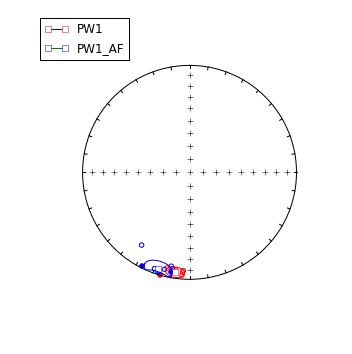

In [8]:
#Import AF data and plot on same equal-area plot
PW1_AFdata=pd.read_csv('../Data/Botswana_AF/PW1/pmag_specimens.txt',
                       sep='\t',header=1)
PW1_AFtc = PW1_AFdata[PW1_AFdata['specimen_tilt_correction'] == 100]
PW1_AFtc.reset_index(inplace=True)

PW1_AFtc_dir=[]
PW1_tc_dir=[]
for n in range(len(PW1_tc)):
    Dec,Inc=PW1_tc['specimen_dec'][n],PW1_tc['specimen_inc'][n]
    PW1_tc_dir.append([Dec,Inc,1.])
PW1_tc_mean=pmag.fisher_mean(PW1_tc_dir)
for n in range(len(PW1_AFtc)):
    Dec,Inc=PW1_AFtc['specimen_dec'][n],PW1_AFtc['specimen_inc'][n]
    PW1_AFtc_dir.append([Dec,Inc,1.])
PW1_AFtc_mean=pmag.fisher_mean(PW1_AFtc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW1_tc_dir,color='red')
IPmag.iplotDImean(PW1_tc_mean['dec'],PW1_tc_mean['inc'],
                  PW1_tc_mean["alpha95"],color='r',marker='s',
                  label='PW1')
IPmag.iplotDI(PW1_AFtc_dir,color='blue')
IPmag.iplotDImean(PW1_AFtc_mean['dec'],PW1_AFtc_mean['inc'],
                  PW1_AFtc_mean["alpha95"],color='b',marker='s',
                  label='PW1_AF')
plt.show()

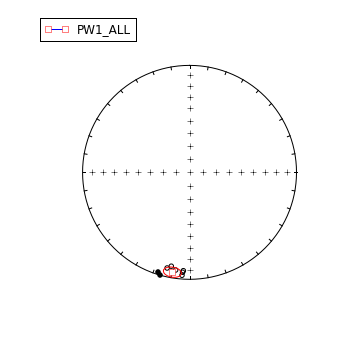

In [9]:
#Combine AF and thermal data for single mean for this site.
#We favor THERMAL data points, so if there are duplicate vectors...
#...for the same sample, the AF vector is dropped
PW1_ALL = PW1_AFtc
PW1_ALL = PW1_ALL.append(PW1_tc)
PW1_ALL.reset_index(drop=True, inplace=True)
PW1_ALL = PW1_ALL.drop(1)
PW1_ALL = PW1_ALL.drop(2)
PW1_ALL = PW1_ALL.drop(3)
PW1_ALL = PW1_ALL.drop(4)
PW1_ALL = PW1_ALL.drop(5)
PW1_ALL = PW1_ALL.drop(6)
PW1_ALL.reset_index(drop=True, inplace=True)
PW1_ALL_dir=[]
for n in range(len(PW1_ALL)):
    Dec,Inc=PW1_ALL['specimen_dec'][n],PW1_ALL['specimen_inc'][n]
    PW1_ALL_dir.append([Dec,Inc,1.])
PW1_ALL_mean=pmag.fisher_mean(PW1_ALL_dir)
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW1_ALL_dir,color='k')
IPmag.iplotDImean(PW1_ALL_mean['dec'],PW1_ALL_mean['inc'],
                 PW1_ALL_mean["alpha95"],color='r',marker='s',
                 label='PW1_ALL')
plt.show()

#### PW2

These samples are from the upper chilled margin of the same Kgale Peak sill as PW1. Only AF data were developed for this site. Four samples are very consistent with each other with slightly steeper than results from PW1.

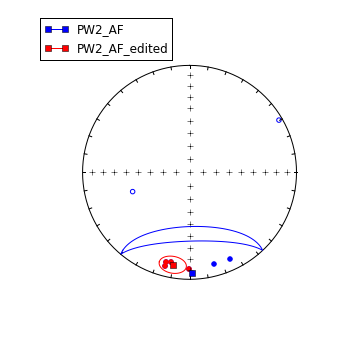

In [10]:
PW2_AFdata=pd.read_csv('../Data/Botswana_AF/PW2/pmag_specimens.txt',
                       sep='\t',header=1)
PW2_AFtc = PW2_AFdata[PW2_AFdata['specimen_tilt_correction'] == 100]
PW2_AFtc.reset_index(drop=True, inplace=True)

PW2_AFtc_dir=[]
for n in range(len(PW2_AFtc)):
    Dec,Inc=PW2_AFtc['specimen_dec'][n],PW2_AFtc['specimen_inc'][n]
    PW2_AFtc_dir.append([Dec,Inc,1.])
PW2_AFtc_mean=pmag.fisher_mean(PW2_AFtc_dir)

#Drop samples already measured with thermal demag
PW2_AFtc_edit = PW2_AFtc
PW2_AFtc_edit = PW2_AFtc_edit.drop(0)
PW2_AFtc_edit = PW2_AFtc_edit.drop(1)
PW2_AFtc_edit = PW2_AFtc_edit.drop(4)
PW2_AFtc_edit = PW2_AFtc_edit.drop(5)
PW2_AFtc_edit.reset_index(drop=True, inplace=True)
PW2_AFtc_edit_dir=[]
for n in range(len(PW2_AFtc_edit)):
    Dec,Inc=PW2_AFtc_edit['specimen_dec'][n],PW2_AFtc_edit['specimen_inc'][n]
    PW2_AFtc_edit_dir.append([Dec,Inc,1.])
PW2_AFtc_edit_mean=pmag.fisher_mean(PW2_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW2_AFtc_dir,color='blue')
IPmag.iplotDImean(PW2_AFtc_mean['dec'],PW2_AFtc_mean['inc'],
                  PW2_AFtc_mean["alpha95"],color='b',marker='s',
                  label='PW2_AF')
IPmag.iplotDI(PW2_AFtc_edit_dir,color='red')
IPmag.iplotDImean(PW2_AFtc_edit_mean['dec'],PW2_AFtc_edit_mean['inc'],
                  PW2_AFtc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW2_AF_edited')

#### JP(1,2,3)

Both PW1 and PW2 are from the same intrusion as Pancake's JP1, JP2, and JP3 data. Only site JP1 yielded stable results, a mean with an $\alpha_{95}$ of 19.1 and has a northerly declination. Our thermal and AF results seem to be more stable and consistent, especially considering Pancake's other sites from the same sill PW2 and PW3 did not yield stable results. Notably, both our data and that from Jones and McElhinny (1966) indicate a south-seeking direction for the sill.

#### Combined Kgale sill mean - PW1_ALL, PW2_AF

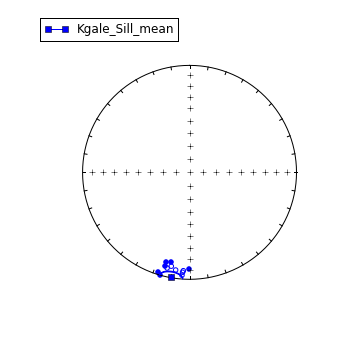

In [11]:
Kgale_Sill=[]
Kgale_Sill = PW2_AFtc_edit_dir + PW1_ALL_dir
Kgale_Sill_mean=pmag.fisher_mean(Kgale_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Kgale_Sill,color='blue')
IPmag.iplotDImean(Kgale_Sill_mean['dec'],Kgale_Sill_mean['inc'],
                  Kgale_Sill_mean["alpha95"],color='b',marker='s',
                  label='Kgale_Sill_mean')

In [12]:
Intrusion_mean_directions = pd.DataFrame(columns=['Intrusion_name',
                                    'sites_used','site_lat','site_long',
                                    'n','dec_tc','inc_tc','a_95','k',
                                    'date','date_error','dip_direction','dip'])
Intrusion_mean_directions.loc['Kgale_Peak_Sill']=pd.Series({'Intrusion_name':
                                'Kgale_Peak_Sill', 
                                'sites_used':'PW1_ALL and PW2_AF',
                                'site_lat':Site_Locations['LAT(WGS84)'][0], 
                                'site_long':Site_Locations['LONG(WGS84)'][0],
                                'n':int(Kgale_Sill_mean['n']),
                                'dec_tc':round(Kgale_Sill_mean['dec'],1),
                                'inc_tc':round(Kgale_Sill_mean['inc'],1),
                                'a_95':round(Kgale_Sill_mean['alpha95'],1),
                                'k':round(Kgale_Sill_mean['k'],1),
                                'date':'1108.0',
                                'date_error':'0.9',
                                'dip_direction':224.6,
                                'dip':6}) 
Intrusion_mean_directions

,Intrusion_name,sites_used,site_lat,site_long,n,dec_tc,inc_tc,a_95,k,date,date_error,dip_direction,dip
Kgale_Peak_Sill,Kgale_Peak_Sill,PW1_ALL and PW2_AF,-24.68781,25.86215,12,189.9,0.4,6.3,48.8,1108.0,0.9,224.6,6


We will continue to add to the table above as more VGPs are calculated. The full table will be shown at the end of the data analysis.

### Manyana Sill - PW3
#### Thermal data
Some samples from PW3 are well-behaved and consistent, but three give scattered directions.

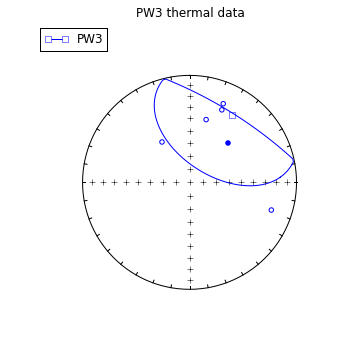

In [13]:
PW3_tc_dir=[]
for n in range(len(PW3_tc)):
    Dec,Inc=PW3_tc['specimen_dec'][n],PW3_tc['specimen_inc'][n]
    PW3_tc_dir.append([Dec,Inc,1.])
PW3_tc_mean=pmag.fisher_mean(PW3_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW3_tc_dir,color='b')
IPmag.iplotDImean(PW3_tc_mean['dec'],PW3_tc_mean['inc'],
                  PW3_tc_mean["alpha95"],color='b',marker='s',label='PW3')
plt.title('PW3 thermal data')
plt.show()

#### AF data

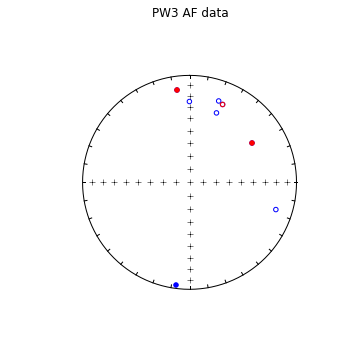

In [14]:
PW3_AFdata=pd.read_csv('../Data/Botswana_AF/PW3/pmag_specimens.txt',
                       sep='\t',header=1)
PW3_AFtc = PW3_AFdata[PW3_AFdata['specimen_tilt_correction'] == 100]
PW3_AFtc.reset_index(drop=True, inplace=True)

PW3_AFtc_dir=[]
for n in range(len(PW3_AFtc)):
    Dec,Inc=PW3_AFtc['specimen_dec'][n],PW3_AFtc['specimen_inc'][n]
    PW3_AFtc_dir.append([Dec,Inc,1.])
PW3_AFtc_mean=pmag.fisher_mean(PW3_AFtc_dir)

#Drop pts from mean that are AF specimens from same samples as Thermal demag..
PW3_AFtc_edit = PW3_AFtc
PW3_AFtc_edit = PW3_AFtc_edit.drop(0)
PW3_AFtc_edit = PW3_AFtc_edit.drop(1)
PW3_AFtc_edit = PW3_AFtc_edit.drop(3)
PW3_AFtc_edit = PW3_AFtc_edit.drop(4)
PW3_AFtc_edit = PW3_AFtc_edit.drop(5)
PW3_AFtc_edit.reset_index(drop=True, inplace=True)
PW3_AFtc_edit_dir=[]
for n in range(len(PW3_AFtc_edit)):
    Dec,Inc=PW3_AFtc_edit['specimen_dec'][n],PW3_AFtc_edit['specimen_inc'][n]
    PW3_AFtc_edit_dir.append([Dec,Inc,1.])
PW3_AFtc_edit_mean=pmag.fisher_mean(PW3_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW3_AFtc_dir,color='blue',label='redundant AF data')
IPmag.iplotDI(PW3_AFtc_edit_dir,color='red',label='AF data from new samples')
plt.title('PW3 AF data')
plt.show()

#### Combined Manyana Sill Mean - PW3_ALL

There is a grouping of samples plotting NNE and up. However we determined that the results too scattered for us to consider that we have a well-determined direction and the data are not added to the compilation.

{'alpha95': 36.583276959714155,
 'csd': 47.254004096267487,
 'dec': 28.364455683342069,
 'inc': -13.383785314736791,
 'k': 2.9382774935077776,
 'n': 9,
 'r': 6.2773163808808841}

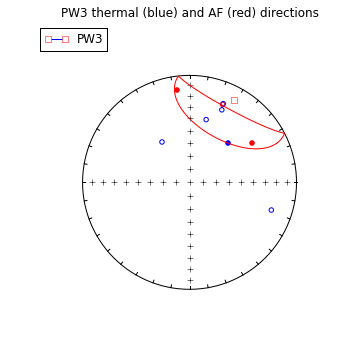

In [15]:
Manyana_Sill=[]
Manyana_Sill = PW3_AFtc_edit_dir + PW3_tc_dir
Manyana_Sill_mean=pmag.fisher_mean(Manyana_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW3_AFtc_edit_dir,color='red')
IPmag.iplotDI(PW3_tc_dir,color='blue')
IPmag.iplotDImean(Manyana_Sill_mean['dec'],Manyana_Sill_mean['inc'],
                  Manyana_Sill_mean["alpha95"],color='r',marker='s',
                  label='PW3')
plt.title('PW3 thermal (blue) and AF (red) directions')
Manyana_Sill_mean

### Ranku Hill Sill - PW4

#### Thermal demag

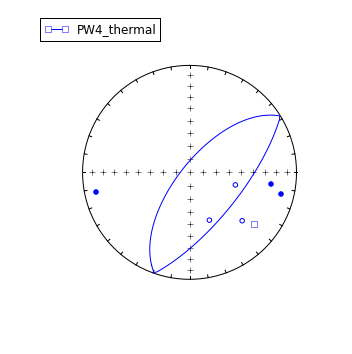

In [16]:
PW4_tc_dir=[]
for n in range(len(PW4_tc)):
    Dec,Inc=PW4_tc['specimen_dec'][n],PW4_tc['specimen_inc'][n]
    PW4_tc_dir.append([Dec,Inc,1.])
PW4_tc_mean=pmag.fisher_mean(PW4_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW4_tc_dir,color='blue')
IPmag.iplotDImean(PW4_tc_mean['dec'],PW4_tc_mean['inc'],
                  PW4_tc_mean["alpha95"],color='b',marker='s',
                  label='PW4_thermal')

#### AF demag

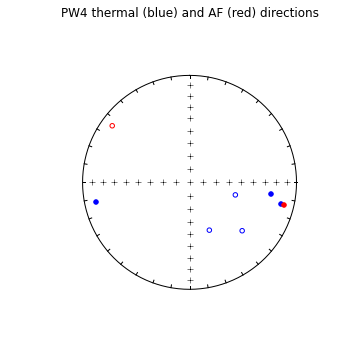

In [17]:
PW4_AFdata=pd.read_csv('../Data/Botswana_AF/PW4/pmag_specimens.txt',
                       sep='\t',header=1)
PW4_AFtc = PW4_AFdata[PW4_AFdata['specimen_tilt_correction'] == 100]
PW4_AFtc.reset_index(drop=True, inplace=True)

PW4_AFtc_dir=[]
for n in range(len(PW4_AFtc)):
    Dec,Inc=PW4_AFtc['specimen_dec'][n],PW4_AFtc['specimen_inc'][n]
    PW4_AFtc_dir.append([Dec,Inc,1.])
PW4_AFtc_mean=pmag.fisher_mean(PW4_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW4_AFtc_edit = PW4_AFtc
PW4_AFtc_edit = PW4_AFtc_edit.drop(1)
PW4_AFtc_edit = PW4_AFtc_edit.drop(2)
PW4_AFtc_edit = PW4_AFtc_edit.drop(3)
PW4_AFtc_edit = PW4_AFtc_edit.drop(4)
PW4_AFtc_edit = PW4_AFtc_edit.drop(5)
PW4_AFtc_edit = PW4_AFtc_edit.drop(6)
PW4_AFtc_edit.reset_index(drop=True, inplace=True)
PW4_AFtc_edit_dir=[]
for n in range(len(PW4_AFtc_edit)):
    Dec,Inc=PW4_AFtc_edit['specimen_dec'][n],PW4_AFtc_edit['specimen_inc'][n]
    PW4_AFtc_edit_dir.append([Dec,Inc,1.])
PW4_AFtc_edit_mean=pmag.fisher_mean(PW4_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW4_tc_dir,color='blue')
IPmag.iplotDI(PW4_AFtc_edit_dir,color='red')
plt.title('PW4 thermal (blue) and AF (red) directions')
plt.show()

This site does not yield a consistent mean and is not included in the compilation dataset.

### Rasemong North intrusion - PW5

There is good agreement among all samples yielding a north-seeking direction that we interpret as an Umkondo LIP direction.

#### Thermal demag

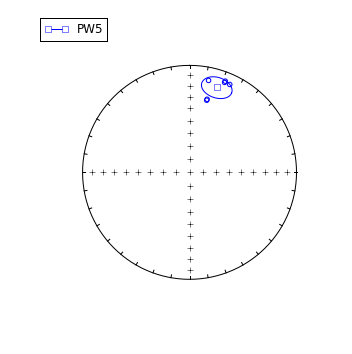

In [18]:
PW5_tc_dir=[]
for n in range(len(PW5_tc)):
    Dec,Inc=PW5_tc['specimen_dec'][n],PW5_tc['specimen_inc'][n]
    PW5_tc_dir.append([Dec,Inc,1.])
PW5_tc_mean=pmag.fisher_mean(PW5_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW5_tc_dir,color='b')
IPmag.iplotDImean(PW5_tc_mean['dec'],PW5_tc_mean['inc'],
                  PW5_tc_mean["alpha95"],color='b',marker='s',
                  label='PW5')


#### AF demag

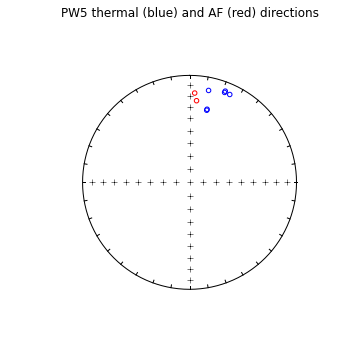

In [19]:
PW5_AFdata=pd.read_csv('../Data/Botswana_AF/PW5/pmag_specimens.txt',
                       sep='\t',header=1)
PW5_AFtc = PW5_AFdata[PW5_AFdata['specimen_tilt_correction'] == 100]
PW5_AFtc.reset_index(drop=True, inplace=True)

PW5_AFtc_dir=[]
for n in range(len(PW5_AFtc)):
    Dec,Inc=PW5_AFtc['specimen_dec'][n],PW5_AFtc['specimen_inc'][n]
    PW5_AFtc_dir.append([Dec,Inc,1.])
PW5_AFtc_mean=pmag.fisher_mean(PW5_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW5_AFtc_edit = PW5_AFtc
PW5_AFtc_edit = PW5_AFtc_edit.drop(0)
PW5_AFtc_edit = PW5_AFtc_edit.drop(1)
PW5_AFtc_edit = PW5_AFtc_edit.drop(2)
PW5_AFtc_edit = PW5_AFtc_edit.drop(4)
PW5_AFtc_edit = PW5_AFtc_edit.drop(5)
PW5_AFtc_edit = PW5_AFtc_edit.drop(6)
PW5_AFtc_edit.reset_index(drop=True, inplace=True)
PW5_AFtc_edit_dir=[]
for n in range(len(PW5_AFtc_edit)):
    Dec,Inc=PW5_AFtc_edit['specimen_dec'][n],PW5_AFtc_edit['specimen_inc'][n]
    PW5_AFtc_edit_dir.append([Dec,Inc,1.])
PW5_AFtc_edit_mean=pmag.fisher_mean(PW5_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW5_tc_dir,color='blue')
IPmag.iplotDI(PW5_AFtc_edit_dir,color='red')
plt.title('PW5 thermal (blue) and AF (red) directions')
plt.show()

There is very good agreement between all of the thermal and AF results. Two samples with AF results were added to the mean - these samples lacked thermal demagnetization data.

#### Combined Rasemong Sill Mean - PW5_ALL

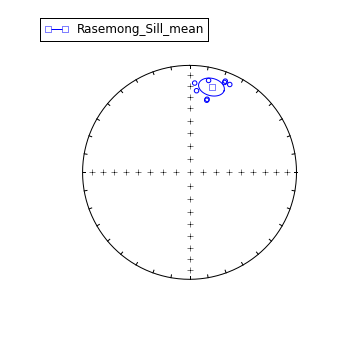

In [20]:
Rasemong_Sill=[]
Rasemong_Sill = PW5_AFtc_edit_dir + PW5_tc_dir
Rasemong_Sill_mean=pmag.fisher_mean(Rasemong_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Rasemong_Sill,color='blue')
IPmag.iplotDImean(Rasemong_Sill_mean['dec'],Rasemong_Sill_mean['inc'],
                  Rasemong_Sill_mean["alpha95"],color='b',marker='s',
                  label='Rasemong_Sill_mean')

In [21]:
Intrusion_mean_directions.loc['Rasemong_Sill']=pd.Series({'Intrusion_name':
                                'Rasemong_Sill','sites_used':'PW5_ALL',
                                'site_lat':Site_Locations['LAT(WGS84)'][4], 
                                'site_long':Site_Locations['LONG(WGS84)'][4],
                                'n':int(Rasemong_Sill_mean['n']),
                                'dec_tc':round(Rasemong_Sill_mean['dec'],1),
                                'inc_tc':round(Rasemong_Sill_mean['inc'],1),
                                'a_95':round(Rasemong_Sill_mean['alpha95'],1),
                                'k':round(Rasemong_Sill_mean['k'],1),
                                'dip_direction':0,
                                'dip':0})
Intrusion_mean_directions.ix['Rasemong_Sill']

Intrusion_name    Rasemong_Sill
sites_used              PW5_ALL
site_lat              -24.72715
site_long               25.7759
n                             8
dec_tc                     14.4
inc_tc                    -18.6
a_95                        8.1
k                            48
date                        NaN
date_error                  NaN
dip_direction                 0
dip                           0
Name: Rasemong_Sill, dtype: object

### Metsemotlhaba River Sill - PW6

#### Thermal demag

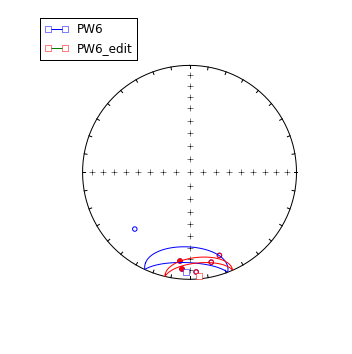

In [22]:
PW6_tc_dir=[]
for n in range(len(PW6_tc)):
    Dec,Inc=PW6_tc['specimen_dec'][n],PW6_tc['specimen_inc'][n]
    PW6_tc_dir.append([Dec,Inc,1.])
PW6_tc_mean=pmag.fisher_mean(PW6_tc_dir)

#Excluding one outlier point
PW6_tc_edit = PW6_tc
PW6_tc_edit = PW6_tc_edit.drop(0)
PW6_tc_edit.reset_index(inplace=True)

PW6_tc_edit_dir=[]
for n in range(len(PW6_tc_edit)):
    Dec,Inc=PW6_tc_edit['specimen_dec'][n],PW6_tc_edit['specimen_inc'][n]
    PW6_tc_edit_dir.append([Dec,Inc,1.])
PW6_tc_edit_mean=pmag.fisher_mean(PW6_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW6_tc_dir,color='b')
IPmag.iplotDImean(PW6_tc_mean['dec'],PW6_tc_mean['inc'],
                  PW6_tc_mean["alpha95"],color='b',marker='s',
                  label='PW6')
IPmag.iplotDI(PW6_tc_edit_dir,color='r')
IPmag.iplotDImean(PW6_tc_edit_mean['dec'],PW6_tc_edit_mean['inc'],
                  PW6_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW6_edit')

#### AF demag

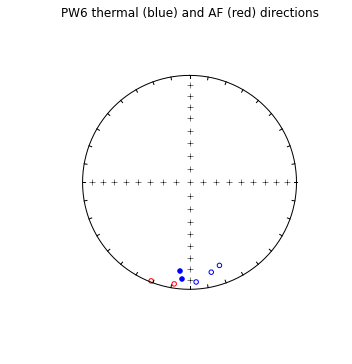

In [23]:
PW6_AFdata=pd.read_csv('../Data/Botswana_AF/PW6/pmag_specimens.txt',
                       sep='\t',header=1)
PW6_AFtc = PW6_AFdata[PW6_AFdata['specimen_tilt_correction'] == 100]
PW6_AFtc.reset_index(drop=True, inplace=True)

PW6_AFtc_dir=[]
for n in range(len(PW6_AFtc)):
    Dec,Inc=PW6_AFtc['specimen_dec'][n],PW6_AFtc['specimen_inc'][n]
    PW6_AFtc_dir.append([Dec,Inc,1.])
PW6_AFtc_mean=pmag.fisher_mean(PW6_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW6_AFtc_edit = PW6_AFtc
PW6_AFtc_edit = PW6_AFtc_edit.drop(2)
PW6_AFtc_edit = PW6_AFtc_edit.drop(3)
PW6_AFtc_edit = PW6_AFtc_edit.drop(4)
PW6_AFtc_edit = PW6_AFtc_edit.drop(5)
PW6_AFtc_edit = PW6_AFtc_edit.drop(6)
PW6_AFtc_edit.reset_index(drop=True, inplace=True)
PW6_AFtc_edit_dir=[]
for n in range(len(PW6_AFtc_edit)):
    Dec,Inc=PW6_AFtc_edit['specimen_dec'][n],PW6_AFtc_edit['specimen_inc'][n]
    PW6_AFtc_edit_dir.append([Dec,Inc,1.])
PW6_AFtc_edit_mean=pmag.fisher_mean(PW6_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW6_tc_edit_dir,color='blue')
IPmag.iplotDI(PW6_AFtc_edit_dir,color='red')
plt.title('PW6 thermal (blue) and AF (red) directions')
plt.show()

#### Metsemotlhaba River Sill combined mean - PW6_ALL

There is agreement between the thermal and AF results. Two AF samples can be added to the PW6 mean.

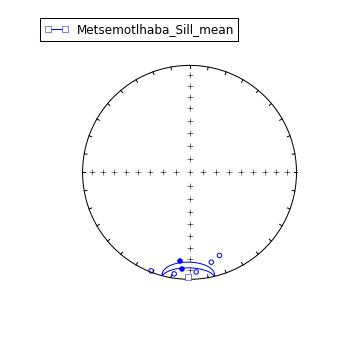

In [24]:
Metsemotlhaba_Sill=[]
Metsemotlhaba_Sill = PW6_AFtc_edit_dir + PW6_tc_edit_dir
Metsemotlhaba_Sill_mean=pmag.fisher_mean(Metsemotlhaba_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Metsemotlhaba_Sill,color='blue')
IPmag.iplotDImean(Metsemotlhaba_Sill_mean['dec'],
                  Metsemotlhaba_Sill_mean['inc'],
                  Metsemotlhaba_Sill_mean["alpha95"],color='b',
                  marker='s',label='Metsemotlhaba_Sill_mean')

In [25]:
Intrusion_mean_directions.loc['Metsemotlhaba_River_Sill']=pd.Series({
        'Intrusion_name':'Metsemotlhaba River Sill', 
        'sites_used':'PW6_ALL','site_lat':Site_Locations['LAT(WGS84)'][5], 
        'site_long':Site_Locations['LONG(WGS84)'][5],
        'n':int(Metsemotlhaba_Sill_mean['n']),
        'dec_tc':round(Metsemotlhaba_Sill_mean['dec'],1),
        'inc_tc':round(Metsemotlhaba_Sill_mean['inc'],1),
        'a_95':round(Metsemotlhaba_Sill_mean['alpha95'],1),
        'k':round(Metsemotlhaba_Sill_mean['k'],1),
        'dip_direction':0,
        'dip':0})
Intrusion_mean_directions.ix['Metsemotlhaba_River_Sill']

Intrusion_name    Metsemotlhaba River Sill
sites_used                         PW6_ALL
site_lat                         -24.54694
site_long                         25.80892
n                                        7
dec_tc                               180.6
inc_tc                                -2.7
a_95                                  14.4
k                                     18.5
date                                   NaN
date_error                             NaN
dip_direction                            0
dip                                      0
Name: Metsemotlhaba_River_Sill, dtype: object

### Mabogoapitse Hill Sill - PW7,PW8

#### Thermal demag (PW7, not PW8)

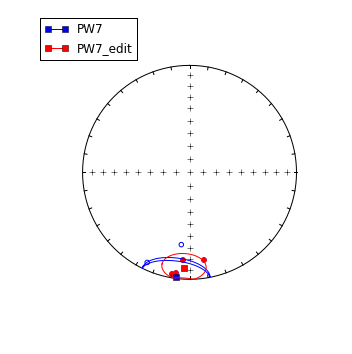

In [26]:
PW7_tc_dir=[]
for n in range(len(PW7_tc)):
    Dec,Inc=PW7_tc['specimen_dec'][n],PW7_tc['specimen_inc'][n],
    PW7_tc_dir.append([Dec,Inc,1.])
PW7_tc_mean=pmag.fisher_mean(PW7_tc_dir)

#Excluding one point on the upper hemisphere and sample 10 - replcd w/AF-10:
PW7_tc_edit = PW7_tc
PW7_tc_edit = PW7_tc_edit.drop(0)
PW7_tc_edit = PW7_tc_edit.drop(5)
PW7_tc_edit.reset_index(inplace=True)

PW7_tc_edit_dir=[]
for n in range(len(PW7_tc_edit)):
    Dec,Inc=PW7_tc_edit['specimen_dec'][n],PW7_tc_edit['specimen_inc'][n],
    PW7_tc_edit_dir.append([Dec,Inc,1.])
PW7_tc_edit_mean=pmag.fisher_mean(PW7_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW7_tc_dir,color='b')
IPmag.iplotDImean(PW7_tc_mean['dec'],PW7_tc_mean['inc'],
                  PW7_tc_mean["alpha95"],color='b',marker='s',label='PW7')
IPmag.iplotDI(PW7_tc_edit_dir,color='r')
IPmag.iplotDImean(PW7_tc_edit_mean['dec'],PW7_tc_edit_mean['inc'],
                  PW7_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW7_edit')

#### AF demag (PW7 and PW8)

##### PW7-AF

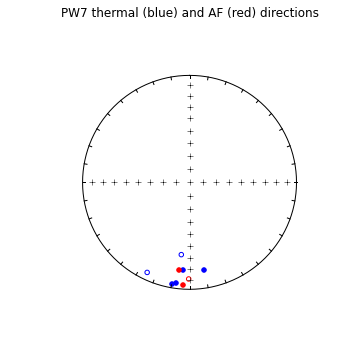

In [27]:
PW7_AFdata=pd.read_csv('../Data/Botswana_AF/PW7/pmag_specimens.txt',
                       sep='\t',header=1)
PW7_AFtc = PW7_AFdata[PW7_AFdata['specimen_tilt_correction'] == 100]
PW7_AFtc.reset_index(drop=True, inplace=True)

PW7_AFtc_dir=[]
for n in range(len(PW7_AFtc)):
    Dec,Inc=PW7_AFtc['specimen_dec'][n],PW7_AFtc['specimen_inc'][n]
    PW7_AFtc_dir.append([Dec,Inc,1.])
PW7_AFtc_mean=pmag.fisher_mean(PW7_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW7_AFtc_edit = PW7_AFtc
PW7_AFtc_edit = PW7_AFtc_edit.drop(3)
PW7_AFtc_edit = PW7_AFtc_edit.drop(4)
PW7_AFtc_edit = PW7_AFtc_edit.drop(5)
PW7_AFtc_edit = PW7_AFtc_edit.drop(6)
PW7_AFtc_edit.reset_index(drop=True, inplace=True)
PW7_AFtc_edit_dir=[]
for n in range(len(PW7_AFtc_edit)):
    Dec,Inc=PW7_AFtc_edit['specimen_dec'][n],PW7_AFtc_edit['specimen_inc'][n]
    PW7_AFtc_edit_dir.append([Dec,Inc,1.])
PW7_AFtc_edit_mean=pmag.fisher_mean(PW7_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW7_tc_dir,color='blue')
IPmag.iplotDI(PW7_AFtc_edit_dir,color='red')
plt.title('PW7 thermal (blue) and AF (red) directions')
plt.show()

All thermal and AF results share a consistent direction. Above has thermal (blue) and AF (red) specimens. We replace the thermal sample PW7-10(thermal) with PW7-10(AF). Thermal analysis don't include samples PW7-11 and 12 - the AF specimens are included.

##### PW8-AF

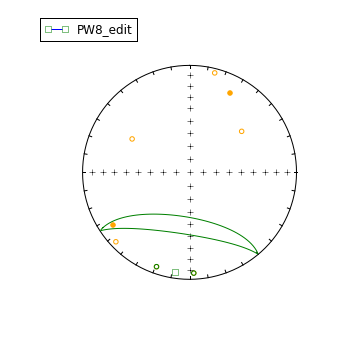

In [28]:
PW8_AFdata=pd.read_csv('../Data/Botswana_AF/PW8/pmag_specimens.txt',
                       sep='\t',header=1)
PW8_AFtc = PW8_AFdata[PW8_AFdata['specimen_tilt_correction'] == 100]
PW8_AFtc.reset_index(drop=True, inplace=True)

PW8_AFtc_dir=[]
for n in range(len(PW8_AFtc)):
    Dec,Inc=PW8_AFtc['specimen_dec'][n],PW8_AFtc['specimen_inc'][n]
    PW8_AFtc_dir.append([Dec,Inc,1.])
PW8_AFtc_mean=pmag.fisher_mean(PW8_AFtc_dir)

#Drop redundant specimens from same sample out of AF group...
#...and two others
PW8_AFtc_edit = PW8_AFtc
PW8_AFtc_edit = PW8_AFtc_edit.drop(2)
PW8_AFtc_edit = PW8_AFtc_edit.drop(3)
PW8_AFtc_edit = PW8_AFtc_edit.drop(4)
PW8_AFtc_edit = PW8_AFtc_edit.drop(5)
PW8_AFtc_edit = PW8_AFtc_edit.drop(0)
PW8_AFtc_edit = PW8_AFtc_edit.drop(1)
PW8_AFtc_edit.reset_index(drop=True, inplace=True)
PW8_AFtc_edit_dir=[]
for n in range(len(PW8_AFtc_edit)):
    Dec,Inc=PW8_AFtc_edit['specimen_dec'][n],PW8_AFtc_edit['specimen_inc'][n]
    PW8_AFtc_edit_dir.append([Dec,Inc,1.])
PW8_AFtc_edit_mean=pmag.fisher_mean(PW8_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW8_AFtc_dir,color='orange')
IPmag.iplotDI(PW8_AFtc_edit_dir,color='green')
IPmag.iplotDImean(PW8_AFtc_edit_mean['dec'],PW8_AFtc_edit_mean['inc'],
                  PW8_AFtc_edit_mean["alpha95"],color='green',marker='s',
                  label='PW8_edit')

Two AF samples from PW8 are added to the Mabogoapitse Hill Sill mean direction.

#### Mabogoapitse Hill Sill Combined Mean (PW7_ALL, PW8_AF)

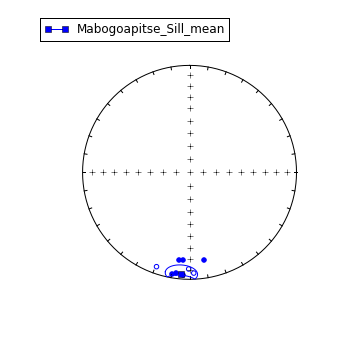

In [29]:
Mabogoapitse_Sill=[]
Mabogoapitse_Sill = PW7_AFtc_edit_dir + PW7_tc_edit_dir + PW8_AFtc_edit_dir
Mabogoapitse_Sill_mean=pmag.fisher_mean(Mabogoapitse_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mabogoapitse_Sill,color='blue')
IPmag.iplotDImean(Mabogoapitse_Sill_mean['dec'],Mabogoapitse_Sill_mean['inc'],
                  Mabogoapitse_Sill_mean["alpha95"],color='b',marker='s',
                  label='Mabogoapitse_Sill_mean')

In [30]:
Intrusion_mean_directions.loc['Mabogoapitse_Hill_Sill'] = pd.Series({
        'Intrusion_name':'Mabogoapitse_Hill_Sill', 
        'sites_used':'PW7_ALL and PW8_AF',
        'site_lat':Site_Locations['LAT(WGS84)'][7], 
        'site_long':Site_Locations['LONG(WGS84)'][7],
        'n':int(Mabogoapitse_Sill_mean['n']),
        'dec_tc':round(Mabogoapitse_Sill_mean['dec'],1),
        'inc_tc':round(Mabogoapitse_Sill_mean['inc'],1),
        'a_95':round(Mabogoapitse_Sill_mean['alpha95'],1),
        'k':round(Mabogoapitse_Sill_mean['k'],1),
        'dip_direction':0,
        'dip':0}) 
Intrusion_mean_directions.ix['Mabogoapitse_Hill_Sill']

Intrusion_name    Mabogoapitse_Hill_Sill
sites_used            PW7_ALL and PW8_AF
site_lat                       -24.47402
site_long                       25.59705
n                                      9
dec_tc                             184.6
inc_tc                               5.1
a_95                                 9.1
k                                   33.2
date                                 NaN
date_error                           NaN
dip_direction                          0
dip                                    0
Name: Mabogoapitse_Hill_Sill, dtype: object

### Semarule Hill Sill - PW9

#### Thermal demag

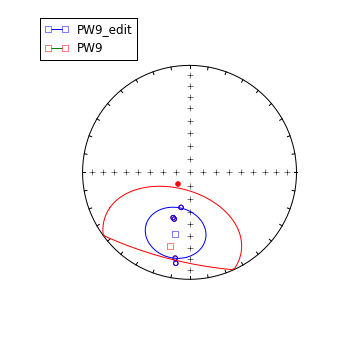

In [31]:
PW9_tc_dir=[]
for n in range(len(PW9_tc)):
    Dec,Inc=PW9_tc['specimen_dec'][n],PW9_tc['specimen_inc'][n]
    PW9_tc_dir.append([Dec,Inc,1.])
PW9_tc_mean=pmag.fisher_mean(PW9_tc_dir)

#Excluding one outlier point:
PW9_tc_edit = PW9_tc
PW9_tc_edit = PW9_tc_edit.drop(5)
PW9_tc_edit.reset_index(inplace=True)

PW9_tc_edit_dir=[]
for n in range(len(PW9_tc_edit)):
    Dec,Inc=PW9_tc_edit['specimen_dec'][n],PW9_tc_edit['specimen_inc'][n]
    PW9_tc_edit_dir.append([Dec,Inc,1.])
PW9_tc_edit_mean=pmag.fisher_mean(PW9_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW9_tc_dir,color='r')
IPmag.iplotDI(PW9_tc_edit_dir,color='b')
IPmag.iplotDImean(PW9_tc_edit_mean['dec'],PW9_tc_edit_mean['inc'],
                  PW9_tc_edit_mean["alpha95"],color='b',marker='s',
                  label='PW9_edit')
IPmag.iplotDImean(PW9_tc_mean['dec'],PW9_tc_mean['inc'],
                  PW9_tc_mean["alpha95"],color='r',marker='s',
                  label='PW9')

#### AF demag

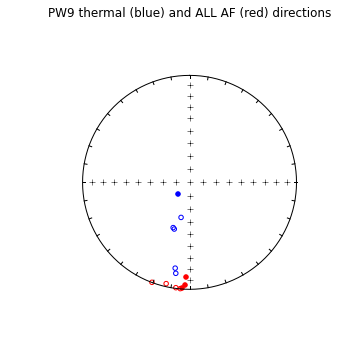

In [32]:
PW9_AFdata=pd.read_csv('../Data/Botswana_AF/PW9/pmag_specimens.txt',
                       sep='\t',header=1)
PW9_AFtc = PW9_AFdata[PW9_AFdata['specimen_tilt_correction'] == 100]
PW9_AFtc.reset_index(drop=True, inplace=True)

PW9_AFtc_dir=[]
for n in range(len(PW9_AFtc)):
    Dec,Inc=PW9_AFtc['specimen_dec'][n],PW9_AFtc['specimen_inc'][n],
    PW9_AFtc_dir.append([Dec,Inc,1.])
PW9_AFtc_mean=pmag.fisher_mean(PW9_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW9_AFtc_edit = PW9_AFtc
PW9_AFtc_edit = PW9_AFtc_edit.drop(5)
PW9_AFtc_edit = PW9_AFtc_edit.drop(6)
PW9_AFtc_edit.reset_index(drop=True, inplace=True)
PW9_AFtc_edit_dir=[]
for n in range(len(PW9_AFtc_edit)):
    Dec,Inc=PW9_AFtc_edit['specimen_dec'][n],PW9_AFtc_edit['specimen_inc'][n],
    PW9_AFtc_edit_dir.append([Dec,Inc,1.])
PW9_AFtc_edit_mean=pmag.fisher_mean(PW9_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW9_tc_dir,color='blue')
IPmag.iplotDI(PW9_AFtc_dir,color='red')
plt.title('PW9 thermal (blue) and ALL AF (red) directions')
plt.show()

#### Combined Mean (PW9_AF)

AF results are far more consistent than the thermal analyses. Two thermal samples, PW9-7 and PW9-8, agree roughly with their AF conterparts. However, overall the AF demagnetization appears to have been more effective in cleaning the samples and these data are favored for the mean that is added to the compilation.

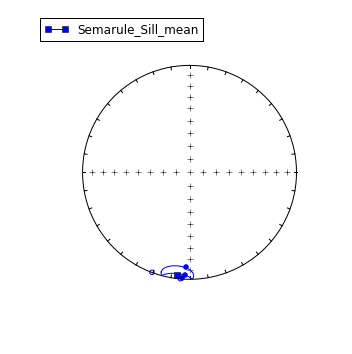

In [33]:
Semarule_Sill=[]
Semarule_Sill = PW9_AFtc_edit_dir
Semarule_Sill_mean=pmag.fisher_mean(Semarule_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Semarule_Sill,color='blue')
IPmag.iplotDImean(Semarule_Sill_mean['dec'],Semarule_Sill_mean['inc'],
                  Semarule_Sill_mean["alpha95"],color='b',marker='s',
                  label='Semarule_Sill_mean')

In [34]:
Intrusion_mean_directions.loc['Semarule_Hill_Sill']=pd.Series({
        'Intrusion_name':'Semarule_Hill_Sill','sites_used':'PW9_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][8], 
        'site_long':Site_Locations['LONG(WGS84)'][8],
        'n':int(Semarule_Sill_mean['n']),
        'dec_tc':round(Semarule_Sill_mean['dec'],1),
        'inc_tc':round(Semarule_Sill_mean['inc'],1),
        'a_95':round(Semarule_Sill_mean['alpha95'],1),
        'k':round(Semarule_Sill_mean['k'],1),
        'dip_direction':0,
        'dip':0})
Intrusion_mean_directions.ix['Semarule_Hill_Sill']

Intrusion_name    Semarule_Hill_Sill
sites_used                   PW9_ALL
site_lat                   -24.45268
site_long                   25.57415
n                                  5
dec_tc                         186.8
inc_tc                           3.8
a_95                             9.1
k                               72.2
date                             NaN
date_error                       NaN
dip_direction                      0
dip                                0
Name: Semarule_Hill_Sill, dtype: object

### Rapitsane Sill - PW10

Very good agreement and consistency in all samples.

#### Thermal demag

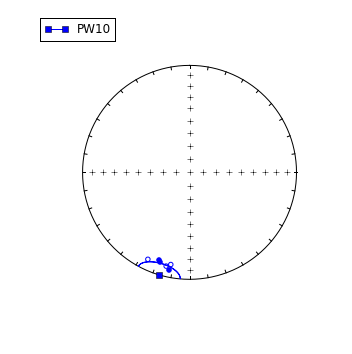

In [35]:
PW10_tc_dir=[]
for n in range(len(PW9_tc)):
    Dec,Inc=PW10_tc['specimen_dec'][n],PW10_tc['specimen_inc'][n]
    PW10_tc_dir.append([Dec,Inc,1.])
PW10_tc_mean=pmag.fisher_mean(PW10_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW10_tc_dir,color='b')
IPmag.iplotDImean(PW10_tc_mean['dec'],PW10_tc_mean['inc'],
                  PW10_tc_mean["alpha95"],color='b',marker='s',
                  label='PW10')


#### AF demag

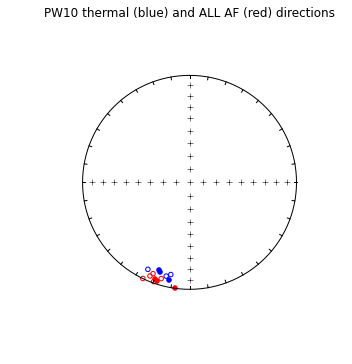

In [36]:
PW10_AFdata=pd.read_csv('../Data/Botswana_AF/PW10/pmag_specimens.txt',
                        sep='\t',header=1)
PW10_AFtc = PW10_AFdata[PW10_AFdata['specimen_tilt_correction'] == 100]
PW10_AFtc.reset_index(drop=True, inplace=True)

PW10_AFtc_dir=[]
for n in range(len(PW10_AFtc)):
    Dec,Inc=PW10_AFtc['specimen_dec'][n],PW10_AFtc['specimen_inc'][n]
    PW10_AFtc_dir.append([Dec,Inc,1.])
PW10_AFtc_mean=pmag.fisher_mean(PW10_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW10_AFtc_edit = PW10_AFtc
PW10_AFtc_edit = PW10_AFtc_edit.drop(0)
PW10_AFtc_edit = PW10_AFtc_edit.drop(1)
PW10_AFtc_edit = PW10_AFtc_edit.drop(2)
PW10_AFtc_edit = PW10_AFtc_edit.drop(3)
PW10_AFtc_edit = PW10_AFtc_edit.drop(4)
PW10_AFtc_edit = PW10_AFtc_edit.drop(5)
PW10_AFtc_edit.reset_index(drop=True, inplace=True)
PW10_AFtc_edit_dir=[]
for n in range(len(PW10_AFtc_edit)):
    Dec,Inc=PW10_AFtc_edit['specimen_dec'][n],PW10_AFtc_edit['specimen_inc'][n]
    PW10_AFtc_edit_dir.append([Dec,Inc,1.])
PW10_AFtc_edit_mean=pmag.fisher_mean(PW10_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW10_tc_dir,color='blue')
IPmag.iplotDI(PW10_AFtc_dir,color='red')
plt.title('PW10 thermal (blue) and ALL AF (red) directions')
plt.show()

There is good agreement between all of the thermal and AF results. Two AF samples were not thermally demagnetized therefore their results are added to the mean.

#### Rapitsane Sill Mean (PW10_ALL)

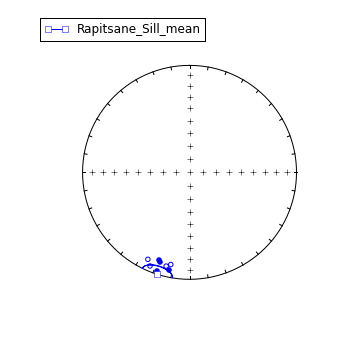

In [37]:
Rapitsane_Sill=[]
Rapitsane_Sill = PW10_tc_dir + PW10_AFtc_edit_dir
Rapitsane_Sill_mean=pmag.fisher_mean(Rapitsane_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Rapitsane_Sill,color='blue')
IPmag.iplotDImean(Rapitsane_Sill_mean['dec'],Rapitsane_Sill_mean['inc'],
                  Rapitsane_Sill_mean["alpha95"],color='b',marker='s',
                  label='Rapitsane_Sill_mean')

In [38]:
Intrusion_mean_directions.loc['Rapitsane_Sill'] = pd.Series({'Intrusion_name':
                            'Rapitsane_Sill','sites_used':'PW10_ALL',
                            'site_lat':Site_Locations['LAT(WGS84)'][9], 
                            'site_long':Site_Locations['LONG(WGS84)'][9],
                            'n':int(Rapitsane_Sill_mean['n']),
                            'dec_tc':round(Rapitsane_Sill_mean['dec'],1),
                            'inc_tc':round(Rapitsane_Sill_mean['inc'],1),
                            'a_95':round(Rapitsane_Sill_mean['alpha95'],1),
                            'k':round(Rapitsane_Sill_mean['k'],1),
                            'dip_direction':330.0,
                            'dip':7}) 
Intrusion_mean_directions.ix['Rapitsane_Sill']

Intrusion_name    Rapitsane_Sill
sites_used              PW10_ALL
site_lat               -24.41968
site_long               25.58463
n                              8
dec_tc                     197.7
inc_tc                      -0.2
a_95                         8.5
k                           43.3
date                         NaN
date_error                   NaN
dip_direction                330
dip                            7
Name: Rapitsane_Sill, dtype: object

### Suping Sill - PW11,PW12,JP15,JP16

#### Thermal demag (PW11, not PW12)

These results given an overall consistent direction.

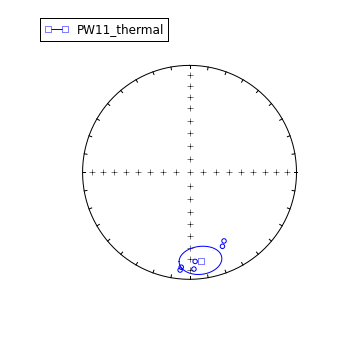

In [39]:
PW11_tc_dir=[]
for n in range(len(PW11_tc)):
    Dec,Inc=PW11_tc['specimen_dec'][n],PW11_tc['specimen_inc'][n]
    PW11_tc_dir.append([Dec,Inc,1.])
PW11_tc_mean=pmag.fisher_mean(PW11_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW11_tc_dir,color='b')
IPmag.iplotDImean(PW11_tc_mean['dec'],PW11_tc_mean['inc'],
                  PW11_tc_mean["alpha95"],color='b',marker='s',
                  label='PW11_thermal')


#### AF demag (PW11 and PW12)

##### PW11-AF

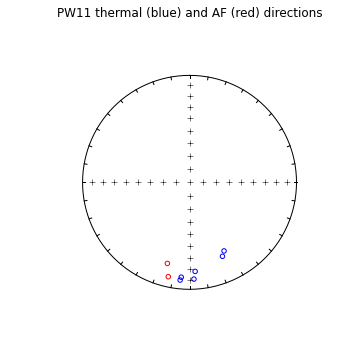

In [40]:
PW11_AFdata=pd.read_csv('../Data/Botswana_AF/PW11/pmag_specimens.txt',
                        sep='\t',header=1)
PW11_AFtc = PW11_AFdata[PW11_AFdata['specimen_tilt_correction'] == 100]
PW11_AFtc.reset_index(drop=True, inplace=True)

PW11_AFtc_dir=[]
for n in range(len(PW11_AFtc)):
    Dec,Inc=PW11_AFtc['specimen_dec'][n],PW11_AFtc['specimen_inc'][n]
    PW11_AFtc_dir.append([Dec,Inc,1.])
PW11_AFtc_mean=pmag.fisher_mean(PW11_AFtc_dir)

#Drop redundant specimens from same samples in AF group (only 7&8 were new)
PW11_AFtc_edit = PW11_AFtc
PW11_AFtc_edit = PW11_AFtc_edit.drop(0)
PW11_AFtc_edit = PW11_AFtc_edit.drop(1)
PW11_AFtc_edit = PW11_AFtc_edit.drop(2)
PW11_AFtc_edit = PW11_AFtc_edit.drop(3)
PW11_AFtc_edit = PW11_AFtc_edit.drop(4)
PW11_AFtc_edit = PW11_AFtc_edit.drop(5)
PW11_AFtc_edit.reset_index(drop=True, inplace=True)
PW11_AFtc_edit_dir=[]
for n in range(len(PW11_AFtc_edit)):
    Dec,Inc=PW11_AFtc_edit['specimen_dec'][n],PW11_AFtc_edit['specimen_inc'][n]
    PW11_AFtc_edit_dir.append([Dec,Inc,1.])
PW11_AFtc_edit_mean=pmag.fisher_mean(PW11_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW11_tc_dir,color='blue')
IPmag.iplotDI(PW11_AFtc_edit_dir,color='red')
plt.title('PW11 thermal (blue) and AF (red) directions')
plt.show()

Red circles are the two additional AF samples from PW11.

##### PW12-AF

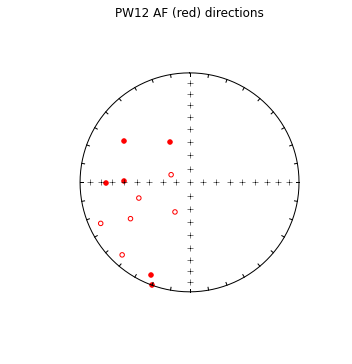

In [41]:
PW12_AFdata=pd.read_csv('../Data/Botswana_AF/PW12/pmag_specimens.txt',
                        sep='\t',header=1)
PW12_AFtc = PW12_AFdata[PW12_AFdata['specimen_tilt_correction'] == 100]
PW12_AFtc.reset_index(drop=True, inplace=True)

PW12_AFtc_dir=[]
for n in range(len(PW12_AFtc)):
    Dec,Inc=PW12_AFtc['specimen_dec'][n],PW12_AFtc['specimen_inc'][n]
    PW12_AFtc_dir.append([Dec,Inc,1.])
PW12_AFtc_mean=pmag.fisher_mean(PW12_AFtc_dir)

PW12_AFtc_edit = PW12_AFtc
PW12_AFtc_edit = PW12_AFtc_edit.ix[3]
PW12_AFtc_edit_dir=[]
Dec,Inc=PW12_AFtc_edit['specimen_dec'],PW12_AFtc_edit['specimen_inc']
PW12_AFtc_edit_dir.append([Dec,Inc,1.])
PW12_AFtc_edit_mean=pmag.fisher_mean(PW12_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW12_AFtc_dir,color='red')
plt.title('PW12 AF (red) directions')
plt.show()

The PW12 AF data are scattered and are not used for the combined mean.

We also need to import the Pancake (2001) data for JP(15,16) so that it can be combined with the data from PW11/12; These sites sampled the same intrusion. We only import data from JP15 because JP16 yielded fairly scattered results from an outcrop that is slightly difficult to correlate. 

In [42]:
JP15_dir = pickle.load(open('../Data/Pickle/JP15','rb'))

#### Combined Mean (PW11_ALL, PW12_AF, JP(15,16,19))

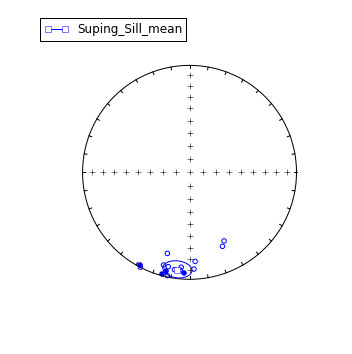

In [43]:
Suping_Sill=[]
Suping_Sill = PW11_AFtc_edit_dir + PW11_tc_dir + JP15_dir
Suping_Sill_mean=pmag.fisher_mean(Suping_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Suping_Sill,color='blue')
IPmag.iplotDImean(Suping_Sill_mean['dec'],Suping_Sill_mean['inc'],
                  Suping_Sill_mean["alpha95"],color='b',marker='s',
                  label='Suping_Sill_mean')

In [44]:
Intrusion_mean_directions.loc['Suping_Sill'] = pd.Series({'Intrusion_name':
                            'Suping_Sill', 
                            'sites_used':'PW11_ALL and JP15',
                            'site_lat':Site_Locations['LAT(WGS84)'][10], 
                            'site_long':Site_Locations['LONG(WGS84)'][10],
                            'n':int(Suping_Sill_mean['n']),
                            'dec_tc':round(Suping_Sill_mean['dec'],1),
                            'inc_tc':round(Suping_Sill_mean['inc'],1),
                            'a_95':round(Suping_Sill_mean['alpha95'],1),
                            'k':round(Suping_Sill_mean['k'],1),
                            'dip_direction':281.2,
                            'dip':10}) 
Intrusion_mean_directions.ix['Suping_Sill']

Intrusion_name          Suping_Sill
sites_used        PW11_ALL and JP15
site_lat                  -24.32765
site_long                  25.53224
n                                16
dec_tc                        187.2
inc_tc                         -9.2
a_95                            8.4
k                              20.2
date                            NaN
date_error                      NaN
dip_direction                 281.2
dip                              10
Name: Suping_Sill, dtype: object

### Gajong Donut Sill - PW13

#### Thermal demag

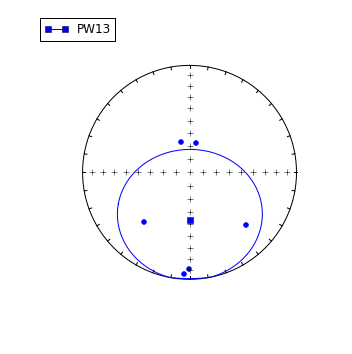

In [45]:
PW13_tc_dir=[]
for n in range(len(PW13_tc)):
    Dec,Inc=PW13_tc['specimen_dec'][n],PW13_tc['specimen_inc'][n]
    PW13_tc_dir.append([Dec,Inc,1.])
PW13_tc_mean=pmag.fisher_mean(PW13_tc_dir)

PW13_tc_edit = PW13_tc
PW13_tc_edit = PW13_tc_edit.drop(0)
PW13_tc_edit = PW13_tc_edit.drop(1)
PW13_tc_edit = PW13_tc_edit.drop(2)
PW13_tc_edit.reset_index(inplace=True)

PW13_tc_edit_dir=[]
for n in range(len(PW13_tc_edit)):
    Dec,Inc=PW13_tc_edit['specimen_dec'][n],PW13_tc_edit['specimen_inc'][n]
    PW13_tc_edit_dir.append([Dec,Inc,1.])
PW13_tc_edit_mean=pmag.fisher_mean(PW13_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW13_tc_dir,color='b')
IPmag.iplotDImean(PW13_tc_mean['dec'],PW13_tc_mean['inc'],
                  PW13_tc_mean["alpha95"],color='b',marker='s',label='PW13')

#### PW13 AF demag and combined thermal/AF samples

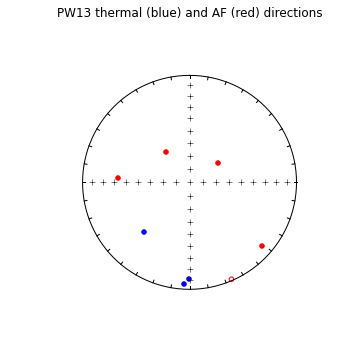

In [46]:
PW13_AFdata=pd.read_csv('../Data/Botswana_AF/PW13/pmag_specimens.txt',
                        sep='\t',header=1)
PW13_AFtc = PW13_AFdata[PW13_AFdata['specimen_tilt_correction'] == 100]
PW13_AFtc.reset_index(drop=True, inplace=True)

PW13_AFtc_dir=[]
for n in range(len(PW13_AFtc)):
    Dec,Inc=PW13_AFtc['specimen_dec'][n],PW13_AFtc['specimen_inc'][n]
    PW13_AFtc_dir.append([Dec,Inc,1.])
PW13_AFtc_mean=pmag.fisher_mean(PW13_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW13_AFtc_edit = PW13_AFtc
PW13_AFtc_edit = PW13_AFtc_edit.drop(4)
PW13_AFtc_edit = PW13_AFtc_edit.drop(5)
PW13_AFtc_edit = PW13_AFtc_edit.drop(6)
PW13_AFtc_edit.reset_index(drop=True, inplace=True)
PW13_AFtc_edit_dir=[]
for n in range(len(PW13_AFtc_edit)):
    Dec,Inc=PW13_AFtc_edit['specimen_dec'][n],PW13_AFtc_edit['specimen_inc'][n]
    PW13_AFtc_edit_dir.append([Dec,Inc,1.])
PW13_AFtc_edit_mean=pmag.fisher_mean(PW13_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW13_tc_edit_dir,color='blue')
IPmag.iplotDI(PW13_AFtc_edit_dir,color='red')
plt.title('PW13 thermal (blue) and AF (red) directions')
plt.show()

This site does not reveal a consistent grouping of directions and is not used in the compilation.

### Mogatelwane 1 Sill - PW14

Samples from PW14 were only AF demagnetized. Results appear to be consistent, but with a direction far different from that which is typical of the Umkondo LIP.

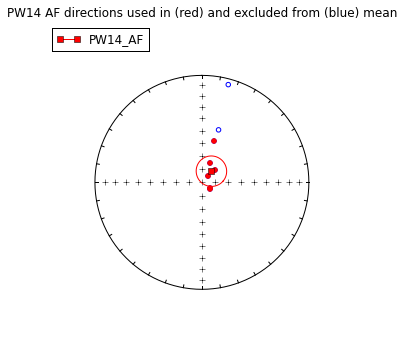

In [47]:
PW14_AFdata=pd.read_csv('../Data/Botswana_AF/PW14/pmag_specimens.txt',
                        sep='\t',header=1)
PW14_AFtc = PW14_AFdata[PW14_AFdata['specimen_tilt_correction'] == 100]
PW14_AFtc.reset_index(drop=True, inplace=True)

PW14_AFtc_dir=[]
for n in range(len(PW14_AFtc)):
    Dec,Inc=PW14_AFtc['specimen_dec'][n],PW14_AFtc['specimen_inc'][n]
    PW14_AFtc_dir.append([Dec,Inc,1.])
PW14_AFtc_mean=pmag.fisher_mean(PW14_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW14_AFtc_edit = PW14_AFtc
PW14_AFtc_edit = PW14_AFtc_edit.drop(0)
PW14_AFtc_edit = PW14_AFtc_edit.drop(1)
PW14_AFtc_edit.reset_index(drop=True, inplace=True)
PW14_AFtc_edit_dir=[]
for n in range(len(PW14_AFtc_edit)):
    Dec,Inc=PW14_AFtc_edit['specimen_dec'][n],PW14_AFtc_edit['specimen_inc'][n]
    PW14_AFtc_edit_dir.append([Dec,Inc,1.])
PW14_AFtc_edit_mean=pmag.fisher_mean(PW14_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW14_AFtc_dir,color='blue')
IPmag.iplotDI(PW14_AFtc_edit_dir,color='red')
IPmag.iplotDImean(PW14_AFtc_edit_mean['dec'],PW14_AFtc_edit_mean['inc'],
                  PW14_AFtc_edit_mean["alpha95"],color='r',marker='s',label='PW14_AF')
plt.title('PW14 AF directions used in (red) and excluded from (blue) mean')
plt.show()

In [48]:
#Load unknown/younger/older intrusion table, so that PW18_thermal can be added
unknown_intrusions = pickle.load(open('../Data/Pickle/unknown_intrusions','rb'))

In [49]:
#add to unknown intrusion table
unknown_intrusions.loc['Mogatelwane_1_Sill'] = pd.Series({'site_ID':'PW14_AF', 
                            'site_lat':Site_Locations['LAT(WGS84)'][13],
                            'site_long':Site_Locations['LONG(WGS84)'][13],
                            'n':PW14_AFtc_edit_mean['n'],
                            'dec_tc':round(PW14_AFtc_edit_mean['dec'],1),
                            'inc_tc':round(PW14_AFtc_edit_mean['inc'],1),
                            'a_95':round(PW14_AFtc_edit_mean['alpha95'],1),
                            'k':round(PW14_AFtc_edit_mean['k'],1)})

### Mogatelwane 2 Sill - PW15,PW16,PW17

PW16 and PW17 are from two different rotated blocks that were sampled for paleointensity but that cannot be used for paleodirectional analysis and are not included in this analysis.

#### Thermal demag (PW15 only)

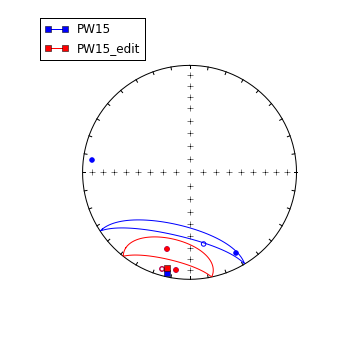

In [50]:
PW15_tc_dir=[]
for n in range(len(PW15_tc)):
    Dec,Inc=PW15_tc['specimen_dec'][n],PW15_tc['specimen_inc'][n]
    PW15_tc_dir.append([Dec,Inc,1.])
PW15_tc_mean=pmag.fisher_mean(PW15_tc_dir)

PW15_tc_edit = PW15_tc
PW15_tc_edit = PW15_tc_edit.drop(0)
PW15_tc_edit = PW15_tc_edit.drop(2)
PW15_tc_edit = PW15_tc_edit.drop(5)
PW15_tc_edit.reset_index(inplace=True)

PW15_tc_edit_dir=[]
for n in range(len(PW15_tc_edit)):
    Dec,Inc=PW15_tc_edit['specimen_dec'][n],PW15_tc_edit['specimen_inc'][n]
    PW15_tc_edit_dir.append([Dec,Inc,1.])
PW15_tc_edit_mean=pmag.fisher_mean(PW15_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW15_tc_dir,color='b')
IPmag.iplotDImean(PW15_tc_mean['dec'],PW15_tc_mean['inc'],
                  PW15_tc_mean["alpha95"],color='b',marker='s',
                  label='PW15')
IPmag.iplotDI(PW15_tc_edit_dir,color='r')
IPmag.iplotDImean(PW15_tc_edit_mean['dec'],PW15_tc_edit_mean['inc'],
                  PW15_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW15_edit')


#### AF demag (PW15)

##### PW15_AF

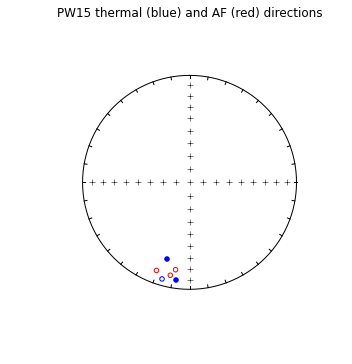

In [51]:
PW15_AFdata=pd.read_csv('../Data/Botswana_AF/PW15/pmag_specimens.txt',
                        sep='\t',header=1)
PW15_AFtc = PW15_AFdata[PW15_AFdata['specimen_tilt_correction'] == 100]
PW15_AFtc.reset_index(drop=True, inplace=True)

PW15_AFtc_dir=[]
for n in range(len(PW15_AFtc)):
    Dec,Inc=PW15_AFtc['specimen_dec'][n],PW15_AFtc['specimen_inc'][n]
    PW15_AFtc_dir.append([Dec,Inc,1.])
PW15_AFtc_mean=pmag.fisher_mean(PW15_AFtc_dir)

#Drop redundant specimens from same sample out of AF group
PW15_AFtc_edit = PW15_AFtc
PW15_AFtc_edit = PW15_AFtc_edit.drop(1)
PW15_AFtc_edit = PW15_AFtc_edit.drop(3)
PW15_AFtc_edit = PW15_AFtc_edit.drop(4)
PW15_AFtc_edit = PW15_AFtc_edit.drop(6)
PW15_AFtc_edit = PW15_AFtc_edit.drop(7)
PW15_AFtc_edit.reset_index(drop=True, inplace=True)
PW15_AFtc_edit_dir=[]
for n in range(len(PW15_AFtc_edit)):
    Dec,Inc=PW15_AFtc_edit['specimen_dec'][n],PW15_AFtc_edit['specimen_inc'][n]
    PW15_AFtc_edit_dir.append([Dec,Inc,1.])
PW15_AFtc_edit_mean=pmag.fisher_mean(PW15_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW15_tc_edit_dir,color='blue')
IPmag.iplotDI(PW15_AFtc_edit_dir,color='red')
plt.title('PW15 thermal (blue) and AF (red) directions')
plt.show()

There is rough agreement between six different samples, 3 AF and 3 thermal results. Results from other samples are scattered.

#### Mogatelwane 2 Sill Combined mean (PW15_ALL)

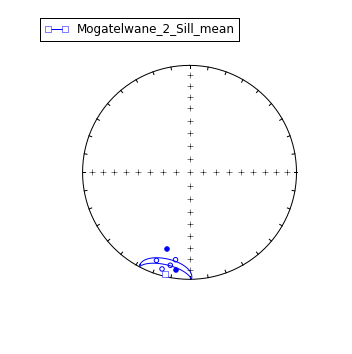

In [52]:
Mogatelwane_2_Sill=[]
Mogatelwane_2_Sill = PW15_AFtc_edit_dir + PW15_tc_edit_dir 
Mogatelwane_2_Sill_mean=pmag.fisher_mean(Mogatelwane_2_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mogatelwane_2_Sill,color='blue')
IPmag.iplotDImean(Mogatelwane_2_Sill_mean['dec'],
                  Mogatelwane_2_Sill_mean['inc'],
                  Mogatelwane_2_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mogatelwane_2_Sill_mean')

The scatter of this mean direction is large but is close to the Umkondo direction. This will be included in the compilation but may be excised later in the analysis due to the large a95.

In [53]:
Intrusion_mean_directions.loc['Mogatelwane 2 Sill'] = pd.Series({'Intrusion_name':
                            'Mogatelwane 2 Sill', 
                            'sites_used':'PW15_ALL',
                            'site_lat':Site_Locations['LAT(WGS84)'][14], 
                            'site_long':Site_Locations['LONG(WGS84)'][14],
                            'n':int(Mogatelwane_2_Sill_mean['n']),
                            'dec_tc':round(Mogatelwane_2_Sill_mean['dec'],1),
                            'inc_tc':round(Mogatelwane_2_Sill_mean['inc'],1),
                            'a_95':round(Mogatelwane_2_Sill_mean['alpha95'],1),
                            'k':round(Mogatelwane_2_Sill_mean['k'],1),
                            'dip_direction':260.3,
                            'dip':4}) 
Intrusion_mean_directions.ix['Mogatelwane 2 Sill']

Intrusion_name    Mogatelwane 2 Sill
sites_used                  PW15_ALL
site_lat                   -24.18042
site_long                   25.69191
n                                  6
dec_tc                         193.5
inc_tc                          -2.8
a_95                            14.7
k                               21.6
date                             NaN
date_error                       NaN
dip_direction                  260.3
dip                                4
Name: Mogatelwane 2 Sill, dtype: object

### Molepolole Prison Quarry Sill - PW18,PW19

Some of these samples appear to carry a Karoo LIP direction that is opposite polarity to the Karoo dike reported in Gose et al. (2006) and significantly different from the Umkondo LIP magnetization direction.

#### Thermal demag

##### PW18_thermal

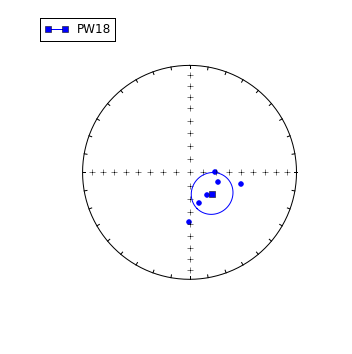

In [54]:
PW18_tc_dir=[]
for n in range(len(PW18_tc)):
    Dec,Inc=PW18_tc['specimen_dec'][n],PW18_tc['specimen_inc'][n]
    PW18_tc_dir.append([Dec,Inc,1.])
PW18_tc_mean=pmag.fisher_mean(PW18_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW18_tc_dir,color='b')
IPmag.iplotDImean(PW18_tc_mean['dec'],PW18_tc_mean['inc'],
                  PW18_tc_mean["alpha95"],color='b',marker='s',
                  label='PW18')


Probably a Karoo direction. Due to complications that can be seen below, this direction could be an overprint on an Umkondo-aged sill.

##### PW19_Thermal

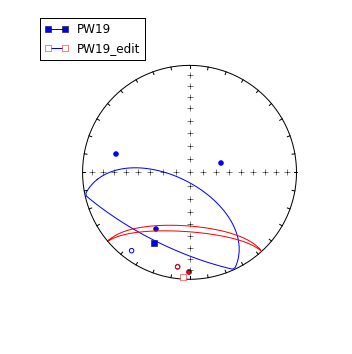

In [55]:
PW19_tc_dir=[]
for n in range(len(PW19_tc)):
    Dec,Inc=PW19_tc['specimen_dec'][n],PW19_tc['specimen_inc'][n],
    PW19_tc_dir.append([Dec,Inc,1.])
PW19_tc_mean=pmag.fisher_mean(PW19_tc_dir)

PW19_tc_edit = PW19_tc
PW19_tc_edit = PW19_tc_edit.drop(0)
PW19_tc_edit = PW19_tc_edit.drop(2)
PW19_tc_edit = PW19_tc_edit.drop(4)
PW19_tc_edit = PW19_tc_edit.drop(5)
PW19_tc_edit.reset_index(inplace=True)

PW19_tc_edit_dir=[]
for n in range(len(PW19_tc_edit)):
    Dec,Inc=PW19_tc_edit['specimen_dec'][n],PW19_tc_edit['specimen_inc'][n]
    PW19_tc_edit_dir.append([Dec,Inc,1.])
PW19_tc_edit_mean=pmag.fisher_mean(PW19_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW19_tc_dir,color='b')
IPmag.iplotDImean(PW19_tc_mean['dec'],PW19_tc_mean['inc'],
                  PW19_tc_mean["alpha95"],color='b',marker='s',
                  label='PW19')
IPmag.iplotDI(PW19_tc_edit_dir,color='r')
IPmag.iplotDImean(PW19_tc_edit_mean['dec'],PW19_tc_edit_mean['inc'],
                  PW19_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW19_edit')


#### AF demag (PW18_AF and PW19_AF)

##### PW18_AF

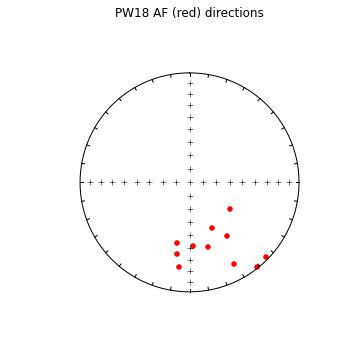

In [56]:
PW18_AFdata=pd.read_csv('../Data/Botswana_AF/PW18/pmag_specimens.txt',
                        sep='\t',header=1)
PW18_AFtc = PW18_AFdata[PW18_AFdata['specimen_tilt_correction'] == 100]
PW18_AFtc.reset_index(drop=True, inplace=True)

PW18_AFtc_dir=[]
for n in range(len(PW18_AFtc)):
    Dec,Inc=PW18_AFtc['specimen_dec'][n],PW18_AFtc['specimen_inc'][n]
    PW18_AFtc_dir.append([Dec,Inc,1.])
PW18_AFtc_mean=pmag.fisher_mean(PW18_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW18_AFtc_edit = PW18_AFtc
PW18_AFtc_edit = PW18_AFtc_edit.drop(4)
PW18_AFtc_edit = PW18_AFtc_edit.drop(5)
PW18_AFtc_edit = PW18_AFtc_edit.drop(12)
PW18_AFtc_edit.reset_index(drop=True, inplace=True)
PW18_AFtc_edit_dir=[]
for n in range(len(PW18_AFtc_edit)):
    Dec,Inc=PW18_AFtc_edit['specimen_dec'][n],PW18_AFtc_edit['specimen_inc'][n]
    PW18_AFtc_edit_dir.append([Dec,Inc,1.])
PW18_AFtc_edit_mean=pmag.fisher_mean(PW18_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW18_AFtc_edit_dir,color='red')
plt.title('PW18 AF (red) directions')
plt.show()

##### PW19_AF

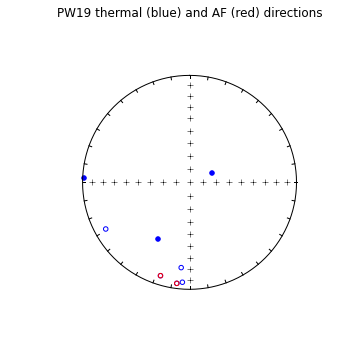

In [57]:
PW19_AFdata=pd.read_csv('../Data/Botswana_AF/PW19/pmag_specimens.txt',
                        sep='\t',header=1)
PW19_AFtc = PW19_AFdata[PW19_AFdata['specimen_tilt_correction'] == 100]
PW19_AFtc.reset_index(drop=True, inplace=True)

PW19_AFtc_dir=[]
for n in range(len(PW19_AFtc)):
    Dec,Inc=PW19_AFtc['specimen_dec'][n],PW19_AFtc['specimen_inc'][n]
    PW19_AFtc_dir.append([Dec,Inc,1.])
PW19_AFtc_mean=pmag.fisher_mean(PW19_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
#Dropped even more samples because directions were scattered,...
#...only 2 AF directions being combined with thermal data.
PW19_AFtc_edit = PW19_AFtc
PW19_AFtc_edit = PW19_AFtc_edit.drop(3)
PW19_AFtc_edit = PW19_AFtc_edit.drop(5)
#PW19_AFtc_edit = PW19_AFtc_edit.drop(7)
PW19_AFtc_edit = PW19_AFtc_edit.drop(0)
PW19_AFtc_edit = PW19_AFtc_edit.drop(1)
PW19_AFtc_edit = PW19_AFtc_edit.drop(4)
PW19_AFtc_edit = PW19_AFtc_edit.drop(6)
PW19_AFtc_edit.reset_index(drop=True, inplace=True)
PW19_AFtc_edit_dir=[]
for n in range(len(PW19_AFtc_edit)):
    Dec,Inc=PW19_AFtc_edit['specimen_dec'][n],PW19_AFtc_edit['specimen_inc'][n]
    PW19_AFtc_edit_dir.append([Dec,Inc,1.])
PW19_AFtc_edit_mean=pmag.fisher_mean(PW19_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW19_AFtc_dir,color='blue')
IPmag.iplotDI(PW19_AFtc_edit_dir,color='red')
plt.title('PW19 thermal (blue) and AF (red) directions')
plt.show()

#### Combined Molepolole prison quarry sill

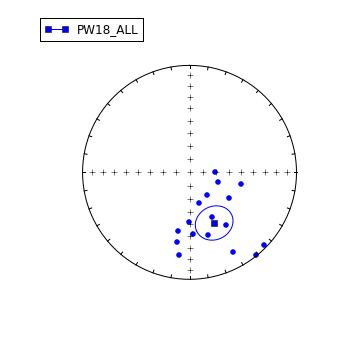

In [58]:
PW18_ALL = PW18_tc_dir + PW18_AFtc_edit_dir
PW18_ALL_mean=pmag.fisher_mean(PW18_ALL)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW18_ALL,color='blue')
IPmag.iplotDImean(PW18_ALL_mean['dec'],PW18_ALL_mean['inc'],
                  PW18_ALL_mean["alpha95"],color='b',marker='s',
                  label='PW18_ALL')

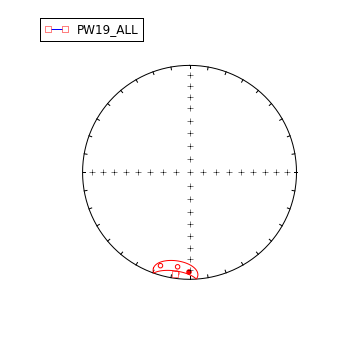

In [59]:
PW19_ALL = PW19_tc_edit_dir + PW19_AFtc_edit_dir
PW19_ALL_mean=pmag.fisher_mean(PW19_ALL)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW19_ALL,color='red')
IPmag.iplotDImean(PW19_ALL_mean['dec'],PW19_ALL_mean['inc'],
                  PW19_ALL_mean["alpha95"],color='r',marker='s',
                  label='PW19_ALL')

If we consider the PW18_AF samples directions as Umkondo in origin, then we would dismiss PW18_thermal directions and add PW18_AF to PW19_ALL. This creates a wide spread of directions with a mediocre mean.

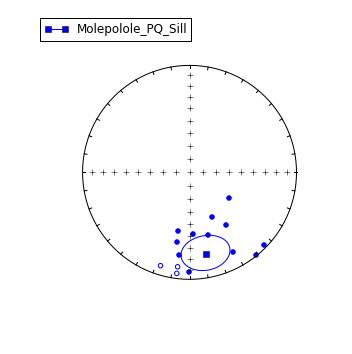

In [60]:
Molepolole_PQ_Sill=[]
Molepolole_PQ_Sill = PW19_ALL + PW18_AFtc_edit_dir 
Molepolole_PQ_Sill_mean=pmag.fisher_mean(Molepolole_PQ_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Molepolole_PQ_Sill,color='blue')
IPmag.iplotDImean(Molepolole_PQ_Sill_mean['dec'],
                  Molepolole_PQ_Sill_mean['inc'],
                  Molepolole_PQ_Sill_mean["alpha95"],color='b',marker='s',
                  label='Molepolole_PQ_Sill')

The PW18 data have similar directions to the Karoo paleomagnetic direction.  It may be that the Molepolole Prison Quarry Sill is an Umkondo sill with a Karoo overprint. Due to the lack of consistency within the intrusion it is not included in this compilation or the "unknown intrusion" table.

### Lentsweletau Sill - PW20

#### Thermal demag

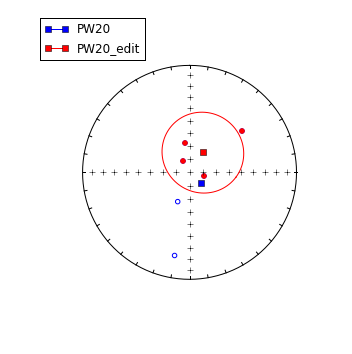

In [61]:
PW20_tc_dir=[]
for n in range(len(PW20_tc)):
    Dec,Inc=PW20_tc['specimen_dec'][n],PW20_tc['specimen_inc'][n]
    PW20_tc_dir.append([Dec,Inc,1.])
PW20_tc_mean=pmag.fisher_mean(PW20_tc_dir)

PW20_tc_edit = PW20_tc
PW20_tc_edit = PW20_tc_edit.drop(0)
PW20_tc_edit = PW20_tc_edit.drop(2)
PW20_tc_edit.reset_index(inplace=True)

PW20_tc_edit_dir=[]
for n in range(len(PW20_tc_edit)):
    Dec,Inc=PW20_tc_edit['specimen_dec'][n],PW20_tc_edit['specimen_inc'][n]
    PW20_tc_edit_dir.append([Dec,Inc,1.])
PW20_tc_edit_mean=pmag.fisher_mean(PW20_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW20_tc_dir,color='b')
IPmag.iplotDImean(PW20_tc_mean['dec'],PW20_tc_mean['inc'],
                  PW20_tc_mean["alpha95"],color='b',marker='s',label='PW20')
IPmag.iplotDI(PW20_tc_edit_dir,color='r')
IPmag.iplotDImean(PW20_tc_edit_mean['dec'],PW20_tc_edit_mean['inc'],
                  PW20_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW20_edit')


#### AF demag

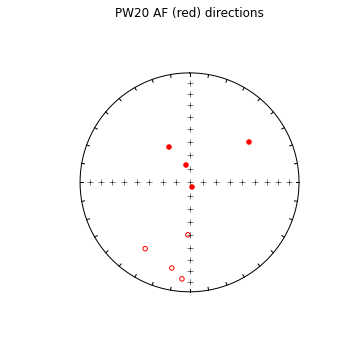

In [62]:
PW20_AFdata=pd.read_csv('../Data/Botswana_AF/PW20/pmag_specimens.txt',
                        sep='\t',header=1)
PW20_AFtc = PW20_AFdata[PW20_AFdata['specimen_tilt_correction'] == 100]
PW20_AFtc.reset_index(drop=True, inplace=True)

PW20_AFtc_dir=[]
for n in range(len(PW20_AFtc)):
    Dec,Inc=PW20_AFtc['specimen_dec'][n],PW20_AFtc['specimen_inc'][n]
    PW20_AFtc_dir.append([Dec,Inc,1.])
PW20_AFtc_mean=pmag.fisher_mean(PW20_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW20_AFtc_edit = PW20_AFtc
PW20_AFtc_edit.reset_index(drop=True, inplace=True)
PW20_AFtc_edit_dir=[]
for n in range(len(PW20_AFtc_edit)):
    Dec,Inc=PW20_AFtc_edit['specimen_dec'][n],PW20_AFtc_edit['specimen_inc'][n]
    PW20_AFtc_edit_dir.append([Dec,Inc,1.])
PW20_AFtc_edit_mean=pmag.fisher_mean(PW20_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW20_AFtc_edit_dir,color='red')
plt.title('PW20 AF (red) directions')
plt.show()

Results for PW20 are scattered and are not considered further.

### Mosolotsane 1 Sill - PW21,PW22,JP22,JP23,JP24

#### Thermal demag (only PW22)

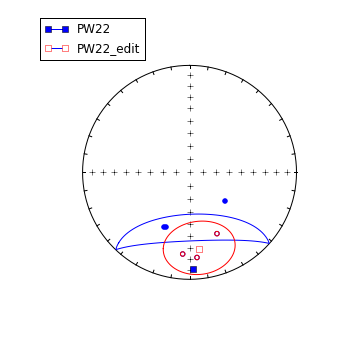

In [63]:
PW22_tc_dir=[]
for n in range(len(PW19_tc)):
    Dec,Inc=PW22_tc['specimen_dec'][n],PW22_tc['specimen_inc'][n],
    PW22_tc_dir.append([Dec,Inc,1.])
PW22_tc_mean=pmag.fisher_mean(PW22_tc_dir)

PW22_tc_edit = PW22_tc
PW22_tc_edit = PW22_tc_edit.drop(0)
PW22_tc_edit = PW22_tc_edit.drop(1)
PW22_tc_edit = PW22_tc_edit.drop(5)
PW22_tc_edit.reset_index(inplace=True)

PW22_tc_edit_dir=[]
for n in range(len(PW22_tc_edit)):
    Dec,Inc=PW22_tc_edit['specimen_dec'][n],PW22_tc_edit['specimen_inc'][n],
    PW22_tc_edit_dir.append([Dec,Inc,1.])
PW22_tc_edit_mean=pmag.fisher_mean(PW22_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW22_tc_dir,color='b')
IPmag.iplotDImean(PW22_tc_mean['dec'],PW22_tc_mean['inc'],
                  PW22_tc_mean["alpha95"],color='b',marker='s',label='PW22')
IPmag.iplotDI(PW22_tc_edit_dir,color='r')
IPmag.iplotDImean(PW22_tc_edit_mean['dec'],PW22_tc_edit_mean['inc'],
                  PW22_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW22_edit')


#### AF demag (PW21 and PW22)

##### PW21_AF

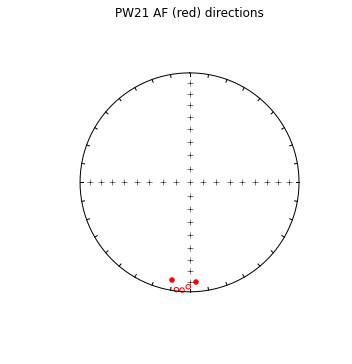

In [64]:
PW21_AFdata=pd.read_csv('../Data/Botswana_AF/PW21/pmag_specimens.txt',
                        sep='\t',header=1)
PW21_AFtc = PW21_AFdata[PW21_AFdata['specimen_tilt_correction'] == 100]
PW21_AFtc.reset_index(drop=True, inplace=True)

PW21_AFtc_dir=[]
for n in range(len(PW21_AFtc)):
    Dec,Inc=PW21_AFtc['specimen_dec'][n],PW21_AFtc['specimen_inc'][n]
    PW21_AFtc_dir.append([Dec,Inc,1.])
PW21_AFtc_mean=pmag.fisher_mean(PW21_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW21_AFtc_edit = PW21_AFtc
PW21_AFtc_edit.reset_index(drop=True, inplace=True)
PW21_AFtc_edit_dir=[]
for n in range(len(PW21_AFtc_edit)):
    Dec,Inc=PW21_AFtc_edit['specimen_dec'][n],PW21_AFtc_edit['specimen_inc'][n]
    PW21_AFtc_edit_dir.append([Dec,Inc,1.])
PW21_AFtc_edit_mean=pmag.fisher_mean(PW21_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW21_AFtc_edit_dir,color='red')
plt.title('PW21 AF (red) directions')
plt.show()

##### PW22_AF

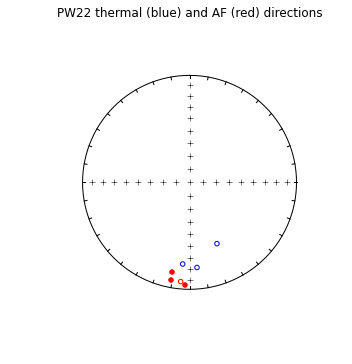

In [65]:
PW22_AFdata=pd.read_csv('../Data/Botswana_AF/PW22/pmag_specimens.txt',
                        sep='\t',header=1)
PW22_AFtc = PW22_AFdata[PW22_AFdata['specimen_tilt_correction'] == 100]
PW22_AFtc.reset_index(drop=True, inplace=True)

PW22_AFtc_dir=[]
for n in range(len(PW22_AFtc)):
    Dec,Inc=PW22_AFtc['specimen_dec'][n],PW22_AFtc['specimen_inc'][n]
    PW22_AFtc_dir.append([Dec,Inc,1.])
PW22_AFtc_mean=pmag.fisher_mean(PW22_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW22_AFtc_edit = PW22_AFtc
PW22_AFtc_edit = PW22_AFtc_edit.drop(3)
PW22_AFtc_edit = PW22_AFtc_edit.drop(4)
PW22_AFtc_edit = PW22_AFtc_edit.drop(5)
PW22_AFtc_edit = PW22_AFtc_edit.drop(0)
PW22_AFtc_edit.reset_index(drop=True, inplace=True)
PW22_AFtc_edit_dir=[]
for n in range(len(PW22_AFtc_edit)):
    Dec,Inc=PW22_AFtc_edit['specimen_dec'][n],PW22_AFtc_edit['specimen_inc'][n]
    PW22_AFtc_edit_dir.append([Dec,Inc,1.])
PW22_AFtc_edit_mean=pmag.fisher_mean(PW22_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW22_tc_edit_dir,color='blue')
IPmag.iplotDI(PW22_AFtc_edit_dir,color='red')
plt.title('PW22 thermal (blue) and AF (red) directions')
plt.show()

Very good agreement between PW21_AF, PW22_thermal, and PW22_AF. We combine results for a robust mean direction. The Pancake (2001) data from the same intrusion (JP(22,23,24)) is added before calculating a mean.

In [66]:
JP22_23_24_dir = pickle.load(open('../Data/Pickle/JP22_23_24','rb'))

#### Mosolotsane 1 Sill combined mean - PW21_AF, PW22_ALL, JP(22, 23, 24)

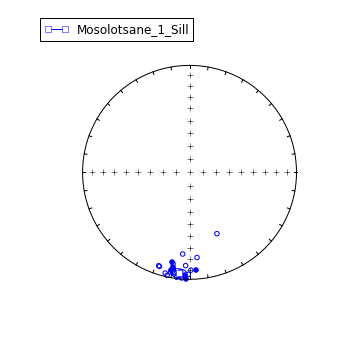

In [67]:
Mosolotsane_1_Sill=[]
Mosolotsane_1_Sill = (PW22_tc_edit_dir + PW22_AFtc_edit_dir + 
                      PW21_AFtc_edit_dir + JP22_23_24_dir)
Mosolotsane_1_Sill_mean=pmag.fisher_mean(Mosolotsane_1_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_1_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_1_Sill_mean['dec'],
                  Mosolotsane_1_Sill_mean['inc'],
                  Mosolotsane_1_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_1_Sill')

The Pancake data improves the mean greatly and are consistent with our new data and thus are included.

In [68]:
Intrusion_mean_directions.loc['Mosolotsane_1_Sill']=pd.Series({
        'Intrusion_name':'Mosolotsane_1_Sill', 
        'sites_used':'PW21_AF, PW22_ALL, and JP(22,23,24)',
        'site_lat':Site_Locations['LAT(WGS84)'][21], 
        'site_long':Site_Locations['LONG(WGS84)'][21],
        'n':int(Mosolotsane_1_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_1_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_1_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_1_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_1_Sill_mean['k'],1),
        'date':'1109.3','date_error':'0.6',
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_1_Sill']

Intrusion_name                     Mosolotsane_1_Sill
sites_used        PW21_AF, PW22_ALL, and JP(22,23,24)
site_lat                                    -22.90699
site_long                                    26.38929
n                                                  27
dec_tc                                          186.1
inc_tc                                           -5.6
a_95                                              4.6
k                                                36.9
date                                           1109.3
date_error                                        0.6
dip_direction                                   262.9
dip                                                10
Name: Mosolotsane_1_Sill, dtype: object

### Mosolotsane 5 Sill - PW23

#### Thermal demag

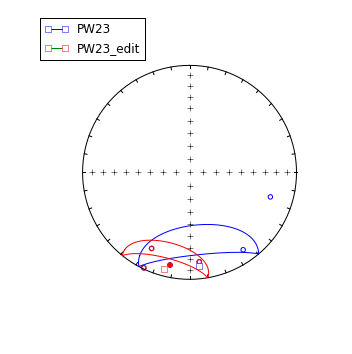

In [69]:
PW23_tc_dir=[]
for n in range(len(PW23_tc)):
    Dec,Inc=PW23_tc['specimen_dec'][n],PW23_tc['specimen_inc'][n]
    PW23_tc_dir.append([Dec,Inc,1.])
PW23_tc_mean=pmag.fisher_mean(PW23_tc_dir)

PW23_tc_edit = PW23_tc
PW23_tc_edit = PW23_tc_edit.drop(1)
PW23_tc_edit = PW23_tc_edit.drop(4)
PW23_tc_edit.reset_index(inplace=True)

PW23_tc_edit_dir=[]
for n in range(len(PW23_tc_edit)):
    Dec,Inc=PW23_tc_edit['specimen_dec'][n],PW23_tc_edit['specimen_inc'][n]
    PW23_tc_edit_dir.append([Dec,Inc,1.])
PW23_tc_edit_mean=pmag.fisher_mean(PW23_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW23_tc_dir,color='b')
IPmag.iplotDImean(PW23_tc_mean['dec'],PW23_tc_mean['inc'],
                  PW23_tc_mean["alpha95"],color='b',marker='s',label='PW23')
IPmag.iplotDI(PW23_tc_edit_dir,color='r')
IPmag.iplotDImean(PW23_tc_edit_mean['dec'],PW23_tc_edit_mean['inc'],
                  PW23_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW23_edit')

#### AF demag

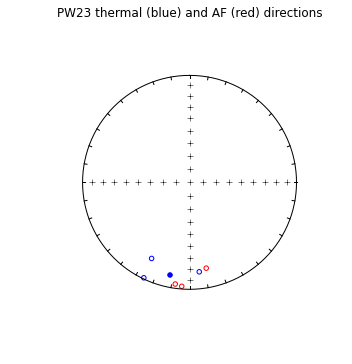

In [70]:
PW23_AFdata=pd.read_csv('../Data/Botswana_AF/PW23/pmag_specimens.txt',
                        sep='\t',header=1)
PW23_AFtc = PW23_AFdata[PW23_AFdata['specimen_tilt_correction'] == 100]
PW23_AFtc.reset_index(drop=True, inplace=True)

PW23_AFtc_dir=[]
for n in range(len(PW23_AFtc)):
    Dec,Inc=PW23_AFtc['specimen_dec'][n],PW23_AFtc['specimen_inc'][n]
    PW23_AFtc_dir.append([Dec,Inc,1.])
PW23_AFtc_mean=pmag.fisher_mean(PW23_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW23_AFtc_edit = PW23_AFtc
PW23_AFtc_edit = PW23_AFtc_edit.drop(1)
PW23_AFtc_edit = PW23_AFtc_edit.drop(3)
PW23_AFtc_edit = PW23_AFtc_edit.drop(4)
PW23_AFtc_edit = PW23_AFtc_edit.drop(6)
#Dropped another specimen with anomolously different dec.
PW23_AFtc_edit = PW23_AFtc_edit.drop(5)
PW23_AFtc_edit.reset_index(drop=True, inplace=True)
PW23_AFtc_edit_dir=[]
for n in range(len(PW23_AFtc_edit)):
    Dec,Inc=PW23_AFtc_edit['specimen_dec'][n],PW23_AFtc_edit['specimen_inc'][n]
    PW23_AFtc_edit_dir.append([Dec,Inc,1.])
PW23_AFtc_edit_mean=pmag.fisher_mean(PW23_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW23_tc_edit_dir,color='blue')
IPmag.iplotDI(PW23_AFtc_edit_dir,color='red')
plt.title('PW23 thermal (blue) and AF (red) directions')
plt.show()

There is very good agreement between all AF and thermal results. Only the 3 AF samples added are shown above.

#### Mosolotsane 5 Sill combined mean - PW23_ALL

Combine the thermal and AF data for an enhanced (and useful) mean.

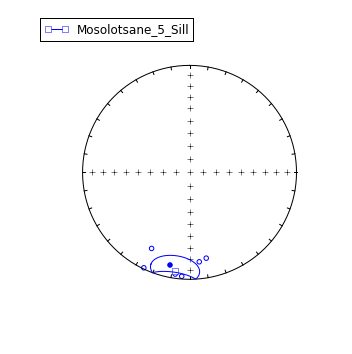

In [71]:
Mosolotsane_5_Sill=[]
Mosolotsane_5_Sill = PW23_tc_edit_dir + PW23_AFtc_edit_dir
Mosolotsane_5_Sill_mean=pmag.fisher_mean(Mosolotsane_5_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_5_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_5_Sill_mean['dec'],
                  Mosolotsane_5_Sill_mean['inc'],
                  Mosolotsane_5_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_5_Sill')

In [72]:
Intrusion_mean_directions.loc['Mosolotsane_5_Sill'] = pd.Series({
        'Intrusion_name':'Mosolotsane_5_Sill','sites_used':'PW23_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][22], 
        'site_long':Site_Locations['LONG(WGS84)'][22],
        'n':int(Mosolotsane_5_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_5_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_5_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_5_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_5_Sill_mean['k'],1),
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_5_Sill']

Intrusion_name    Mosolotsane_5_Sill
sites_used                  PW23_ALL
site_lat                    -22.9033
site_long                   26.37027
n                                  7
dec_tc                         188.5
inc_tc                          -7.9
a_95                            14.2
k                               19.1
date                             NaN
date_error                       NaN
dip_direction                  262.9
dip                               10
Name: Mosolotsane_5_Sill, dtype: object

### Mosolotsane 4 Sill - PW24

#### Thermal demag

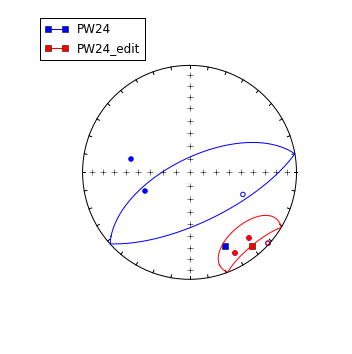

In [73]:
PW24_tc_dir=[]
for n in range(len(PW24_tc)):
    Dec,Inc=PW24_tc['specimen_dec'][n],PW24_tc['specimen_inc'][n]
    PW24_tc_dir.append([Dec,Inc,1.])
PW24_tc_mean=pmag.fisher_mean(PW24_tc_dir)

PW24_tc_edit = PW24_tc
PW24_tc_edit = PW24_tc_edit.drop(0)
PW24_tc_edit = PW24_tc_edit.drop(1)
PW24_tc_edit = PW24_tc_edit.drop(3)
PW24_tc_edit.reset_index(inplace=True)

PW24_tc_edit_dir=[]
for n in range(len(PW24_tc_edit)):
    Dec,Inc=PW24_tc_edit['specimen_dec'][n],PW24_tc_edit['specimen_inc'][n]
    PW24_tc_edit_dir.append([Dec,Inc,1.])
PW24_tc_edit_mean=pmag.fisher_mean(PW24_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW24_tc_dir,color='b')
IPmag.iplotDImean(PW24_tc_mean['dec'],PW24_tc_mean['inc'],
                  PW24_tc_mean["alpha95"],color='b',marker='s',label='PW24')
IPmag.iplotDI(PW24_tc_edit_dir,color='r')
IPmag.iplotDImean(PW24_tc_edit_mean['dec'],PW24_tc_edit_mean['inc'],
                  PW24_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW24_edit')

#### AF demag

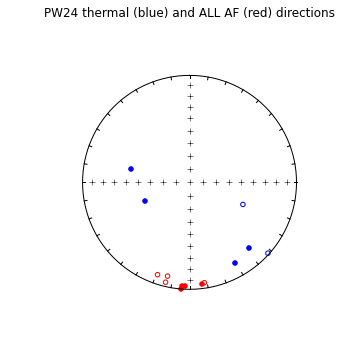

In [74]:
PW24_AFdata=pd.read_csv('../Data/Botswana_AF/PW24/pmag_specimens.txt',
                        sep='\t',header=1)
PW24_AFtc = PW24_AFdata[PW24_AFdata['specimen_tilt_correction'] == 100]
PW24_AFtc.reset_index(drop=True, inplace=True)

PW24_AFtc_dir=[]
for n in range(len(PW24_AFtc)):
    Dec,Inc=PW24_AFtc['specimen_dec'][n],PW24_AFtc['specimen_inc'][n]
    PW24_AFtc_dir.append([Dec,Inc,1.])
PW24_AFtc_mean=pmag.fisher_mean(PW24_AFtc_dir)

#Drop redundant specimens from same sample out of AF group (none dropped)
PW24_AFtc_edit = PW24_AFtc
PW24_AFtc_edit.reset_index(drop=True, inplace=True)
PW24_AFtc_edit_dir=[]
for n in range(len(PW24_AFtc_edit)):
    Dec,Inc=PW24_AFtc_edit['specimen_dec'][n],PW24_AFtc_edit['specimen_inc'][n]
    PW24_AFtc_edit_dir.append([Dec,Inc,1.])
PW24_AFtc_edit_mean=pmag.fisher_mean(PW24_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW24_tc_dir,color='blue')
IPmag.iplotDI(PW24_AFtc_edit_dir,color='red')
plt.title('PW24 thermal (blue) and ALL AF (red) directions')
plt.show()

The AF samples are far more consistent than the thermal results. It appears that AF demagnetization was more effective than thermal in isolating a charecteristic remanence for this site. We will use PW24_AF for the mean direction.

####Mosolotsane 4 Sill mean - PW24_AF

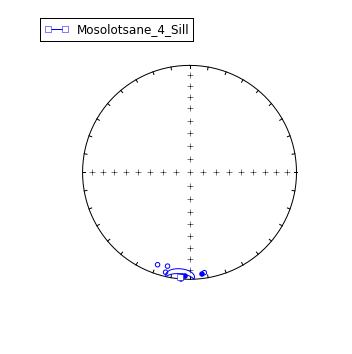

In [75]:
Mosolotsane_4_Sill=[]
Mosolotsane_4_Sill = PW24_AFtc_edit_dir
Mosolotsane_4_Sill_mean=pmag.fisher_mean(Mosolotsane_4_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_4_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_4_Sill_mean['dec'],
                  Mosolotsane_4_Sill_mean['inc'],
                  Mosolotsane_4_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_4_Sill')

In [76]:
Intrusion_mean_directions.loc['Mosolotsane_4_Sill']=pd.Series({
        'Intrusion_name':'Mosolotsane_4_Sill', 
        'sites_used':'PW24_AF',
        'site_lat':Site_Locations['LAT(WGS84)'][23], 
        'site_long':Site_Locations['LONG(WGS84)'][23],
        'n':int(Mosolotsane_4_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_4_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_4_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_4_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_4_Sill_mean['k'],1),
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_4_Sill']

Intrusion_name    Mosolotsane_4_Sill
sites_used                   PW24_AF
site_lat                   -22.89467
site_long                    26.3741
n                                  8
dec_tc                         185.2
inc_tc                          -2.5
a_95                             7.9
k                               50.3
date                             NaN
date_error                       NaN
dip_direction                  262.9
dip                               10
Name: Mosolotsane_4_Sill, dtype: object

### Mosolotsane 6 Sill - PW25

#### Thermal demag

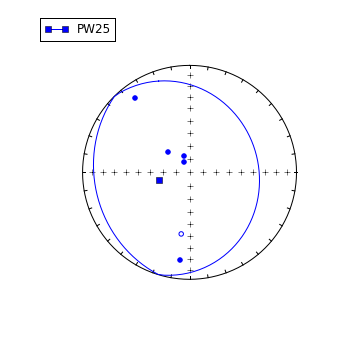

In [77]:
PW25_tc_dir=[]
for n in range(len(PW25_tc)):
    Dec,Inc=PW25_tc['specimen_dec'][n],PW25_tc['specimen_inc'][n]
    PW25_tc_dir.append([Dec,Inc,1.])
PW25_tc_mean=pmag.fisher_mean(PW25_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW25_tc_dir,color='b')
IPmag.iplotDImean(PW25_tc_mean['dec'],PW25_tc_mean['inc'],
                  PW25_tc_mean["alpha95"],color='b',marker='s',label='PW25')

The grouping of three samples that are NW and steeply down could be an overpitn. However, the 5 samples yielded AF results (see below) with directions very similar to other Umkondo intrusions.

#### AF demag

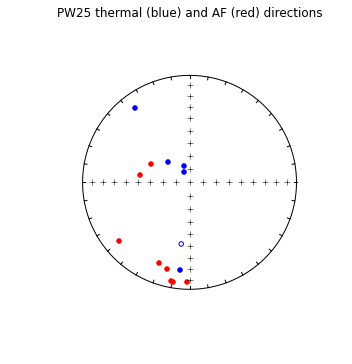

In [78]:
PW25_AFdata=pd.read_csv('../Data/Botswana_AF/PW25/pmag_specimens.txt',
                        sep='\t',header=1)
PW25_AFtc = PW25_AFdata[PW25_AFdata['specimen_tilt_correction'] == 100]
PW25_AFtc.reset_index(drop=True, inplace=True)

PW25_AFtc_dir=[]
for n in range(len(PW25_AFtc)):
    Dec,Inc=PW25_AFtc['specimen_dec'][n],PW25_AFtc['specimen_inc'][n]
    PW25_AFtc_dir.append([Dec,Inc,1.])
PW25_AFtc_mean=pmag.fisher_mean(PW25_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW25_AFtc_edit = PW25_AFtc
PW25_AFtc_edit = PW25_AFtc_edit.drop(0)
PW25_AFtc_edit = PW25_AFtc_edit.drop(3)
PW25_AFtc_edit = PW25_AFtc_edit.drop(7)
PW25_AFtc_edit.reset_index(drop=True, inplace=True)
PW25_AFtc_edit_dir=[]
for n in range(len(PW25_AFtc_edit)):
    Dec,Inc=PW25_AFtc_edit['specimen_dec'][n],PW25_AFtc_edit['specimen_inc'][n]
    PW25_AFtc_edit_dir.append([Dec,Inc,1.])
PW25_AFtc_edit_mean=pmag.fisher_mean(PW25_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW25_tc_dir,color='blue')
IPmag.iplotDI(PW25_AFtc_dir,color='red')
plt.title('PW25 thermal (blue) and AF (red) directions')
plt.show()

The AF data are much more consistent than the thermal results. AF demagnetization appears to have been more effective in isolating the characteristic remanence than thermal demagnetization. There is only one sample with a thermal result that is in agreement with its AF result. We choose to use the PW25_AF mean for the Mosolotsane 6 Sill.

####Mosolotsane 6 Sill mean - PW25_AF

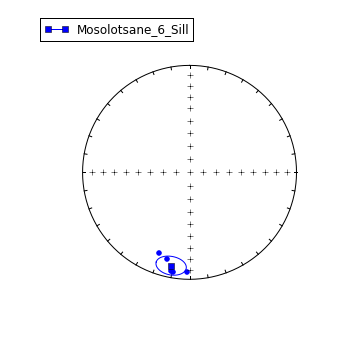

In [79]:
Mosolotsane_6_Sill=[]
Mosolotsane_6_Sill = PW25_AFtc_edit_dir
Mosolotsane_6_Sill_mean=pmag.fisher_mean(Mosolotsane_6_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_6_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_6_Sill_mean['dec'],
                  Mosolotsane_6_Sill_mean['inc'],
                  Mosolotsane_6_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_6_Sill')

We add the PW25_AF mean direction to the Umkondo cooling unit table.

In [80]:
Intrusion_mean_directions.loc['Mosolotsane_6_Sill'] = pd.Series({
        'Intrusion_name':'Mosolotsane_6_Sill','sites_used':'PW25_AF',
        'site_lat':Site_Locations['LAT(WGS84)'][24], 
        'site_long':Site_Locations['LONG(WGS84)'][24],
        'n':int(Mosolotsane_6_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_6_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_6_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_6_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_6_Sill_mean['k'],1),
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_6_Sill']

Intrusion_name    Mosolotsane_6_Sill
sites_used                   PW25_AF
site_lat                    -22.8955
site_long                   26.36726
n                                  5
dec_tc                         191.2
inc_tc                          11.8
a_95                               9
k                               72.7
date                             NaN
date_error                       NaN
dip_direction                  262.9
dip                               10
Name: Mosolotsane_6_Sill, dtype: object

### Mosolotsane 3 Sill - PW26

#### Thermal demag

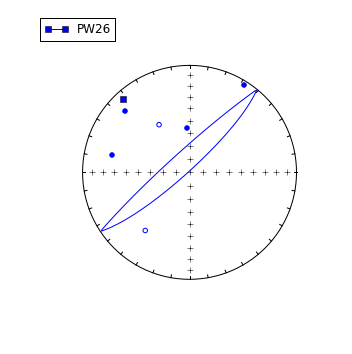

In [81]:
PW26_tc_dir=[]
for n in range(len(PW26_tc)):
    Dec,Inc=PW26_tc['specimen_dec'][n],PW26_tc['specimen_inc'][n]
    PW26_tc_dir.append([Dec,Inc,1.])
PW26_tc_mean=pmag.fisher_mean(PW26_tc_dir)

#No consistent group, so didn't exclude any samples
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW26_tc_dir,color='b')
IPmag.iplotDImean(PW26_tc_mean['dec'],PW26_tc_mean['inc'],
                  PW26_tc_mean["alpha95"],color='b',marker='s',label='PW26')

#### AF demag

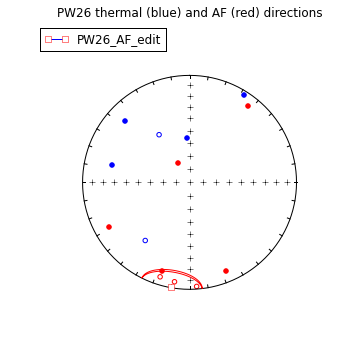

In [82]:
PW26_AFdata=pd.read_csv('../Data/Botswana_AF/PW26/pmag_specimens.txt',
                        sep='\t',header=1)
PW26_AFtc = PW26_AFdata[PW26_AFdata['specimen_tilt_correction'] == 100]
PW26_AFtc.reset_index(drop=True, inplace=True)

PW26_AFtc_dir=[]
for n in range(len(PW26_AFtc)):
    Dec,Inc=PW26_AFtc['specimen_dec'][n],PW26_AFtc['specimen_inc'][n]
    PW26_AFtc_dir.append([Dec,Inc,1.])
PW26_AFtc_mean=pmag.fisher_mean(PW26_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW26_AFtc_edit = PW26_AFtc
PW26_AFtc_edit = PW26_AFtc_edit.drop(0)
PW26_AFtc_edit = PW26_AFtc_edit.drop(1)
PW26_AFtc_edit = PW26_AFtc_edit.drop(5)
PW26_AFtc_edit = PW26_AFtc_edit.drop(6)
PW26_AFtc_edit.reset_index(drop=True, inplace=True)
PW26_AFtc_edit_dir=[]
for n in range(len(PW26_AFtc_edit)):
    Dec,Inc=PW26_AFtc_edit['specimen_dec'][n],PW26_AFtc_edit['specimen_inc'][n]
    PW26_AFtc_edit_dir.append([Dec,Inc,1.])
PW26_AFtc_edit_mean=pmag.fisher_mean(PW26_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW26_tc_dir,color='blue')
IPmag.iplotDI(PW26_AFtc_dir,color='red')
IPmag.iplotDImean(PW26_AFtc_edit_mean['dec'],PW26_AFtc_edit_mean['inc'],
                  PW26_AFtc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW26_AF_edit')
plt.title('PW26 thermal (blue) and AF (red) directions')
plt.show()

Thermal results are quite scattered. Results from four AF specimens (the same samples were also analyzed thermally) share a consistent Umkondo direction. Although the error of the mean in high, this site will be included in the summary table. The high error on the mean means that it will be filtered out when the grand mean pole is calculated.

####Mosolotsane 3 Sill mean - (PW26_AF)

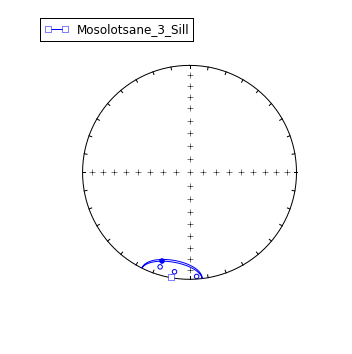

In [83]:
Mosolotsane_3_Sill=[]
Mosolotsane_3_Sill = PW26_AFtc_edit_dir
Mosolotsane_3_Sill_mean=pmag.fisher_mean(Mosolotsane_3_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_3_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_3_Sill_mean['dec'],
                  Mosolotsane_3_Sill_mean['inc'],
                  Mosolotsane_3_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_3_Sill')

Results from PW26_AF are added to the summary table.

In [84]:
Intrusion_mean_directions.loc['Mosolotsane_3_Sill'] = pd.Series({
        'Intrusion_name':'Mosolotsane_3_Sill','sites_used':'PW26_AF',
        'site_lat':Site_Locations['LAT(WGS84)'][25], 
        'site_long':Site_Locations['LONG(WGS84)'][25],
        'n':int(Mosolotsane_3_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_3_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_3_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_3_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_3_Sill_mean['k'],1),
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_3_Sill']

Intrusion_name    Mosolotsane_3_Sill
sites_used                   PW26_AF
site_lat                   -22.89259
site_long                   26.38113
n                                  4
dec_tc                         189.8
inc_tc                          -0.9
a_95                            16.7
k                               31.3
date                             NaN
date_error                       NaN
dip_direction                  262.9
dip                               10
Name: Mosolotsane_3_Sill, dtype: object

### Mosolotsane 2 Sill - PW27

#### Thermal demag

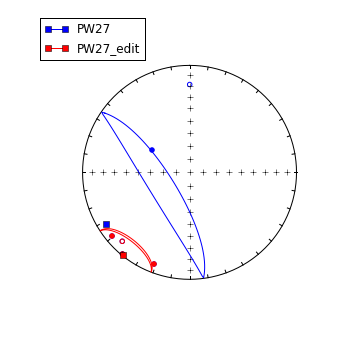

In [85]:
PW27_tc_dir=[]
for n in range(len(PW27_tc)):
    Dec,Inc=PW27_tc['specimen_dec'][n],PW27_tc['specimen_inc'][n]
    PW27_tc_dir.append([Dec,Inc,1.])
PW27_tc_mean=pmag.fisher_mean(PW27_tc_dir)


PW27_tc_edit = PW27_tc
PW27_tc_edit = PW27_tc_edit.drop(4)
PW27_tc_edit = PW27_tc_edit.drop(5)
PW27_tc_edit.reset_index(inplace=True)

PW27_tc_edit_dir=[]
for n in range(len(PW27_tc_edit)):
    Dec,Inc=PW27_tc_edit['specimen_dec'][n],PW27_tc_edit['specimen_inc'][n]
    PW27_tc_edit_dir.append([Dec,Inc,1.])
PW27_tc_edit_mean=pmag.fisher_mean(PW27_tc_edit_dir)


fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW27_tc_dir,color='b')
IPmag.iplotDImean(PW27_tc_mean['dec'],PW27_tc_mean['inc'],
                  PW27_tc_mean["alpha95"],color='b',marker='s',label='PW27')
IPmag.iplotDI(PW27_tc_edit_dir,color='r')
IPmag.iplotDImean(PW27_tc_edit_mean['dec'],PW27_tc_edit_mean['inc'],
                  PW27_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW27_edit')

#### AF demag

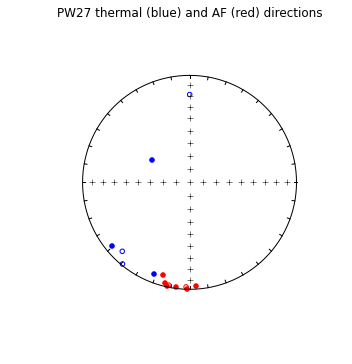

In [86]:
PW27_AFdata=pd.read_csv('../Data/Botswana_AF/PW27/pmag_specimens.txt',
                        sep='\t',header=1)
PW27_AFtc = PW27_AFdata[PW27_AFdata['specimen_tilt_correction'] == 100]
PW27_AFtc.reset_index(drop=True, inplace=True)

PW27_AFtc_dir=[]
for n in range(len(PW27_AFtc)):
    Dec,Inc=PW27_AFtc['specimen_dec'][n],PW27_AFtc['specimen_inc'][n]
    PW27_AFtc_dir.append([Dec,Inc,1.])
PW27_AFtc_mean=pmag.fisher_mean(PW27_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW27_AFtc_edit = PW27_AFtc
PW27_AFtc_edit.reset_index(drop=True, inplace=True)
PW27_AFtc_edit_dir=[]
for n in range(len(PW27_AFtc_edit)):
    Dec,Inc=PW27_AFtc_edit['specimen_dec'][n],PW27_AFtc_edit['specimen_inc'][n]
    PW27_AFtc_edit_dir.append([Dec,Inc,1.])
PW27_AFtc_edit_mean=pmag.fisher_mean(PW27_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW27_tc_dir,color='blue')
IPmag.iplotDI(PW27_AFtc_dir,color='red')
plt.title('PW27 thermal (blue) and AF (red) directions')
plt.show()

Thermal results are far more scattered than the AF results, although there are some slight similarities in some samples. Due to the consistency of the AF results they are used for the calculation of the mean for the sill and the compilation.

#### Mosolotsane 2 Sill combined mean (PW27_AF)

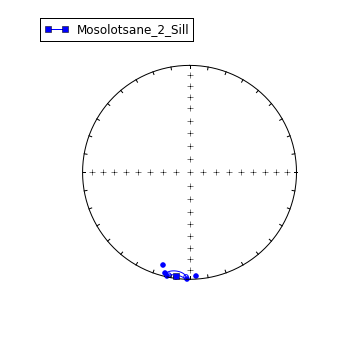

In [87]:
Mosolotsane_2_Sill=[]
Mosolotsane_2_Sill = PW27_AFtc_edit_dir
Mosolotsane_2_Sill_mean=pmag.fisher_mean(Mosolotsane_2_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mosolotsane_2_Sill,color='blue')
IPmag.iplotDImean(Mosolotsane_2_Sill_mean['dec'],
                  Mosolotsane_2_Sill_mean['inc'],
                  Mosolotsane_2_Sill_mean["alpha95"],color='b',
                  marker='s',label='Mosolotsane_2_Sill')

In [88]:
Intrusion_mean_directions.loc['Mosolotsane_2_Sill'] = pd.Series({
        'Intrusion_name':'Mosolotsane_2_Sill','sites_used':'PW27_AF',
        'site_lat':Site_Locations['LAT(WGS84)'][26], 
        'site_long':Site_Locations['LONG(WGS84)'][26],
        'n':int(Mosolotsane_2_Sill_mean['n']),
        'dec_tc':round(Mosolotsane_2_Sill_mean['dec'],1),
        'inc_tc':round(Mosolotsane_2_Sill_mean['inc'],1),
        'a_95':round(Mosolotsane_2_Sill_mean['alpha95'],1),
        'k':round(Mosolotsane_2_Sill_mean['k'],1),
        'dip_direction':262.9,'dip':10}) 
Intrusion_mean_directions.ix['Mosolotsane_2_Sill']

Intrusion_name    Mosolotsane_2_Sill
sites_used                   PW27_AF
site_lat                   -22.89228
site_long                   26.38196
n                                  8
dec_tc                         187.6
inc_tc                             2
a_95                             5.6
k                               97.5
date                             NaN
date_error                       NaN
dip_direction                  262.9
dip                               10
Name: Mosolotsane_2_Sill, dtype: object

### Shoshong Sill - PW28,JP31,JP33,JP34,J_M(1-6)

All samples are consistent with each other and have great behavior. 'Sites 1 through 6' from Jones and McElhinney (1966) (i.e. J_M(1-6)) were sampled in the Shoshong Sill, but cannot be combined with our new results and those of Pancake because we do not have the complete sample level dataset. The mean we calculate from this sill is a combination of our data and Pancake (2001) data.

#### Thermal demag

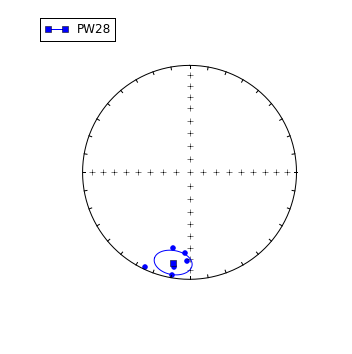

In [89]:
PW28_tc_dir=[]
for n in range(len(PW28_tc)):
    Dec,Inc=PW28_tc['specimen_dec'][n],PW28_tc['specimen_inc'][n]
    PW28_tc_dir.append([Dec,Inc,1.])
PW28_tc_mean=pmag.fisher_mean(PW28_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW28_tc_dir,color='b')
IPmag.iplotDImean(PW28_tc_mean['dec'],PW28_tc_mean['inc'],
                  PW28_tc_mean["alpha95"],color='b',marker='s',label='PW28')

#### AF demag

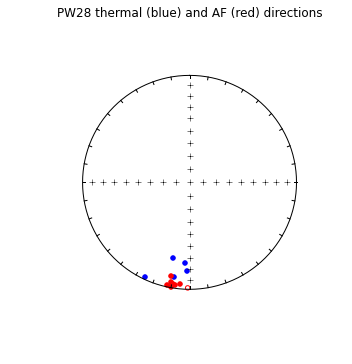

In [90]:
PW28_AFdata=pd.read_csv('../Data/Botswana_AF/PW28/pmag_specimens.txt',
                        sep='\t',header=1)
PW28_AFtc = PW28_AFdata[PW28_AFdata['specimen_tilt_correction'] == 100]
PW28_AFtc.reset_index(drop=True, inplace=True)

PW28_AFtc_dir=[]
for n in range(len(PW28_AFtc)):
    Dec,Inc=PW28_AFtc['specimen_dec'][n],PW28_AFtc['specimen_inc'][n]
    PW28_AFtc_dir.append([Dec,Inc,1.])
PW28_AFtc_mean=pmag.fisher_mean(PW28_AFtc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW28_tc_dir,color='blue')
IPmag.iplotDI(PW28_AFtc_dir,color='red')
plt.title('PW28 thermal (blue) and AF (red) directions')
plt.show()

There is good agreement between the thermal and AF results with the AF results having higher precision. We utilize the AF demagnetization data for the mean and also add the data from JP31, JP33, and JP34, which were sampled from the same sill.

In [91]:
JP26_31_33_34_dir = pickle.load(open('../Data/Pickle/JP26_31_33_34','rb'))

#### Shosong Sill combined mean

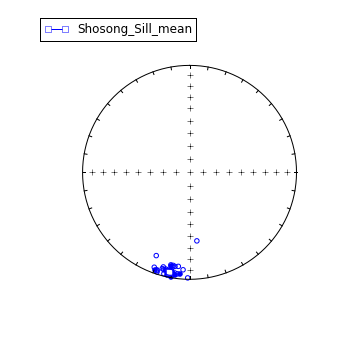

In [92]:
Shoshong_Sill=[]
Shoshong_Sill = PW28_AFtc_dir + JP26_31_33_34_dir
Shoshong_Sill_mean=pmag.fisher_mean(Shoshong_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Shoshong_Sill,color='blue')
IPmag.iplotDImean(Shoshong_Sill_mean['dec'],Shoshong_Sill_mean['inc'],
                  Shoshong_Sill_mean["alpha95"],color='b',marker='s',
                  label='Shosong_Sill_mean')

In [93]:
Intrusion_mean_directions.loc['Shoshong_Sill'] = pd.Series({
        'Intrusion_name':'Shoshong_Sill', 
        'sites_used':'PW28_AF and JP(26,31,33,34)',
        'site_lat':Site_Locations['LAT(WGS84)'][27], 
        'site_long':Site_Locations['LONG(WGS84)'][27],
        'n':int(Shoshong_Sill_mean['n']),
        'dec_tc':round(Shoshong_Sill_mean['dec'],1),
        'inc_tc':round(Shoshong_Sill_mean['inc'],1),
        'a_95':round(Shoshong_Sill_mean['alpha95'],1),
        'k':round(Shoshong_Sill_mean['k'],1),
        'date':'1109.3','date_error':'0.4',
        'dip_direction':0,'dip':0})
Intrusion_mean_directions.ix['Shoshong_Sill']

Intrusion_name                  Shoshong_Sill
sites_used        PW28_AF and JP(26,31,33,34)
site_lat                            -23.00519
site_long                            26.48383
n                                          33
dec_tc                                  191.5
inc_tc                                   -5.4
a_95                                      3.1
k                                        65.2
date                                   1109.3
date_error                                0.4
dip_direction                               0
dip                                         0
Name: Shoshong_Sill, dtype: object

### Phage Sill - PW29

#### Thermal demag

Thermal results are inconsistent.

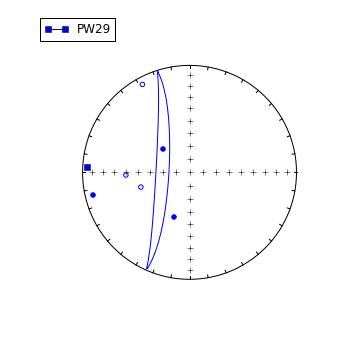

In [94]:
PW29_tc_dir=[]
for n in range(len(PW29_tc)):
    Dec,Inc=PW29_tc['specimen_dec'][n],PW29_tc['specimen_inc'][n]
    PW29_tc_dir.append([Dec,Inc,1.])
PW29_tc_mean=pmag.fisher_mean(PW29_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW29_tc_dir,color='b')
IPmag.iplotDImean(PW29_tc_mean['dec'],PW29_tc_mean['inc'],
                  PW29_tc_mean["alpha95"],color='b',marker='s',
                  label='PW29')

#### AF demag

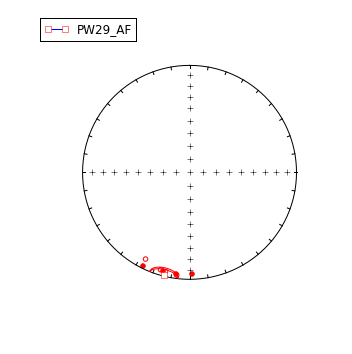

In [95]:
PW29_AFdata=pd.read_csv('../Data/Botswana_AF/PW29/pmag_specimens.txt',
                        sep='\t',header=1)
PW29_AFtc = PW29_AFdata[PW29_AFdata['specimen_tilt_correction'] == 100]
PW29_AFtc.reset_index(drop=True, inplace=True)

PW29_AFtc_dir=[]
for n in range(len(PW29_AFtc)):
    Dec,Inc=PW29_AFtc['specimen_dec'][n],PW29_AFtc['specimen_inc'][n]
    PW29_AFtc_dir.append([Dec,Inc,1.])
PW29_AFtc_mean=pmag.fisher_mean(PW29_AFtc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW29_AFtc_dir,color='red')
IPmag.iplotDImean(PW29_AFtc_mean['dec'],PW29_AFtc_mean['inc'],
                  PW29_AFtc_mean["alpha95"],color='r',marker='s',
                  label='PW29_AF')

The AF demagnetization data are significantly more consisent than the thermally demagnetized specimens. We use the AF mean for this intrusion for the compilation.

In [96]:
Intrusion_mean_directions.loc['Phage_Sill'] = pd.Series({'Intrusion_name':
                            'Phage_Sill', 
                            'sites_used':'PW29_AF',
                            'site_lat':Site_Locations['LAT(WGS84)'][28], 
                            'site_long':Site_Locations['LONG(WGS84)'][28],
                            'n':int(PW29_AFtc_mean['n']),
                            'dec_tc':round(PW29_AFtc_mean['dec'],1),
                            'inc_tc':round(PW29_AFtc_mean['inc'],1),
                            'a_95':round(PW29_AFtc_mean['alpha95'],1),
                            'k':round(PW29_AFtc_mean['k'],1),
                            'dip_direction':270.0,'dip':10})
Intrusion_mean_directions.ix['Phage_Sill']

Intrusion_name    Phage_Sill
sites_used           PW29_AF
site_lat           -22.77939
site_long           26.39372
n                          8
dec_tc                   194
inc_tc                  -0.8
a_95                     7.8
k                       50.9
date                     NaN
date_error               NaN
dip_direction            270
dip                       10
Name: Phage_Sill, dtype: object

### Moijabana Sill - PW30

#### Thermal demag

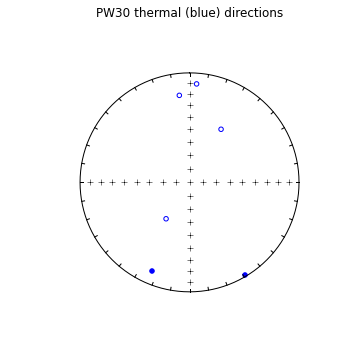

In [97]:
PW30_tc_dir=[]
for n in range(len(PW30_tc)):
    Dec,Inc=PW30_tc['specimen_dec'][n],PW30_tc['specimen_inc'][n]
    PW30_tc_dir.append([Dec,Inc,1.])
PW30_tc_mean=pmag.fisher_mean(PW30_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW30_tc_dir,color='b')
plt.title('PW30 thermal (blue) directions')
plt.show()

#### AF demag

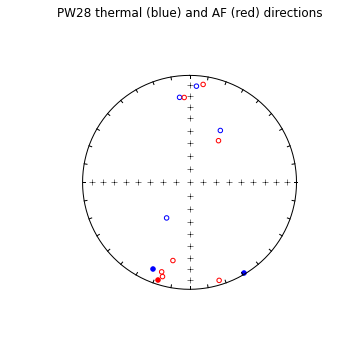

In [98]:
PW30_AFdata=pd.read_csv('../Data/Botswana_AF/PW30/pmag_specimens.txt',
                        sep='\t',header=1)
PW30_AFtc = PW30_AFdata[PW30_AFdata['specimen_tilt_correction'] == 100]
PW30_AFtc.reset_index(drop=True, inplace=True)

PW30_AFtc_dir=[]
for n in range(len(PW30_AFtc)):
    Dec,Inc=PW30_AFtc['specimen_dec'][n],PW30_AFtc['specimen_inc'][n]
    PW30_AFtc_dir.append([Dec,Inc,1.])
PW30_AFtc_mean=pmag.fisher_mean(PW30_AFtc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW30_tc_dir,color='blue')
IPmag.iplotDI(PW30_AFtc_dir,color='red')
plt.title('PW28 thermal (blue) and AF (red) directions')
plt.show()

The data is rather scattered overall, however there is decent agreement between five samples with an south-directed Umkondo direction. Thermal results near this group are already represented by AF specimens. The three thermal specimens that roughly plot N and up are close to results from AF specimens of the same samples. The edited five sample AF mean will be added to the summary table.

####Moijabana Sill mean - PW30_AF

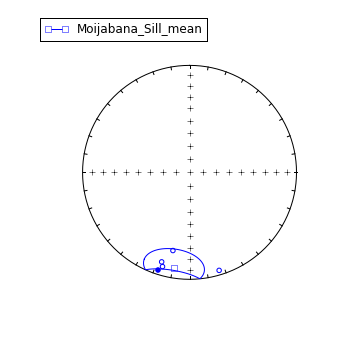

In [99]:
PW30_AFtc_edit = PW30_AFtc
PW30_AFtc_edit = PW30_AFtc_edit.drop(3)
PW30_AFtc_edit = PW30_AFtc_edit.drop(4)
PW30_AFtc_edit = PW30_AFtc_edit.drop(6)
PW30_AFtc_edit.reset_index(drop=True, inplace=True)
PW30_AFtc_edit_dir=[]
for n in range(len(PW30_AFtc_edit)):
    Dec,Inc=PW30_AFtc_edit['specimen_dec'][n],PW30_AFtc_edit['specimen_inc'][n]
    PW30_AFtc_edit_dir.append([Dec,Inc,1.])
PW30_AFtc_edit_mean=pmag.fisher_mean(PW30_AFtc_edit_dir)

Moijabana_Sill=[]
Moijabana_Sill = PW30_AFtc_edit_dir
Moijabana_Sill_mean=pmag.fisher_mean(Moijabana_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Moijabana_Sill,color='blue')
IPmag.iplotDImean(Moijabana_Sill_mean['dec'],Moijabana_Sill_mean['inc'],
                  Moijabana_Sill_mean["alpha95"],color='b',marker='s',
                  label='Moijabana_Sill_mean')

In [100]:
Intrusion_mean_directions.loc['Moijabana_Sill'] = pd.Series({'Intrusion_name':
                            'Moijabana_Sill', 
                            'sites_used':'PW30_AF',
                            'site_lat':Site_Locations['LAT(WGS84)'][29], 
                            'site_long':Site_Locations['LONG(WGS84)'][29],
                            'n':int(Moijabana_Sill_mean['n']),
                            'dec_tc':round(Moijabana_Sill_mean['dec'],1),
                            'inc_tc':round(Moijabana_Sill_mean['inc'],1),
                            'a_95':round(Moijabana_Sill_mean['alpha95'],1),
                            'k':round(Moijabana_Sill_mean['k'],1),
                            'dip_direction':0,'dip':0})
Intrusion_mean_directions.ix['Moijabana_Sill']

Intrusion_name    Moijabana_Sill
sites_used               PW30_AF
site_lat               -22.64213
site_long                26.4426
n                              5
dec_tc                     189.4
inc_tc                       -10
a_95                        17.9
k                           19.2
date                         NaN
date_error                   NaN
dip_direction                  0
dip                            0
Name: Moijabana_Sill, dtype: object

### Mokgware Sill - PW31, JP30

#### Thermal demag

An excellent site with great agreement between all samples.

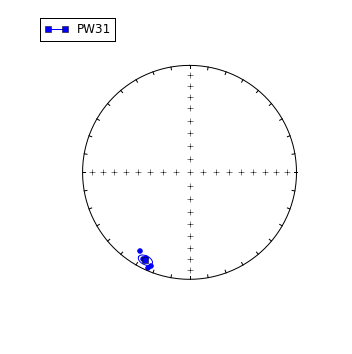

In [101]:
PW31_tc_dir=[]
for n in range(len(PW31_tc)):
    Dec,Inc=PW31_tc['specimen_dec'][n],PW31_tc['specimen_inc'][n]
    PW31_tc_dir.append([Dec,Inc,1.])
PW31_tc_mean=pmag.fisher_mean(PW31_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW31_tc_dir,color='b')
IPmag.iplotDImean(PW31_tc_mean['dec'],PW31_tc_mean['inc'],
                  PW31_tc_mean["alpha95"],color='b',marker='s',
                  label='PW31')

#### AF demag

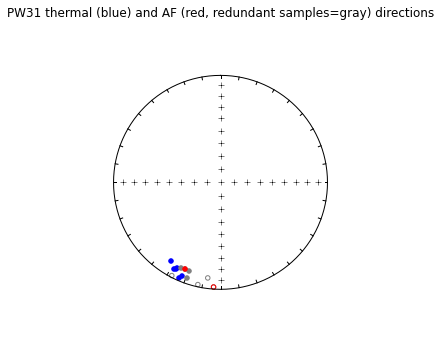

In [102]:
PW31_AFdata=pd.read_csv('../Data/Botswana_AF/PW31/pmag_specimens.txt',
                        sep='\t',header=1)
PW31_AFtc = PW31_AFdata[PW31_AFdata['specimen_tilt_correction'] == 100]
PW31_AFtc.reset_index(drop=True, inplace=True)

PW31_AFtc_dir=[]
for n in range(len(PW31_AFtc)):
    Dec,Inc=PW31_AFtc['specimen_dec'][n],PW31_AFtc['specimen_inc'][n]
    PW31_AFtc_dir.append([Dec,Inc,1.])
PW31_AFtc_mean=pmag.fisher_mean(PW31_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW31_AFtc_edit = PW31_AFtc
PW31_AFtc_edit = PW31_AFtc_edit.drop(1)
PW31_AFtc_edit = PW31_AFtc_edit.drop(2)
PW31_AFtc_edit = PW31_AFtc_edit.drop(3)
PW31_AFtc_edit = PW31_AFtc_edit.drop(4)
PW31_AFtc_edit = PW31_AFtc_edit.drop(5)
PW31_AFtc_edit = PW31_AFtc_edit.drop(0)
PW31_AFtc_edit.reset_index(drop=True, inplace=True)
PW31_AFtc_edit_dir=[]
for n in range(len(PW31_AFtc_edit)):
    Dec,Inc=PW31_AFtc_edit['specimen_dec'][n],PW31_AFtc_edit['specimen_inc'][n]
    PW31_AFtc_edit_dir.append([Dec,Inc,1.])
PW31_AFtc_edit_mean=pmag.fisher_mean(PW31_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW31_tc_dir,color='blue')
IPmag.iplotDI(PW31_AFtc_dir,color='gray')
IPmag.iplotDI(PW31_AFtc_edit_dir,color='red')
plt.title('PW31 thermal (blue) and AF (red, redundant samples=gray) directions')
plt.show()

The AF data are slightly more scattered with the two non-redundant results plotting near the mean.

We also need to combine the data from site JP30 with PW31, which was sampled from the same intrusion.

In [103]:
JP30_dir = pickle.load(open('../Data/Pickle/JP30','rb'))

#### Mokgware Sill combined mean

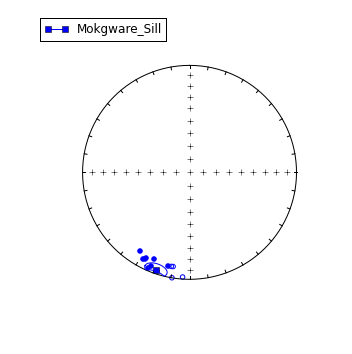

In [104]:
Mokgware_Sill=[]
Mokgware_Sill = PW31_tc_dir + PW31_AFtc_edit_dir + JP30_dir
Mokgware_Sill_mean=pmag.fisher_mean(Mokgware_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Mokgware_Sill,color='blue')
IPmag.iplotDImean(Mokgware_Sill_mean['dec'],Mokgware_Sill_mean['inc'],
                  Mokgware_Sill_mean["alpha95"],color='b',marker='s',
                  label='Mokgware_Sill')

In [105]:
Intrusion_mean_directions.loc['Mokgware_Sill'] = pd.Series({
        'Intrusion_name':'Mokgware_Sill','sites_used':'PW31_ALL and JP30',
        'site_lat':Site_Locations['LAT(WGS84)'][30], 
        'site_long':Site_Locations['LONG(WGS84)'][30],
        'n':int(Mokgware_Sill_mean['n']),
        'dec_tc':round(Mokgware_Sill_mean['dec'],1),
        'inc_tc':round(Mokgware_Sill_mean['inc'],1),
        'a_95':round(Mokgware_Sill_mean['alpha95'],1),
        'k':round(Mokgware_Sill_mean['k'],1),
        'date':'1112.0','date_error':'0.5',
        'dip_direction':90.1,'dip':4})
Intrusion_mean_directions.ix['Mokgware_Sill']

Intrusion_name        Mokgware_Sill
sites_used        PW31_ALL and JP30
site_lat                  -22.70685
site_long                  26.61142
n                                13
dec_tc                          199
inc_tc                          3.8
a_95                            6.5
k                              42.2
date                         1112.0
date_error                      0.5
dip_direction                  90.1
dip                               4
Name: Mokgware_Sill, dtype: object

### Sepatamorire Hill Sill - PW32

#### Thermal demag

Agreement between samples leades to a well-constrained characteristic Umkondo direction.

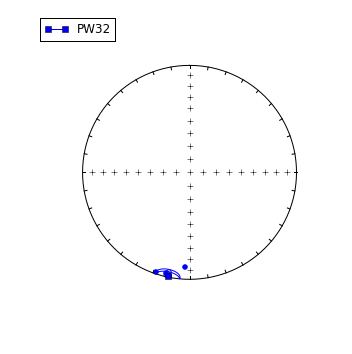

In [106]:
PW32_tc_dir=[]
for n in range(len(PW32_tc)):
    Dec,Inc=PW32_tc['specimen_dec'][n],PW32_tc['specimen_inc'][n]
    PW32_tc_dir.append([Dec,Inc,1.])
PW32_tc_mean=pmag.fisher_mean(PW32_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW32_tc_dir,color='b')
IPmag.iplotDImean(PW32_tc_mean['dec'],PW32_tc_mean['inc'],
                  PW32_tc_mean["alpha95"],color='b',marker='s',
                  label='PW32')

#### AF demag

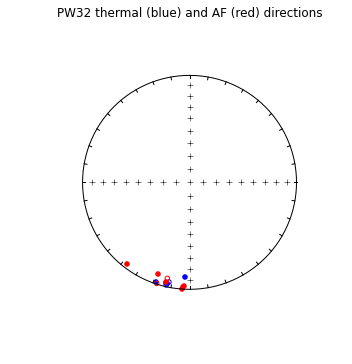

In [107]:
PW32_AFdata=pd.read_csv('../Data/Botswana_AF/PW32/pmag_specimens.txt',
                        sep='\t',header=1)
PW32_AFtc = PW32_AFdata[PW32_AFdata['specimen_tilt_correction'] == 100]
PW32_AFtc.reset_index(drop=True, inplace=True)

PW32_AFtc_dir=[]
for n in range(len(PW32_AFtc)):
    Dec,Inc=PW32_AFtc['specimen_dec'][n],PW32_AFtc['specimen_inc'][n]
    PW32_AFtc_dir.append([Dec,Inc,1.])
PW32_AFtc_mean=pmag.fisher_mean(PW32_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW32_AFtc_edit = PW32_AFtc
PW32_AFtc_edit = PW32_AFtc_edit.drop(0)
PW32_AFtc_edit = PW32_AFtc_edit.drop(1)
PW32_AFtc_edit = PW32_AFtc_edit.drop(4)
PW32_AFtc_edit = PW32_AFtc_edit.drop(5)
PW32_AFtc_edit = PW32_AFtc_edit.drop(6)
PW32_AFtc_edit = PW32_AFtc_edit.drop(7)
PW32_AFtc_edit.reset_index(drop=True, inplace=True)
PW32_AFtc_edit_dir=[]
for n in range(len(PW32_AFtc_edit)):
    Dec,Inc=PW32_AFtc_edit['specimen_dec'][n],PW32_AFtc_edit['specimen_inc'][n]
    PW32_AFtc_edit_dir.append([Dec,Inc,1.])
PW32_AFtc_edit_mean=pmag.fisher_mean(PW32_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW32_tc_dir,color='blue')
IPmag.iplotDI(PW32_AFtc_dir,color='red')
plt.title('PW32 thermal (blue) and AF (red) directions')
plt.show()

#### Sepatamorire Hill Sill combined mean

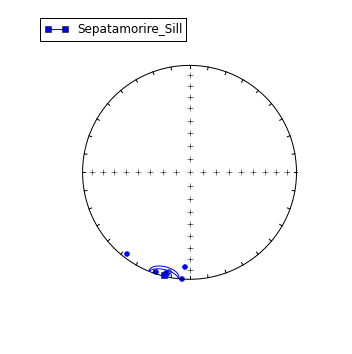

In [108]:
Sepatamorire_Sill=[]
Sepatamorire_Sill = PW32_tc_dir + PW32_AFtc_edit_dir
Sepatamorire_Sill_mean=pmag.fisher_mean(Sepatamorire_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Sepatamorire_Sill,color='blue')
IPmag.iplotDImean(Sepatamorire_Sill_mean['dec'],
                  Sepatamorire_Sill_mean['inc'],
                  Sepatamorire_Sill_mean["alpha95"],color='b',
                  marker='s',label='Sepatamorire_Sill')

In [109]:
Intrusion_mean_directions.loc['Sepatamorire_Sill']=pd.Series({
        'Intrusion_name':'Sepatamorire_Sill','sites_used':'PW32_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][31], 
        'site_long':Site_Locations['LONG(WGS84)'][31],
        'n':int(Sepatamorire_Sill_mean['n']),
        'dec_tc':round(Sepatamorire_Sill_mean['dec'],1),
        'inc_tc':round(Sepatamorire_Sill_mean['inc'],1),
        'a_95':round(Sepatamorire_Sill_mean['alpha95'],1),
        'k':round(Sepatamorire_Sill_mean['k'],1),
        'dip_direction':0,'dip':0}) 
Intrusion_mean_directions.loc['Sepatamorire_Sill']

Intrusion_name    Sepatamorire_Sill
sites_used                 PW32_ALL
site_lat                  -22.33543
site_long                  26.82285
n                                 8
dec_tc                        194.1
inc_tc                          1.5
a_95                            8.3
k                              45.6
date                            NaN
date_error                      NaN
dip_direction                     0
dip                               0
Name: Sepatamorire_Sill, dtype: object

### Palapye Dike - PW33

###AF data

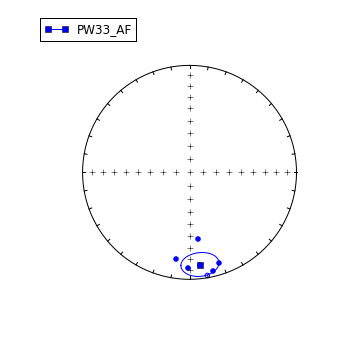

In [110]:
PW33_AFdata=pd.read_csv('../Data/Botswana_AF/PW33/pmag_specimens.txt',
                        sep='\t',header=1)
PW33_AFtc = PW33_AFdata[PW33_AFdata['specimen_tilt_correction'] == 100]
PW33_AFtc.reset_index(drop=True, inplace=True)

PW33_AFtc_dir=[]
for n in range(len(PW33_AFtc)):
    Dec,Inc=PW33_AFtc['specimen_dec'][n],PW33_AFtc['specimen_inc'][n]
    PW33_AFtc_dir.append([Dec,Inc,1.])
PW33_AFtc_mean=pmag.fisher_mean(PW33_AFtc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW33_AFtc_dir,color='blue')
IPmag.iplotDImean(PW33_AFtc_mean['dec'],PW33_AFtc_mean['inc'],
                  PW33_AFtc_mean["alpha95"],color='blue',marker='s',
                  label='PW33_AF')

####Palapye Dike mean - PW33

In [111]:
Palapye_Dike=[]
Palapye_Dike = PW33_AFtc_dir
Palapye_Dike_mean=pmag.fisher_mean(Palapye_Dike)

Intrusion_mean_directions.loc['Palapye_dike'] = pd.Series({'Intrusion_name':
                            'Palapye_dike', 
                            'sites_used':'PW33_AF',
                            'site_lat':Site_Locations['LAT(WGS84)'][32], 
                            'site_long':Site_Locations['LONG(WGS84)'][32],
                            'n':int(Palapye_Dike_mean['n']),
                            'dec_tc':round(Palapye_Dike_mean['dec'],1),
                            'inc_tc':round(Palapye_Dike_mean['inc'],1),
                            'a_95':round(Palapye_Dike_mean['alpha95'],1),
                            'k':round(Palapye_Dike_mean['k'],1),
                            'dip_direction':312.1,'dip':9}) 
Intrusion_mean_directions.ix['Palapye_dike']

Intrusion_name    Palapye_dike
sites_used             PW33_AF
site_lat             -22.57771
site_long             27.28736
n                            7
dec_tc                   173.6
inc_tc                    13.9
a_95                      11.4
k                           29
date                       NaN
date_error                 NaN
dip_direction            312.1
dip                          9
Name: Palapye_dike, dtype: object

### Masama 1 Sill - PW34

#### Thermal demag

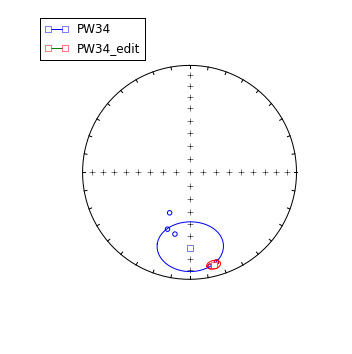

In [112]:
PW34_tc_dir=[]
for n in range(len(PW34_tc)):
    Dec,Inc=PW34_tc['specimen_dec'][n],PW34_tc['specimen_inc'][n]
    PW34_tc_dir.append([Dec,Inc,1.])
PW34_tc_mean=pmag.fisher_mean(PW34_tc_dir)

PW34_tc_edit = PW34_tc
PW34_tc_edit = PW34_tc_edit.drop(0)
PW34_tc_edit = PW34_tc_edit.drop(1)
PW34_tc_edit = PW34_tc_edit.drop(2)
PW34_tc_edit.reset_index(inplace=True)

PW34_tc_edit_dir=[]
for n in range(len(PW34_tc_edit)):
    Dec,Inc=PW34_tc_edit['specimen_dec'][n],PW34_tc_edit['specimen_inc'][n]
    PW34_tc_edit_dir.append([Dec,Inc,1.])
PW34_tc_edit_mean=pmag.fisher_mean(PW34_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW34_tc_dir,color='b')
IPmag.iplotDImean(PW34_tc_mean['dec'],PW34_tc_mean['inc'],
                  PW34_tc_mean["alpha95"],color='b',marker='s',
                  label='PW34')
IPmag.iplotDI(PW34_tc_edit_dir,color='r')
IPmag.iplotDImean(PW34_tc_edit_mean['dec'],PW34_tc_edit_mean['inc'],
                  PW34_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW34_edit')

Three of the specimens form a tight grouping.

#### AF demag

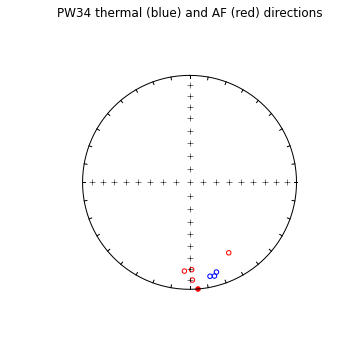

In [113]:
PW34_AFdata=pd.read_csv('../Data/Botswana_AF/PW34/pmag_specimens.txt',
                        sep='\t',header=1)
PW34_AFtc = PW34_AFdata[PW34_AFdata['specimen_tilt_correction'] == 100]
PW34_AFtc.reset_index(drop=True, inplace=True)

PW34_AFtc_dir=[]
for n in range(len(PW34_AFtc)):
    Dec,Inc=PW34_AFtc['specimen_dec'][n],PW34_AFtc['specimen_inc'][n]
    PW34_AFtc_dir.append([Dec,Inc,1.])
PW34_AFtc_mean=pmag.fisher_mean(PW34_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW34_AFtc_edit = PW34_AFtc
PW34_AFtc_edit = PW34_AFtc_edit.drop(3)
PW34_AFtc_edit = PW34_AFtc_edit.drop(4)
PW34_AFtc_edit = PW34_AFtc_edit.drop(5)
PW34_AFtc_edit.reset_index(drop=True, inplace=True)
PW34_AFtc_edit_dir=[]
for n in range(len(PW34_AFtc_edit)):
    Dec,Inc=PW34_AFtc_edit['specimen_dec'][n],PW34_AFtc_edit['specimen_inc'][n]
    PW34_AFtc_edit_dir.append([Dec,Inc,1.])
PW34_AFtc_edit_mean=pmag.fisher_mean(PW34_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW34_tc_edit_dir,color='blue')
IPmag.iplotDI(PW34_AFtc_edit_dir,color='red')
plt.title('PW34 thermal (blue) and AF (red) directions')
plt.show()

The AF results are consistent with the thermal results and contribute to an improved mean.

#### Masama 1 Sill combined mean

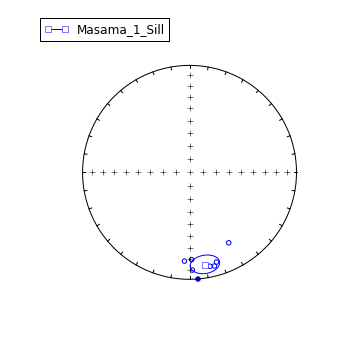

In [114]:
Masama_1_Sill=[]
Masama_1_Sill = PW34_tc_edit_dir + PW34_AFtc_edit_dir
Masama_1_Sill_mean=pmag.fisher_mean(Masama_1_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Masama_1_Sill,color='blue')
IPmag.iplotDImean(Masama_1_Sill_mean['dec'],Masama_1_Sill_mean['inc'],
                  Masama_1_Sill_mean["alpha95"],color='b',marker='s',
                  label='Masama_1_Sill')

In [115]:
Intrusion_mean_directions.loc['Masama_1_Sill'] = pd.Series({
        'Intrusion_name':'Masama_1_Sill','sites_used':'PW34_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][33], 
        'site_long':Site_Locations['LONG(WGS84)'][33],
        'n':int(Masama_1_Sill_mean['n']),
        'dec_tc':round(Masama_1_Sill_mean['dec'],1),
        'inc_tc':round(Masama_1_Sill_mean['inc'],1),
        'a_95':round(Masama_1_Sill_mean['alpha95'],1),
        'k':round(Masama_1_Sill_mean['k'],1),
        'dip_direction':10.4,'dip':8})
Intrusion_mean_directions.ix['Masama_1_Sill']

Intrusion_name    Masama_1_Sill
sites_used             PW34_ALL
site_lat              -23.81626
site_long              26.73769
n                             8
dec_tc                    170.5
inc_tc                    -13.6
a_95                        8.8
k                          40.3
date                        NaN
date_error                  NaN
dip_direction              10.4
dip                           8
Name: Masama_1_Sill, dtype: object

### Masama 3 Sill - PW35 and PW37

Only AF demagnetization was conducted on on samples from PW35. Both thermal and AF demagnetization were conducted on samples from PW37.

#### Thermal demag - PW37

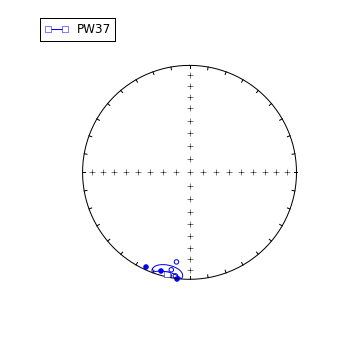

In [116]:
PW37_tc_dir=[]
for n in range(len(PW37_tc)):
    Dec,Inc=PW37_tc['specimen_dec'][n],PW37_tc['specimen_inc'][n]
    PW37_tc_dir.append([Dec,Inc,1.])
PW37_tc_mean=pmag.fisher_mean(PW37_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW37_tc_dir,color='b')
IPmag.iplotDImean(PW37_tc_mean['dec'],PW37_tc_mean['inc'],
                  PW37_tc_mean["alpha95"],color='b',marker='s',
                  label='PW37')

#### AF demag

##### PW35_AF

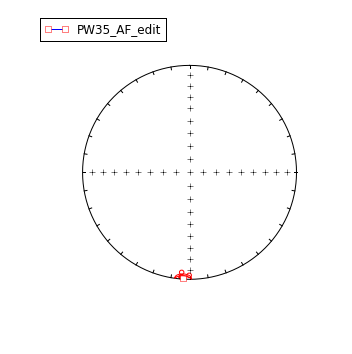

In [117]:
PW35_AFdata=pd.read_csv('../Data/Botswana_AF/PW35/pmag_specimens.txt',
                        sep='\t',header=1)
PW35_AFtc = PW35_AFdata[PW35_AFdata['specimen_tilt_correction'] == 100]
PW35_AFtc.reset_index(drop=True, inplace=True)

PW35_AFtc_dir=[]
for n in range(len(PW35_AFtc)):
    Dec,Inc=PW35_AFtc['specimen_dec'][n],PW35_AFtc['specimen_inc'][n]
    PW35_AFtc_dir.append([Dec,Inc,1.])
PW35_AFtc_mean=pmag.fisher_mean(PW35_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW35_AFtc_edit = PW35_AFtc
PW35_AFtc_edit.reset_index(drop=True, inplace=True)
PW35_AFtc_edit_dir=[]
for n in range(len(PW35_AFtc_edit)):
    Dec,Inc=PW35_AFtc_edit['specimen_dec'][n],PW35_AFtc_edit['specimen_inc'][n]
    PW35_AFtc_edit_dir.append([Dec,Inc,1.])
PW35_AFtc_edit_mean=pmag.fisher_mean(PW35_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW35_AFtc_edit_dir,color='red')
IPmag.iplotDImean(PW35_AFtc_edit_mean['dec'],PW35_AFtc_edit_mean['inc'],
                  PW35_AFtc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW35_AF_edit')

Excellent precision on the mean from these data.

##### PW37_AF

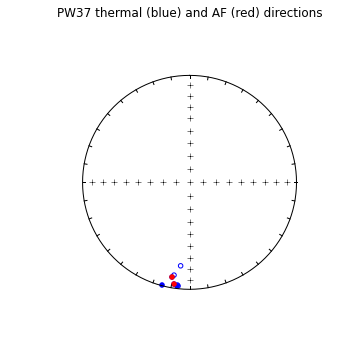

In [118]:
PW37_AFdata=pd.read_csv('../Data/Botswana_AF/PW37/pmag_specimens.txt',
                        sep='\t',header=1)
PW37_AFtc = PW37_AFdata[PW37_AFdata['specimen_tilt_correction'] == 100]
PW37_AFtc.reset_index(drop=True, inplace=True)

PW37_AFtc_dir=[]
for n in range(len(PW37_AFtc)):
    Dec,Inc=PW37_AFtc['specimen_dec'][n],PW37_AFtc['specimen_inc'][n]
    PW37_AFtc_dir.append([Dec,Inc,1.])
PW37_AFtc_mean=pmag.fisher_mean(PW37_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW37_AFtc_edit = PW37_AFtc
PW37_AFtc_edit = PW37_AFtc_edit.drop(1)
PW37_AFtc_edit = PW37_AFtc_edit.drop(2)
PW37_AFtc_edit = PW37_AFtc_edit.drop(3)
PW37_AFtc_edit = PW37_AFtc_edit.drop(4)
PW37_AFtc_edit = PW37_AFtc_edit.drop(5)
PW37_AFtc_edit = PW37_AFtc_edit.drop(6)
PW37_AFtc_edit.reset_index(drop=True, inplace=True)
PW37_AFtc_edit_dir=[]
for n in range(len(PW37_AFtc_edit)):
    Dec,Inc=PW37_AFtc_edit['specimen_dec'][n],PW37_AFtc_edit['specimen_inc'][n]
    PW37_AFtc_edit_dir.append([Dec,Inc,1.])
PW37_AFtc_edit_mean=pmag.fisher_mean(PW37_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW37_AFtc_dir,color='blue')
IPmag.iplotDI(PW37_AFtc_edit_dir,color='red')
plt.title('PW37 thermal (blue) and AF (red) directions')
plt.show()

Very consistent behavior in samples. Two AF specimen results that do not overlap with thermal specimens are added to the mean.

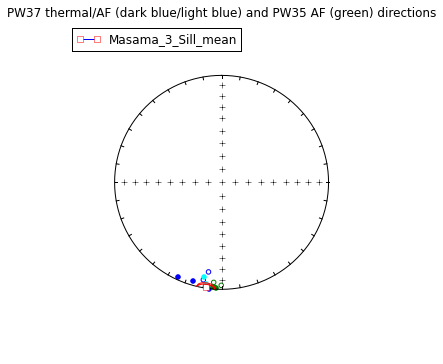

In [119]:
Masama_3_Sill=[]
Masama_3_Sill = PW37_tc_dir + PW37_AFtc_edit_dir + PW35_AFtc_edit_dir
Masama_3_Sill_mean=pmag.fisher_mean(Masama_3_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW37_tc_dir,color='blue')
IPmag.iplotDI(PW37_AFtc_edit_dir,color='cyan')
IPmag.iplotDI(PW35_AFtc_edit_dir,color='green')
IPmag.iplotDImean(Masama_3_Sill_mean['dec'],Masama_3_Sill_mean['inc'],
                  Masama_3_Sill_mean["alpha95"],color='r',marker='s',
                  label='Masama_3_Sill_mean')
plt.title('PW37 thermal/AF (dark blue/light blue) and PW35 AF (green) directions')
plt.show()

In [120]:
Intrusion_mean_directions.loc['Masama_3_Sill'] = pd.Series({
        'Intrusion_name':'Masama_3_Sill','sites_used':'PW35_AF and PW37_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][34], 
        'site_long':Site_Locations['LONG(WGS84)'][34],
        'n':int(Masama_3_Sill_mean['n']),
        'dec_tc':round(Masama_3_Sill_mean['dec'],1),
        'inc_tc':round(Masama_3_Sill_mean['inc'],1),
        'a_95':round(Masama_3_Sill_mean['alpha95'],1),
        'k':round(Masama_3_Sill_mean['k'],1),
        'dip_direction':10.4,'dip':8})
Intrusion_mean_directions.ix['Masama_3_Sill']

Intrusion_name           Masama_3_Sill
sites_used        PW35_AF and PW37_ALL
site_lat                     -23.81403
site_long                     26.73541
n                                   13
dec_tc                           188.5
inc_tc                            -0.7
a_95                               4.8
k                                 75.4
date                               NaN
date_error                         NaN
dip_direction                     10.4
dip                                  8
Name: Masama_3_Sill, dtype: object

### Masama 2 Sill - PW36

#### Thermal demag

Very well behaved samples that are consistent with each other and an Umkondo direction.

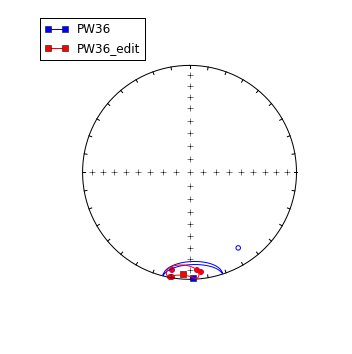

In [121]:
PW36_tc_dir=[]
for n in range(len(PW36_tc)):
    Dec,Inc=PW36_tc['specimen_dec'][n],PW36_tc['specimen_inc'][n]
    PW36_tc_dir.append([Dec,Inc,1.])
PW36_tc_mean=pmag.fisher_mean(PW36_tc_dir)

PW36_tc_edit = PW36_tc
PW36_tc_edit = PW36_tc_edit.drop(5)
PW36_tc_edit.reset_index(inplace=True)

PW36_tc_edit_dir=[]
for n in range(len(PW36_tc_edit)):
    Dec,Inc=PW36_tc_edit['specimen_dec'][n],PW36_tc_edit['specimen_inc'][n]
    PW36_tc_edit_dir.append([Dec,Inc,1.])
PW36_tc_edit_mean=pmag.fisher_mean(PW36_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW36_tc_dir,color='b')
IPmag.iplotDImean(PW36_tc_mean['dec'],PW36_tc_mean['inc'],
                   PW36_tc_mean["alpha95"],color='b',marker='s',
                   label='PW36')
IPmag.iplotDI(PW36_tc_edit_dir,color='r')
IPmag.iplotDImean(PW36_tc_edit_mean['dec'],PW36_tc_edit_mean['inc'],
                   PW36_tc_edit_mean["alpha95"],color='r',marker='s',
                   label='PW36_edit')

One outlier that is farther away from the rest is pruned from the data. Demag shows this sample beginning to arc towards the mean at high temperatures but goes unstable before it reaches.

#### AF demag

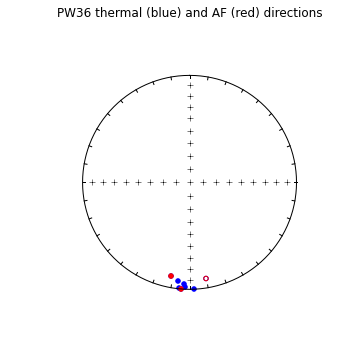

In [122]:
PW36_AFdata=pd.read_csv('../Data/Botswana_AF/PW36/pmag_specimens.txt',
                        sep='\t',header=1)
PW36_AFtc = PW36_AFdata[PW36_AFdata['specimen_tilt_correction'] == 100]
PW36_AFtc.reset_index(drop=True, inplace=True)

PW36_AFtc_dir=[]
for n in range(len(PW36_AFtc)):
    Dec,Inc=PW36_AFtc['specimen_dec'][n],PW36_AFtc['specimen_inc'][n]
    PW36_AFtc_dir.append([Dec,Inc,1.])
PW36_AFtc_mean=pmag.fisher_mean(PW36_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW36_AFtc_edit = PW36_AFtc
PW36_AFtc_edit = PW36_AFtc_edit.drop(0)
PW36_AFtc_edit = PW36_AFtc_edit.drop(3)
PW36_AFtc_edit = PW36_AFtc_edit.drop(4)
PW36_AFtc_edit = PW36_AFtc_edit.drop(5)
PW36_AFtc_edit = PW36_AFtc_edit.drop(6)
PW36_AFtc_edit.reset_index(drop=True, inplace=True)
PW36_AFtc_edit_dir=[]
for n in range(len(PW36_AFtc_edit)):
    Dec,Inc=PW36_AFtc_edit['specimen_dec'][n],PW36_AFtc_edit['specimen_inc'][n]
    PW36_AFtc_edit_dir.append([Dec,Inc,1.])
PW36_AFtc_edit_mean=pmag.fisher_mean(PW36_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW36_AFtc_dir,color='blue')
IPmag.iplotDI(PW36_AFtc_edit_dir,color='red')
plt.title('PW36 thermal (blue) and AF (red) directions')
plt.show()

Three AF specimens (red) that do not are not redundant with the included thermal specimens are included in the intrusion mean direction.

#### Masama 2 Sill combined mean

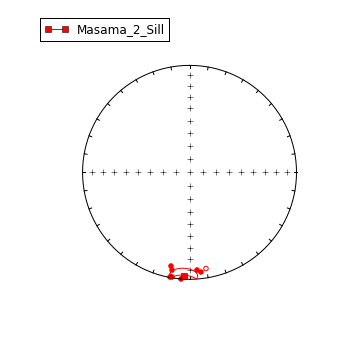

In [123]:
Masama_2_Sill=[]
Masama_2_Sill = PW36_tc_edit_dir + PW36_AFtc_edit_dir
Masama_2_Sill_mean=pmag.fisher_mean(Masama_2_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Masama_2_Sill,color='red')
IPmag.iplotDImean(Masama_2_Sill_mean['dec'],Masama_2_Sill_mean['inc'],
                  Masama_2_Sill_mean["alpha95"],color='r',marker='s',
                  label='Masama_2_Sill')

In [124]:
Intrusion_mean_directions.loc['Masama_2_Sill'] = pd.Series({
        'Intrusion_name':'Masama_2_Sill','sites_used':'PW36_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][35], 
        'site_long':Site_Locations['LONG(WGS84)'][35],
        'n':int(Masama_2_Sill_mean['n']),
        'dec_tc':round(Masama_2_Sill_mean['dec'],1),
        'inc_tc':round(Masama_2_Sill_mean['inc'],1),
        'a_95':round(Masama_2_Sill_mean['alpha95'],1),
        'k':round(Masama_2_Sill_mean['k'],1),
        'dip_direction':10.4,'dip':8}) 
Intrusion_mean_directions.ix['Masama_2_Sill']

Intrusion_name    Masama_2_Sill
sites_used             PW36_ALL
site_lat              -23.81453
site_long              26.73503
n                             8
dec_tc                    183.2
inc_tc                      3.5
a_95                        7.7
k                          53.1
date                        NaN
date_error                  NaN
dip_direction              10.4
dip                           8
Name: Masama_2_Sill, dtype: object

### Dibete Kop Sill - PW38

#### Thermal demag

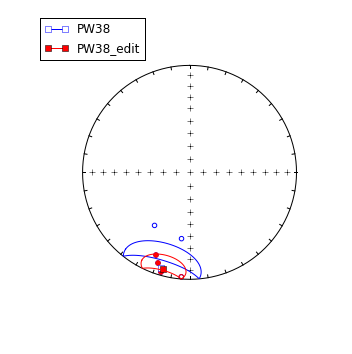

In [125]:
PW38_tc_dir=[]
for n in range(len(PW38_tc)):
    Dec,Inc=PW38_tc['specimen_dec'][n],PW38_tc['specimen_inc'][n]
    PW38_tc_dir.append([Dec,Inc,1.])
PW38_tc_mean=pmag.fisher_mean(PW38_tc_dir)

PW38_tc_edit = PW38_tc
PW38_tc_edit = PW38_tc_edit.drop(0)
PW38_tc_edit = PW38_tc_edit.drop(1)
PW38_tc_edit.reset_index(inplace=True)

PW38_tc_edit_dir=[]
for n in range(len(PW38_tc_edit)):
    Dec,Inc=PW38_tc_edit['specimen_dec'][n],PW38_tc_edit['specimen_inc'][n]
    PW38_tc_edit_dir.append([Dec,Inc,1.])
PW38_tc_edit_mean=pmag.fisher_mean(PW38_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW38_tc_dir,color='b')
IPmag.iplotDImean(PW38_tc_mean['dec'],PW38_tc_mean['inc'],
                  PW38_tc_mean["alpha95"],color='b',marker='s',
                  label='PW38')
IPmag.iplotDI(PW38_tc_edit_dir,color='r')
IPmag.iplotDImean(PW38_tc_edit_mean['dec'],PW38_tc_edit_mean['inc'],
                  PW38_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW38_edit')

Two samples with steeper inclinations are considered outliers and are excluded - they had slightly higher intensities, perhaps due to lightning.

#### AF demag

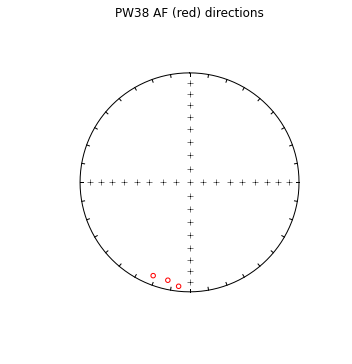

In [126]:
PW38_AFdata=pd.read_csv('../Data/Botswana_AF/PW38/pmag_specimens.txt',
                        sep='\t',header=1)
PW38_AFtc = PW38_AFdata[PW38_AFdata['specimen_tilt_correction'] == 100]
PW38_AFtc.reset_index(drop=True, inplace=True)

PW38_AFtc_dir=[]
for n in range(len(PW38_AFtc)):
    Dec,Inc=PW38_AFtc['specimen_dec'][n],PW38_AFtc['specimen_inc'][n]
    PW38_AFtc_dir.append([Dec,Inc,1.])
PW38_AFtc_mean=pmag.fisher_mean(PW38_AFtc_dir)
#drop redundant specimens from the sam samples
PW38_AFtc_edit = PW38_AFtc
PW38_AFtc_edit = PW38_AFtc_edit.drop(2)
PW38_AFtc_edit = PW38_AFtc_edit.drop(3)
PW38_AFtc_edit = PW38_AFtc_edit.drop(4)
PW38_AFtc_edit = PW38_AFtc_edit.drop(5)
#drop outlying specimen
PW38_AFtc_edit = PW38_AFtc_edit.drop(7)
PW38_AFtc_edit.reset_index(inplace=True)
PW38_AFtc_edit_dir=[]
for n in range(len(PW38_AFtc_edit)):
    Dec,Inc=PW38_AFtc_edit['specimen_dec'][n],PW38_AFtc_edit['specimen_inc'][n]
    PW38_AFtc_edit_dir.append([Dec,Inc,1.])
PW38_AFtc_edit_mean=pmag.fisher_mean(PW38_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW38_AFtc_edit_dir,color='red')
plt.title('PW38 AF (red) directions')
plt.show()

Data from unique AF samples are combined with the thermal samples for the mean.

#### Dibete Kop Sill - PW38_ALL

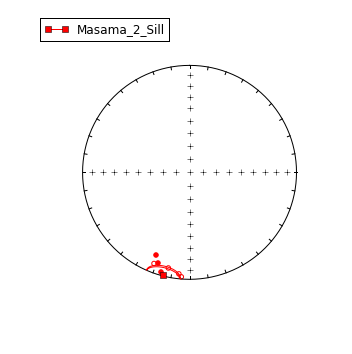

In [127]:
Dibete_Kop_Sill=[]
Dibete_Kop_Sill = PW38_tc_edit_dir + PW38_AFtc_edit_dir
Dibete_Kop_Sill_mean=pmag.fisher_mean(Dibete_Kop_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Dibete_Kop_Sill,color='red')
IPmag.iplotDImean(Dibete_Kop_Sill_mean['dec'],Dibete_Kop_Sill_mean['inc'],
                  Dibete_Kop_Sill_mean["alpha95"],color='r',marker='s',
                  label='Masama_2_Sill')

This mean is added to the compilation of Umkondo results.

In [128]:
Intrusion_mean_directions.loc['Dibete_Kop_Sill'] = pd.Series({
        'Intrusion_name':'Dibete_Kop_Sill','sites_used':'PW38_ALL',
        'site_lat':Site_Locations['LAT(WGS84)'][37], 
        'site_long':Site_Locations['LONG(WGS84)'][37],
        'n':int(Dibete_Kop_Sill_mean['n']),
        'dec_tc':round(Dibete_Kop_Sill_mean['dec'],1),
        'inc_tc':round(Dibete_Kop_Sill_mean['inc'],1),
        'a_95':round(Dibete_Kop_Sill_mean['alpha95'],1),
        'k':round(Dibete_Kop_Sill_mean['k'],1),
        'dip_direction':0,'dip':0}) 
Intrusion_mean_directions.ix['Dibete_Kop_Sill']

Intrusion_name    Dibete_Kop_Sill
sites_used               PW38_ALL
site_lat                -23.78171
site_long                26.56308
n                               7
dec_tc                      194.4
inc_tc                        0.8
a_95                          9.4
k                            42.4
date                          NaN
date_error                    NaN
dip_direction                   0
dip                             0
Name: Dibete_Kop_Sill, dtype: object

### Marseilles Hill Sill - PW39

#### Thermal demag

Consistent bahavior but appears to be close to the Paleoproterozoic direction described in Gose et al. (2006).

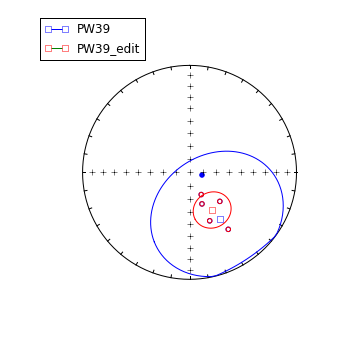

In [129]:
PW39_tc_dir=[]
for n in range(len(PW39_tc)):
    Dec,Inc=PW39_tc['specimen_dec'][n],PW39_tc['specimen_inc'][n]
    PW39_tc_dir.append([Dec,Inc,1.])
PW39_tc_mean=pmag.fisher_mean(PW39_tc_dir)

PW39_tc_edit = PW39_tc
PW39_tc_edit = PW39_tc_edit.drop(4)
PW39_tc_edit.reset_index(inplace=True)

PW39_tc_edit_dir=[]
for n in range(len(PW39_tc_edit)):
    Dec,Inc=PW39_tc_edit['specimen_dec'][n],PW39_tc_edit['specimen_inc'][n]
    PW39_tc_edit_dir.append([Dec,Inc,1.])
PW39_tc_edit_mean=pmag.fisher_mean(PW39_tc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW39_tc_dir,color='b')
IPmag.iplotDImean(PW39_tc_mean['dec'],PW39_tc_mean['inc'],
                  PW39_tc_mean["alpha95"],color='b',marker='s',
                  label='PW39')
IPmag.iplotDI(PW39_tc_edit_dir,color='r')
IPmag.iplotDImean(PW39_tc_edit_mean['dec'],PW39_tc_edit_mean['inc'],
                  PW39_tc_edit_mean["alpha95"],color='r',marker='s',
                  label='PW39_edit')

There is good agreement between samples with the exception of one point which is considered an outlier.

#### AF demag

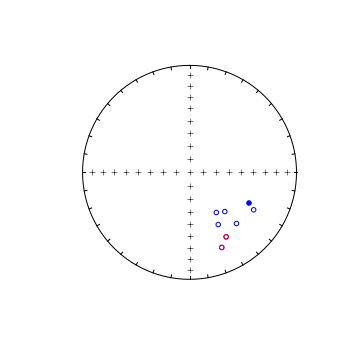

In [130]:
PW39_AFdata=pd.read_csv('../Data/Botswana_AF/PW39/pmag_specimens.txt',
                        sep='\t',header=1)
PW39_AFtc = PW39_AFdata[PW39_AFdata['specimen_tilt_correction'] == 100]
PW39_AFtc.reset_index(drop=True, inplace=True)

PW39_AFtc_dir=[]
for n in range(len(PW39_AFtc)):
    Dec,Inc=PW39_AFtc['specimen_dec'][n],PW39_AFtc['specimen_inc'][n]
    PW39_AFtc_dir.append([Dec,Inc,1.])
PW39_AFtc_mean=pmag.fisher_mean(PW39_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW39_AFtc_edit = PW39_AFtc
PW39_AFtc_edit = PW39_AFtc_edit.drop(2)
PW39_AFtc_edit = PW39_AFtc_edit.drop(3)
PW39_AFtc_edit = PW39_AFtc_edit.drop(4)
PW39_AFtc_edit = PW39_AFtc_edit.drop(5)
PW39_AFtc_edit = PW39_AFtc_edit.drop(7)
#drop an additional sample far from the mean grouping
PW39_AFtc_edit = PW39_AFtc_edit.drop(6)
PW39_AFtc_edit.reset_index(drop=True, inplace=True)
PW39_AFtc_edit_dir=[]
for n in range(len(PW39_AFtc_edit)):
    Dec,Inc=PW39_AFtc_edit['specimen_dec'][n],PW39_AFtc_edit['specimen_inc'][n]
    PW39_AFtc_edit_dir.append([Dec,Inc,1.])
PW39_AFtc_edit_mean=pmag.fisher_mean(PW39_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW39_AFtc_dir,color='blue')
IPmag.iplotDI(PW39_AFtc_edit_dir,color='red')
plt.show()

####Marseilles Hill Sill - PW39_ALL

There is good agreement between AF and thermal demagnetization data. The mean direction is far from Umkondo, leading us to believe that this sill is not part of the Umkondo LIP.

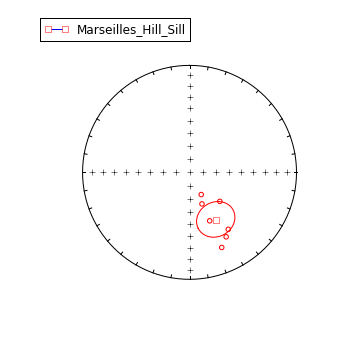

In [131]:
Marseilles_Hill_Sill=[]
Marseilles_Hill_Sill = PW39_tc_edit_dir + PW39_AFtc_edit_dir
Marseilles_Hill_Sill_mean=pmag.fisher_mean(Marseilles_Hill_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Marseilles_Hill_Sill,color='red')
IPmag.iplotDImean(Marseilles_Hill_Sill_mean['dec'],
                  Marseilles_Hill_Sill_mean['inc'],
                  Marseilles_Hill_Sill_mean["alpha95"],color='r',
                  marker='s',label='Marseilles_Hill_Sill')

Not added to the Umkondo compilation because this intrusion is likely older in age (added to unknown and older intrusion table).

In [132]:
unknown_intrusions.loc['Marseilles_Hill_Sill'] = pd.Series({'site_ID':
                    'PW39_ALL', 
                    'site_lat':Site_Locations['LAT(WGS84)'][38],
                    'site_long':Site_Locations['LAT(WGS84)'][38],
                    'n':Marseilles_Hill_Sill_mean['n'],
                    'dec_tc':round(Marseilles_Hill_Sill_mean['dec'],1),
                    'inc_tc':round(Marseilles_Hill_Sill_mean['inc'],1),
                    'a_95':round(Marseilles_Hill_Sill_mean['alpha95'],1),
                    'k':round(Marseilles_Hill_Sill_mean['k'],1)})

### Sepitswane Sill - PW40

#### Thermal demag

Great sample behavior and consistency. However, based on the direction this is likely not an Umkondo sill, but probably an older sill as described in Gose et al. (2006).

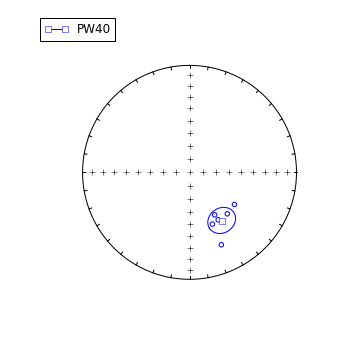

In [133]:
PW40_tc_dir=[]
for n in range(len(PW38_tc)):
    Dec,Inc=PW40_tc['specimen_dec'][n],PW40_tc['specimen_inc'][n]
    PW40_tc_dir.append([Dec,Inc,1.])
PW40_tc_mean=pmag.fisher_mean(PW40_tc_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW40_tc_dir,color='b')
IPmag.iplotDImean(PW40_tc_mean['dec'],PW40_tc_mean['inc'],
                  PW40_tc_mean["alpha95"],color='b',marker='s',
                  label='PW40')

#### AF demag

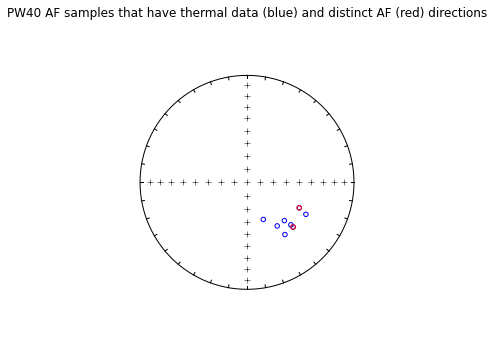

In [134]:
PW40_AFdata=pd.read_csv('../Data/Botswana_AF/PW40/pmag_specimens.txt',
                        sep='\t',header=1)
PW40_AFtc = PW40_AFdata[PW40_AFdata['specimen_tilt_correction'] == 100]
PW40_AFtc.reset_index(drop=True, inplace=True)

PW40_AFtc_dir=[]
for n in range(len(PW40_AFtc)):
    Dec,Inc=PW40_AFtc['specimen_dec'][n],PW40_AFtc['specimen_inc'][n]
    PW40_AFtc_dir.append([Dec,Inc,1.])
PW40_AFtc_mean=pmag.fisher_mean(PW40_AFtc_dir)

#Drop redundant specimens from same sample out of AF group.
PW40_AFtc_edit = PW40_AFtc
PW40_AFtc_edit = PW40_AFtc_edit.drop(0)
PW40_AFtc_edit = PW40_AFtc_edit.drop(1)
PW40_AFtc_edit = PW40_AFtc_edit.drop(4)
PW40_AFtc_edit = PW40_AFtc_edit.drop(5)
PW40_AFtc_edit = PW40_AFtc_edit.drop(6)
PW40_AFtc_edit = PW40_AFtc_edit.drop(7)
PW40_AFtc_edit.reset_index(drop=True, inplace=True)
PW40_AFtc_edit_dir=[]
for n in range(len(PW40_AFtc_edit)):
    Dec,Inc=PW40_AFtc_edit['specimen_dec'][n],PW40_AFtc_edit['specimen_inc'][n]
    PW40_AFtc_edit_dir.append([Dec,Inc,1.])
PW40_AFtc_edit_mean=pmag.fisher_mean(PW40_AFtc_edit_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW40_AFtc_dir,color='blue')
IPmag.iplotDI(PW40_AFtc_edit_dir,color='red')
plt.title('PW40 AF samples that have thermal data (blue) and distinct AF (red) directions')
plt.show()

The two specimens that are not redundant are well within the thermal mean grouping. It is very likely that this (like PW39) is an older intrusion unrelated to the Umkondo LIP.

####Sepitswane Sill mean - PW40

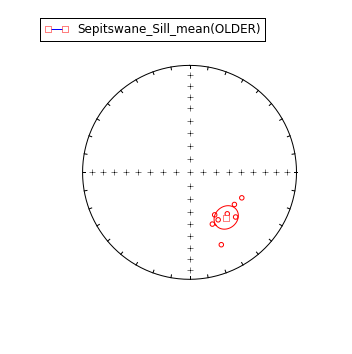

In [135]:
Sepitswane_Sill=[]
Sepitswane_Sill = PW40_tc_dir + PW40_AFtc_edit_dir
Sepitswane_Sill_mean=pmag.fisher_mean(Sepitswane_Sill)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Sepitswane_Sill,color='red')
IPmag.iplotDImean(Sepitswane_Sill_mean['dec'],
                  Sepitswane_Sill_mean['inc'],
                  Sepitswane_Sill_mean["alpha95"],color='r',
                  marker='s',label='Sepitswane_Sill_mean(OLDER)')

Not added to table because of its similarity to older paleomagnetic directions (but added to the unknown and older intrusion table).

In [136]:
unknown_intrusions.loc['Sepitswane_Sill'] = pd.Series({'site_ID':
                    'PW40_ALL', 
                    'site_lat':Site_Locations['LAT(WGS84)'][39],
                    'site_long':Site_Locations['LAT(WGS84)'][39],
                    'n':Sepitswane_Sill_mean['n'],
                    'dec_tc':round(Sepitswane_Sill_mean['dec'],1),
                    'inc_tc':round(Sepitswane_Sill_mean['inc'],1),
                    'a_95':round(Sepitswane_Sill_mean['alpha95'],1),
                    'k':round(Sepitswane_Sill_mean['k'],1)})

## Botswana Umkondo summary (Thermal/AF demagnetization results combined with existing data from the same intrusions)

Plot up all of the results together and then build another dataframe with data in pole space.

In [137]:
# Calculate/Add VGP information
Intrusions_newBot_VGPs_rnd=Intrusion_mean_directions
IPmag.VGP_calc(Intrusions_newBot_VGPs_rnd)
# Changing two labels to be the same as in the "Published Data Compilation"
Intrusions_newBot_VGPs_rnd=Intrusions_newBot_VGPs_rnd.rename(columns=
                                                             {'sites_used':
                                                              'site_ID'})
Intrusions_newBot_VGPs_rnd=Intrusions_newBot_VGPs_rnd.drop('Intrusion_name',1)
Intrusions_newBot_VGPs_rnd

,site_ID,site_lat,site_long,n,dec_tc,inc_tc,a_95,k,date,date_error,dip_direction,dip,paleolatitude,pole_lat,pole_long,pole_lat_rev,pole_long_rev
Kgale_Peak_Sill,PW1_ALL and PW2_AF,-24.68781,25.86215,12,189.9,0.4,6.3,48.8,1108.0,0.9,224.6,6,0.200002,-63.704336,228.698260,63.704336,48.698260
Rasemong_Sill,PW5_ALL,-24.72715,25.77590,8,14.4,-18.6,8.1,48.0,NaN,NaN,0.0,0,-9.551602,69.551678,70.361232,-69.551678,250.361232
Metsemotlhaba_River_Sill,PW6_ALL,-24.54694,25.80892,7,180.6,-2.7,14.4,18.5,NaN,NaN,0.0,0,-1.350750,-64.095770,207.182057,64.095770,27.182057
Mabogoapitse_Hill_Sill,PW7_ALL and PW8_AF,-24.47402,25.59705,9,184.6,5.1,9.1,33.2,NaN,NaN,0.0,0,2.555061,-67.635806,217.752636,67.635806,37.752636
Semarule_Hill_Sill,PW9_ALL,-24.45268,25.57415,5,186.8,3.8,9.1,72.2,NaN,NaN,0.0,0,1.902092,-66.511673,222.846498,66.511673,42.846498
Rapitsane_Sill,PW10_ALL,-24.41968,25.58463,8,197.7,-0.2,8.5,43.3,NaN,NaN,330.0,7,-0.100000,-60.079133,243.139714,60.079133,63.139714
Suping_Sill,PW11_ALL and JP15,-24.32765,25.53224,16,187.2,-9.2,8.4,20.2,NaN,NaN,281.2,10,-4.629842,-60.205998,220.093548,60.205998,40.093548
Mogatelwane 2 Sill,PW15_ALL,-24.18042,25.69191,6,193.5,-2.8,14.7,21.6,NaN,NaN,260.3,4,-1.400836,-61.255812,234.723345,61.255812,54.723345
Mosolotsane_1_Sill,"PW21_AF, PW22_ALL, and JP(22,23,24)",-22.90699,26.38929,27,186.1,-5.6,4.6,36.9,1109.3,0.6,262.9,10,-2.806703,-63.606743,220.202745,63.606743,40.202745
Mosolotsane_5_Sill,PW23_ALL,-22.90330,26.37027,7,188.5,-7.9,14.2,19.1,NaN,NaN,262.9,10,-3.968863,-61.875250,224.598738,61.875250,44.598738


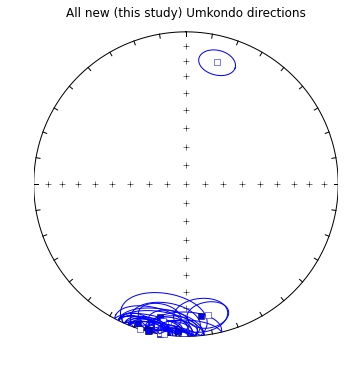

In [138]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
for n in range(len(Intrusion_mean_directions)):
    IPmag.iplotDImean(Intrusion_mean_directions['dec_tc'][n],
                      Intrusion_mean_directions['inc_tc'][n],
                      Intrusion_mean_directions['a_95'][n],
                      color='b',marker='s',label='')
plt.title('All new (this study) Umkondo directions')
plt.show()

## Low Temperature Magnetizations from New Umkondo Sites

A summary of the low-temperature components found in specimens that had more than one component. There is no real consistency between sites, but some sites have an internally consistent low temperature overprint. Our interpretation is that the low temperature components from the intrusions in Botswana can be attributed to viscous remanent magnetizations, with no paleomagnetic significance.

In [139]:
#The sites that are *not* loaded into this dataset contained only...
#...single-component remanences discussed earlier in this notebook
#PW1L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW1/pmag_specimens.txt',sep='\t',header=1)
PW3L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW3/pmag_specimens.txt',sep='\t',header=1)
PW4L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW4/pmag_specimens.txt',sep='\t',header=1)
PW5L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW5/pmag_specimens.txt',sep='\t',header=1)
PW6L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW6/pmag_specimens.txt',sep='\t',header=1)
PW7L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW7/pmag_specimens.txt',sep='\t',header=1)
PW9L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW9/pmag_specimens.txt',sep='\t',header=1)
PW10L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW10/pmag_specimens.txt',sep='\t',header=1)
PW11L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW11/pmag_specimens.txt',sep='\t',header=1)
PW13L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW13/pmag_specimens.txt',sep='\t',header=1)
PW15L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW15/pmag_specimens.txt',sep='\t',header=1)
PW18L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW18/pmag_specimens.txt',sep='\t',header=1)
PW19L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW19/pmag_specimens.txt',sep='\t',header=1)
PW20L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW20/pmag_specimens.txt',sep='\t',header=1)
#PW22L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW22/pmag_specimens.txt',sep='\t',header=1)
PW23L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW23/pmag_specimens.txt',sep='\t',header=1)
PW24L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW24/pmag_specimens.txt',sep='\t',header=1)
PW25L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW25/pmag_specimens.txt',sep='\t',header=1)
PW26L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW26/pmag_specimens.txt',sep='\t',header=1)
PW27L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW27/pmag_specimens.txt',sep='\t',header=1)
PW28L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW28/pmag_specimens.txt',sep='\t',header=1)
PW29L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW29/pmag_specimens.txt',sep='\t',header=1)
#PW30L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW30/pmag_specimens.txt',sep='\t',header=1)
PW31L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW31/pmag_specimens.txt',sep='\t',header=1)
PW32L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW32/pmag_specimens.txt',sep='\t',header=1)
PW34L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW34/pmag_specimens.txt',sep='\t',header=1)
PW36L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW36/pmag_specimens.txt',sep='\t',header=1)
PW37L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW37/pmag_specimens.txt',sep='\t',header=1)
PW38L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW38/pmag_specimens.txt',sep='\t',header=1)
PW39L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW39/pmag_specimens.txt',sep='\t',header=1)
PW40L_data=pd.read_csv('../Data/Botswana_thermal/Botswana_data_LT/PW40/pmag_specimens.txt',sep='\t',header=1)

PW_ALL_LT=pd.tools.merge.concat([PW3L_data,PW4L_data,PW5L_data,PW6L_data,
                                 PW7L_data,PW9L_data,PW10L_data,PW11L_data,
                                 PW13L_data,PW15L_data,PW18L_data,PW19L_data,
                                 PW20L_data,PW23L_data,PW24L_data,PW25L_data,
                                 PW26L_data,PW27L_data,PW28L_data,PW29L_data,
                                 PW31L_data,PW32L_data,PW34L_data,PW36L_data,
                                 PW37L_data,PW38L_data,PW39L_data,PW40L_data],
                                axis=0)
PW_ALL_LT_tc= PW_ALL_LT[PW_ALL_LT['specimen_tilt_correction'] == 100]
PW_ALL_LT_tc.reset_index(inplace=True, drop=True)
PW_ALL_LT_geo=PW_ALL_LT[PW_ALL_LT['specimen_tilt_correction'] == 0]
PW_ALL_LT_geo.reset_index(inplace=True, drop=True)

We will plot the Karoo LIP pole from Hargraves (1997) with the low temperature magnetizations from our new Botswana sites to see if their directions are similar.

> Virtual geomagnetic poles have been derived from over 2000 samples from 691 sites in Karoo igneous rocks, ranging from basalts and dolerites through rhyolites, and at localities spread from Namibia through the central Karoo basin, Lesotho to the Lebombo. After appropriate analysis, poles derived from Lesotho lavas, Karoo dolerite dykes and sills, Sabie River basalts, Mashikiri and Letaba lavas, and Jozini rhyolites, when averaged, yielded a palaeomagnetic (south) pole at: N = 6, latitude = -69.2, longitude = 98.3, alpha = 3.3. (Hargraves, 1997)

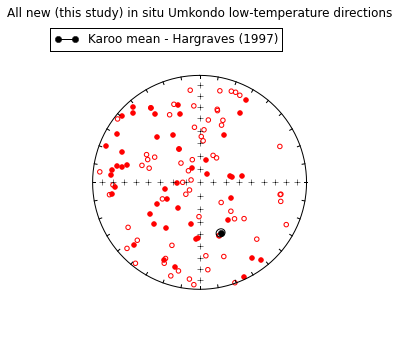

In [140]:
PW_ALL_LT_tc_dir = []
PW_ALL_LT_geo_dir = []
for n in range(len(PW_ALL_LT_tc)):
    Dec,Inc=PW_ALL_LT_tc['specimen_dec'][n],PW_ALL_LT_tc['specimen_inc'][n]
    PW_ALL_LT_tc_dir.append([Dec,Inc,1.])
PW_ALL_LT_tc_mean=pmag.fisher_mean(PW_ALL_LT_tc_dir)
for n in range(len(PW_ALL_LT_geo)):
    Dec,Inc=PW_ALL_LT_geo['specimen_dec'][n],PW_ALL_LT_geo['specimen_inc'][n]
    PW_ALL_LT_geo_dir.append([Dec,Inc,1.])
PW_ALL_LT_geo_mean=pmag.fisher_mean(PW_ALL_LT_geo_dir)

fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW_ALL_LT_geo_dir,color='red')
#Karoo mean from Hargraves (1997)
IPmag.iplotDImean(157.4,47.6,3.2,color='k',label=
                  'Karoo mean - Hargraves (1997)') 
plt.title('All new (this study) in situ Umkondo low-temperature directions')
plt.show()

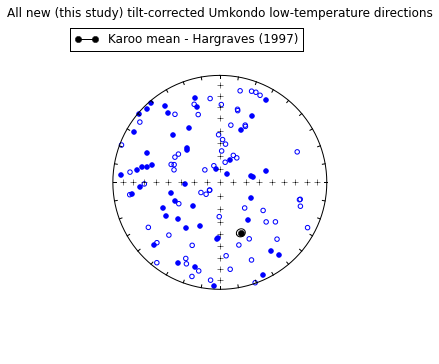

In [141]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(PW_ALL_LT_tc_dir,color='blue')
#Karoo mean from Hargraves (1997)
IPmag.iplotDImean(157.4,47.6,3.2,color='k',label=
                  'Karoo mean - Hargraves (1997)') 
#blue data points are tilt corrected...many sites had no tilting to correct
plt.title('All new (this study) tilt-corrected Umkondo low-temperature directions')
plt.show()

There is little in the way of consistency in the low-temperature overprints between the studied sites. Given the small tilt little difference between the geographic and tilt corrected results for the low-temperature overprints.

Maybe some of the overprints are associated with Karoo magmatism or older overprinting events, but there there is little consistency across the sites and there are few directions similar to the Karoo (~180 Ma) magnetization mean. We note here that Seidel (2004) conducted a positive baked-contact test for a Karoo dike into the Timbavati gabbro (TG-01). This supports the fact that the Umkondo magnetization is older than ~180 Ma. In general, the lack of consistency between the overprints suggests that their origin is due to lightning strikes or other processes such as wildfires both of which have significant impacts on the slowly evolving southern African landscape.

##Unknown and Older Directions (from Gose et al. (2006) and this study)

Below is a table of intrusions that are likely a different age than ~1.1 Ga. This includes intrusions that are estimated to be ~1.9 Ga (according to baddeleyite dates in Gose et al. (2006)): W03, JP9, WD28H, NB2, and JP11. If new paleomagnetic sites have similar directions to these sites it is likely that they belong to the older event.

In [142]:
IPmag.VGP_calc(unknown_intrusions)
unknown_intrusions

,site_ID,site_lat,site_long,n,dec_tc,inc_tc,a_95,k,date,date_error,paleolatitude,pole_lat,pole_long,pole_lat_rev,pole_long_rev
W03,W03,-25.70000,29.41000,6,271.2,83.70,13.1,27.1,NaN,NaN,77.548756,-24.796123,15.673721,24.796123,195.673721
JP9,NaN,-24.96000,25.25000,5,334.2,23.18,6.6,134.4,NaN,NaN,12.084239,45.218799,348.079984,-45.218799,168.079984
JP11,NaN,-24.94000,25.30000,4,169.4,-27.76,12.7,53.1,NaN,NaN,-14.744434,-48.991236,189.569807,48.991236,9.569807
J_M_A1,J_M_A1,-24.93000,25.30000,4,329.5,8.50,5.9,244.0,NaN,NaN,4.273513,48.396981,335.634449,-48.396981,155.634449
WD28H,WD28H,-24.50000,27.56000,11,340.8,72.00,11.6,16.6,NaN,NaN,56.982602,6.922676,17.160338,-6.922676,197.160338
L-2,L-2,-25.60000,29.62000,11,6.9,49.10,1.8,636.4,NaN,NaN,29.994221,34.013851,36.831050,-34.013851,216.831050
NB2,NB2,-22.56000,30.86000,8,173.4,-53.70,13.6,17.6,NaN,NaN,-34.241847,-32.852415,204.365741,32.852415,24.365741
Mogatelwane_1_Sill,PW14_AF,-24.18075,25.68963,6,40.5,78.80,11.6,34.6,NaN,NaN,68.395906,-7.205706,39.636644,7.205706,219.636644
Marseilles_Hill_Sill,PW39_ALL,-23.96123,-23.96123,7,150.8,-48.00,14.0,19.6,NaN,NaN,-29.043688,-30.014754,126.529395,30.014754,306.529395
Sepitswane_Sill,PW40_ALL,-24.04815,-24.04815,8,140.9,-44.70,9.0,38.9,NaN,NaN,-26.325802,-27.030836,116.562458,27.030836,296.562458


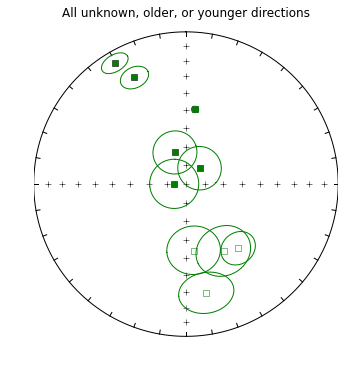

In [143]:
IPmag.VGP_calc(unknown_intrusions)
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
for n in range(len(unknown_intrusions)):
    IPmag.iplotDImean(unknown_intrusions['dec_tc'][n],
                      unknown_intrusions['inc_tc'][n],
                      unknown_intrusions['a_95'][n],
                      color='g',marker='s',label='')
plt.title('All unknown, older, or younger directions')
plt.show()

Above are site mean directions from intrusions that are likely of younger and older age than the Umkondo event. The Karoo magnetization is similar to the steep SE and down mean from PW18, if this is indeed the case then PW18 could be an Umkondo sill overprinted by the Karoo event. Other magnetizations that are steep NW and down (along with the antipodal SE and up site means) could be Paleoproterozoic in age. One of the intrusions, WD28(H) is dated at 1871.9 $\pm$ 1.2 Ma. 

# Umkondo synthesis and grand mean pole

In [144]:
Old_Data_ALL = pickle.load(open('../Data/Pickle/cooling_unit_means_edit','rb'))
Intrusions_newBot_VGPs_rnd

,site_ID,site_lat,site_long,n,dec_tc,inc_tc,a_95,k,date,date_error,dip_direction,dip,paleolatitude,pole_lat,pole_long,pole_lat_rev,pole_long_rev
Kgale_Peak_Sill,PW1_ALL and PW2_AF,-24.68781,25.86215,12,189.9,0.4,6.3,48.8,1108.0,0.9,224.6,6,0.200002,-63.704336,228.698260,63.704336,48.698260
Rasemong_Sill,PW5_ALL,-24.72715,25.77590,8,14.4,-18.6,8.1,48.0,NaN,NaN,0.0,0,-9.551602,69.551678,70.361232,-69.551678,250.361232
Metsemotlhaba_River_Sill,PW6_ALL,-24.54694,25.80892,7,180.6,-2.7,14.4,18.5,NaN,NaN,0.0,0,-1.350750,-64.095770,207.182057,64.095770,27.182057
Mabogoapitse_Hill_Sill,PW7_ALL and PW8_AF,-24.47402,25.59705,9,184.6,5.1,9.1,33.2,NaN,NaN,0.0,0,2.555061,-67.635806,217.752636,67.635806,37.752636
Semarule_Hill_Sill,PW9_ALL,-24.45268,25.57415,5,186.8,3.8,9.1,72.2,NaN,NaN,0.0,0,1.902092,-66.511673,222.846498,66.511673,42.846498
Rapitsane_Sill,PW10_ALL,-24.41968,25.58463,8,197.7,-0.2,8.5,43.3,NaN,NaN,330.0,7,-0.100000,-60.079133,243.139714,60.079133,63.139714
Suping_Sill,PW11_ALL and JP15,-24.32765,25.53224,16,187.2,-9.2,8.4,20.2,NaN,NaN,281.2,10,-4.629842,-60.205998,220.093548,60.205998,40.093548
Mogatelwane 2 Sill,PW15_ALL,-24.18042,25.69191,6,193.5,-2.8,14.7,21.6,NaN,NaN,260.3,4,-1.400836,-61.255812,234.723345,61.255812,54.723345
Mosolotsane_1_Sill,"PW21_AF, PW22_ALL, and JP(22,23,24)",-22.90699,26.38929,27,186.1,-5.6,4.6,36.9,1109.3,0.6,262.9,10,-2.806703,-63.606743,220.202745,63.606743,40.202745
Mosolotsane_5_Sill,PW23_ALL,-22.90330,26.37027,7,188.5,-7.9,14.2,19.1,NaN,NaN,262.9,10,-3.968863,-61.875250,224.598738,61.875250,44.598738


The means were all calculated using specimen data that had already been tilt-corrected. In order to present the uncorrected means, we untilt the means using the reversed of the tilt-correction (dip_direction, -dip).

In [145]:
dec_geo = []
inc_geo = []
for n in range(0,len(Intrusions_newBot_VGPs_rnd)):
    dec_g, inc_g = pmag.dotilt(Intrusions_newBot_VGPs_rnd['dec_tc'][n],
                               Intrusions_newBot_VGPs_rnd['inc_tc'][n],
                               Intrusions_newBot_VGPs_rnd['dip_direction'][n],
                               -Intrusions_newBot_VGPs_rnd['dip'][n])
    dec_geo.append(dec_g)
    inc_geo.append(inc_g)
dec_geo
inc_geo

Intrusions_newBot_VGPs_rnd.insert(4,'dec',dec_geo)
Intrusions_newBot_VGPs_rnd.insert(5,'inc',inc_geo)

Intrusions_newBot_VGPs_rnd.to_csv('../Data/Umkondo_Sites_new.csv')

In [146]:
All_Umk_VGPs = Intrusions_newBot_VGPs_rnd.append(Old_Data_ALL)
#Make table to use in publication with only necessary columns and rounded #s
All_Umk_pub_tbl = pd.DataFrame(data=All_Umk_VGPs)
All_Umk_pub_tbl=All_Umk_pub_tbl.rename(columns={'site_ID':'sites_used'})
All_Umk_pub_tbl=All_Umk_pub_tbl.drop('pole_lat_rev',1)
All_Umk_pub_tbl=All_Umk_pub_tbl.drop('pole_long_rev',1)
All_Umk_pub_tbl=All_Umk_pub_tbl.drop('paleolatitude',1)
All_Umk_pub_tbl['pole_lat']=np.round(All_Umk_pub_tbl['pole_lat'], 1)
All_Umk_pub_tbl['pole_long']=np.round(All_Umk_pub_tbl['pole_long'], 1)
All_Umk_pub_tbl['inc_tc']=np.round(All_Umk_pub_tbl['inc_tc'], 1)
All_Umk_pub_tbl.to_csv('../Data/Umkondo_Sites_all.csv')

In [147]:
Umk_latex = All_Umk_pub_tbl[['sites_used','site_lat','site_long','n','dec','inc','dec_tc','inc_tc','a_95','k','date','pole_lat','pole_long']]
Umk_latex.site_lat = Umk_latex.site_lat.round(3)
Umk_latex.site_long = Umk_latex.site_long.round(3)
Umk_latex.dec = Umk_latex.dec.round(1)
Umk_latex.inc = Umk_latex.inc.round(1)
print Umk_latex.to_latex()

\begin{tabular}{llrrlrrrrrrlrr}
\toprule
{} &                           sites\_used &  site\_lat &  site\_long &    n &    dec &   inc &  dec\_tc &  inc\_tc &  a\_95 &      k &    date &  pole\_lat &  pole\_long \\
\midrule
Kgale\_Peak\_Sill          &                   PW1\_ALL and PW2\_AF &   -24.688 &     25.862 &   12 &  189.7 &   5.3 &   189.9 &     0.4 &   6.3 &   48.8 &  1108.0 &     -63.7 &      228.7 \\
Rasemong\_Sill            &                              PW5\_ALL &   -24.727 &     25.776 &    8 &   14.4 & -18.6 &    14.4 &   -18.6 &   8.1 &   48.0 &     NaN &      69.6 &       70.4 \\
Metsemotlhaba\_River\_Sill &                              PW6\_ALL &   -24.547 &     25.809 &    7 &  180.6 &  -2.7 &   180.6 &    -2.7 &  14.4 &   18.5 &     NaN &     -64.1 &      207.2 \\
Mabogoapitse\_Hill\_Sill   &                   PW7\_ALL and PW8\_AF &   -24.474 &     25.597 &    9 &  184.6 &   5.1 &   184.6 &     5.1 &   9.1 &   33.2 &     NaN &     -67.6 &      217.8 \\
Semarule\_H

/Users/taylorkilian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [148]:
# a95 filter - 15 degrees
# created two dataframes applying this filter
Umk_VGPs_a95_filtered = All_Umk_VGPs.ix[All_Umk_VGPs['a_95']<15]
Umk_VGPs_high_a95 = All_Umk_VGPs.ix[All_Umk_VGPs['a_95']>15]

Umk_VGPs_a95_filtered.to_csv('../Data/Umkondo_Site_Means_a95_filtered.csv')
Umk_VGPs_a95_filtered

,a_95,date,date_error,dec,dec_tc,dip,dip_direction,inc,inc_tc,k,n,paleolatitude,pole_lat,pole_lat_rev,pole_long,pole_long_rev,site_ID,site_lat,site_long
Kgale_Peak_Sill,6.3,1108.0,0.9,189.728559,189.9,6,224.6,5.329220,0.40,48.8,12,0.200002,-63.704336,63.704336,228.698260,48.698260,PW1_ALL and PW2_AF,-24.68781,25.86215
Rasemong_Sill,8.1,NaN,NaN,14.400000,14.4,0,0.0,-18.600000,-18.60,48.0,8,-9.551602,69.551678,-69.551678,70.361232,250.361232,PW5_ALL,-24.72715,25.77590
Metsemotlhaba_River_Sill,14.4,NaN,NaN,180.600000,180.6,0,0.0,-2.700000,-2.70,18.5,7,-1.350750,-64.095770,64.095770,207.182057,27.182057,PW6_ALL,-24.54694,25.80892
Mabogoapitse_Hill_Sill,9.1,NaN,NaN,184.600000,184.6,0,0.0,5.100000,5.10,33.2,9,2.555061,-67.635806,67.635806,217.752636,37.752636,PW7_ALL and PW8_AF,-24.47402,25.59705
Semarule_Hill_Sill,9.1,NaN,NaN,186.800000,186.8,0,0.0,3.800000,3.80,72.2,5,1.902092,-66.511673,66.511673,222.846498,42.846498,PW9_ALL,-24.45268,25.57415
Rapitsane_Sill,8.5,NaN,NaN,197.931464,197.7,7,330.0,-4.903842,-0.20,43.3,8,-0.100000,-60.079133,60.079133,243.139714,63.139714,PW10_ALL,-24.41968,25.58463
Suping_Sill,8.4,NaN,NaN,188.871011,187.2,10,281.2,-9.753488,-9.20,20.2,16,-4.629842,-60.205998,60.205998,220.093548,40.093548,PW11_ALL and JP15,-24.32765,25.53224
Mogatelwane 2 Sill,14.7,NaN,NaN,193.629006,193.5,4,260.3,-1.219552,-2.80,21.6,6,-1.400836,-61.255812,61.255812,234.723345,54.723345,PW15_ALL,-24.18042,25.69191
Mosolotsane_1_Sill,4.6,1109.3,0.6,186.853869,186.1,10,262.9,-3.246794,-5.60,36.9,27,-2.806703,-63.606743,63.606743,220.202745,40.202745,"PW21_AF, PW22_ALL, and JP(22,23,24)",-22.90699,26.38929
Mosolotsane_5_Sill,14.2,NaN,NaN,189.598220,188.5,10,262.9,-5.111960,-7.90,19.1,7,-3.968863,-61.875250,61.875250,224.598738,44.598738,PW23_ALL,-22.90330,26.37027


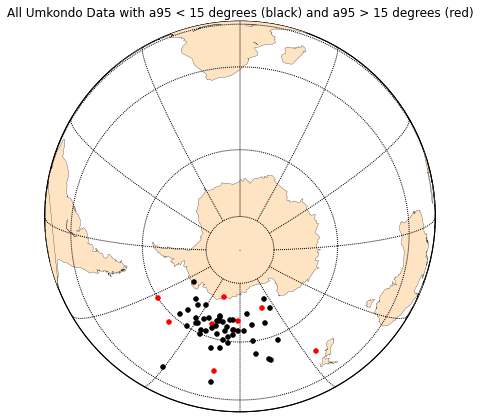

In [149]:
#create basemap for VGP plot
plt.figure(figsize=(7, 7))
m1 = Basemap(projection='ortho',lat_0=-80,lon_0=30,resolution='c',
             area_thresh=50000)
m1.drawcoastlines(linewidth=0.25)
m1.fillcontinents(color='bisque',lake_color='white',zorder=1)
m1.drawmapboundary(fill_color='white')
m1.drawmeridians(np.arange(0,360,30))
m1.drawparallels(np.arange(-90,90,30))

#reverse selected poles so all in same polarity - South-seeking
for n in range(len(Umk_VGPs_high_a95)):
    if All_Umk_VGPs['pole_lat'][n] < 0:
        IPmag.vgpplot(m1,Umk_VGPs_high_a95['pole_long'][n],
                      Umk_VGPs_high_a95['pole_lat'][n],
                      label=Umk_VGPs_high_a95.index[n],color='r')
    else: IPmag.vgpplot(m1,Umk_VGPs_high_a95['pole_long_rev'][n],
                        Umk_VGPs_high_a95['pole_lat_rev'][n],
                        label=All_Umk_VGPs.index[n],color='r')
for n in range(len(Umk_VGPs_a95_filtered)):
    if Umk_VGPs_a95_filtered['pole_lat'][n] < 0:
        IPmag.vgpplot(m1,Umk_VGPs_a95_filtered['pole_long'][n],
                      Umk_VGPs_a95_filtered['pole_lat'][n],
                      label=Umk_VGPs_a95_filtered.index[n])
    else: IPmag.vgpplot(m1,Umk_VGPs_a95_filtered['pole_long_rev'][n],
                        Umk_VGPs_a95_filtered['pole_lat_rev'][n],
                        label=Umk_VGPs_a95_filtered.index[n])

plt.title('All Umkondo Data with a95 < 15 degrees (black) and a95 > 15 degrees (red)')
plt.show()

## Polarity of VGPs

Here are the polarities of the VGPs considering them unfiltered by $\alpha_{95}$.

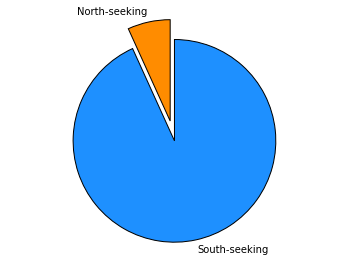

The total number of VGPs in the compilation is:
59
This many have north seeking declinations:
4
6.77966101695 percent of the total
This many have south seeking declinations:
55


In [150]:
labels = 'North-seeking', 'South-seeking'
sizes = [len(All_Umk_VGPs.ix[All_Umk_VGPs['pole_lat'] > 0])
         ,len(All_Umk_VGPs.ix[All_Umk_VGPs['pole_lat'] < 0])]
colors = ['darkorange','dodgerblue']
explode = (0.2, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=False,
        startangle=90)
plt.axis('equal')
plt.show()
print 'The total number of VGPs in the compilation is:'
print len(All_Umk_VGPs)
print 'This many have north seeking declinations:'
print len(All_Umk_VGPs.ix[All_Umk_VGPs['pole_lat'] > 0])
print str((4.0/59.0) * 100) + ' percent of the total'
print 'This many have south seeking declinations:'
print len(All_Umk_VGPs.ix[All_Umk_VGPs['pole_lat'] < 0])

###Calculating poles by polarity
Using the $\alpha_{95}$ filtered data, we can calculate a grand mean pole and then distinct poles grouped by polarity.

In [151]:
Umk_VGPs_a95_filtered_N = Umk_VGPs_a95_filtered.ix[Umk_VGPs_a95_filtered['pole_lat'] > 0]
Umk_VGPs_a95_filtered_S = Umk_VGPs_a95_filtered.ix[Umk_VGPs_a95_filtered['pole_lat'] < 0]

Umk_VGP_N_block = IPmag.make_di_block(Umk_VGPs_a95_filtered_N['pole_long_rev'],
                                     Umk_VGPs_a95_filtered_N['pole_lat_rev'])
Umk_direction_N_block = IPmag.make_di_block(Umk_VGPs_a95_filtered_N['dec_tc']+180,
                                     Umk_VGPs_a95_filtered_N['inc_tc']*-1)

Umk_VGP_N_mean = pmag.fisher_mean(Umk_VGP_N_block)

Umk_VGP_S_block = IPmag.make_di_block(Umk_VGPs_a95_filtered_S['pole_long'],
                                     Umk_VGPs_a95_filtered_S['pole_lat'])

Umk_VGP_S_mean = pmag.fisher_mean(Umk_VGP_S_block)

Umk_VGP_all_block = Umk_VGP_N_block+Umk_VGP_S_block
Umk_VGP_all_mean = pmag.fisher_mean(Umk_VGP_all_block)

print 'The fisher mean parameters for the Umkondo Grand Mean pole are: ' 
print str(Umk_VGP_all_mean)
print 'The fisher mean parameters for the Umkondo north-seeking directions are: ' 
print str(Umk_VGP_N_mean)
print 'The fisher mean parameters for the Umkondo south-seeking directions are: ' 
print str(Umk_VGP_S_mean)

The fisher mean parameters for the Umkondo Grand Mean pole are: 
{'csd': 10.432348476278413, 'k': 60.284528236779231, 'n': 49, 'r': 48.203775804440724, 'alpha95': 2.6429905612132241, 'dec': 222.10367725371344, 'inc': -63.958432177623429}
The fisher mean parameters for the Umkondo north-seeking directions are: 
{'csd': 4.9406124554534196, 'k': 268.78712371113301, 'n': 4, 'r': 3.9888387510585361, 'alpha95': 5.6143937216449702, 'dec': 240.26317454377738, 'inc': -67.072651309257296}
The fisher mean parameters for the Umkondo south-seeking directions are: 
{'csd': 10.515958705513198, 'k': 59.329719310644279, 'n': 45, 'r': 44.258381793960282, 'alpha95': 2.784403105282947, 'dec': 220.69443145817931, 'inc': -63.580944359244697}


###Comparison between the two polarities

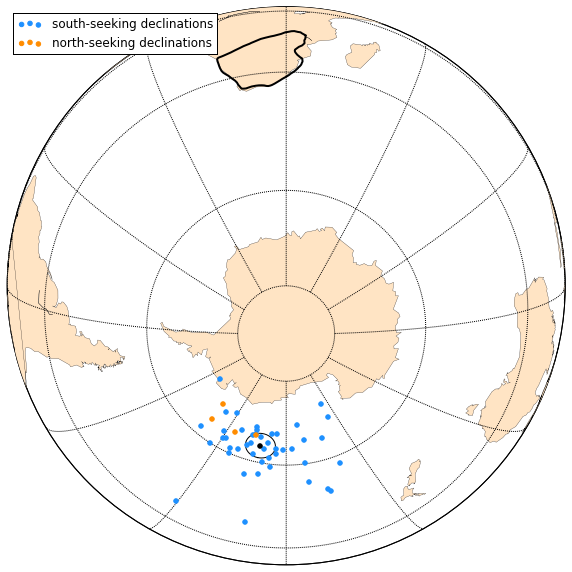

In [152]:
#create basemap for VGP plot with all poles in same polarity
plt.figure(figsize=(10, 10))
m1 = Basemap(projection='ortho',lat_0=-80,lon_0=30,resolution='c',
             area_thresh=50000)
m1.drawcoastlines(linewidth=0.25)
m1.fillcontinents(color='bisque',lake_color='white',zorder=1)
m1.drawmapboundary(fill_color='white')
m1.drawmeridians(np.arange(0,360,30))
m1.drawparallels(np.arange(-90,90,30))
m1.readshapefile('../Data/Kalahari_Outline/reconstructed_0Ma_PLATE_ID__7702','Kalahari',
                 drawbounds=True,zorder=10,linewidth=2)
IPmag.vgpplot(m1,Umk_VGPs_a95_filtered_S['pole_long'].tolist(),
              Umk_VGPs_a95_filtered_S['pole_lat'].tolist(),
              color='dodgerblue',label='south-seeking declinations')
IPmag.vgpplot(m1,(180.+Umk_VGPs_a95_filtered_N['pole_long']).tolist(),
              (-1*Umk_VGPs_a95_filtered_N['pole_lat']).tolist(),
              color='darkorange',label='north-seeking declinations')
IPmag.poleplot(m1,222.3,-64.3,3.1,color='k')
plt.legend(loc='upper left')
plt.savefig('Code_Output/Umkondo_mean_pole.pdf')

In [153]:
IPmag.watson_common_mean(Umk_VGP_N_block,Umk_VGP_S_block)

Results of Watson V test: 

Watson's V:           18.1
Critical value of V:  7.6
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 8.8
Critical angle for M&M1990:   5.7



### Watson common mean test of R and N Umkondo data in directional space

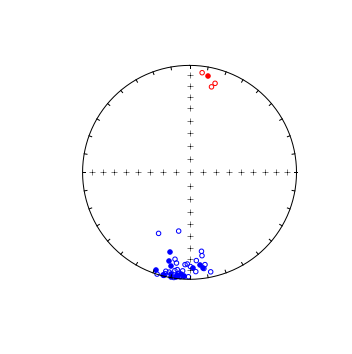

In [154]:
Umk_directions_S = IPmag.make_di_block(Umk_VGPs_a95_filtered_S['dec_tc'],
                                      Umk_VGPs_a95_filtered_S['inc_tc'])

Umk_directions_N = IPmag.make_di_block(Umk_VGPs_a95_filtered_N['dec_tc'],
                                      Umk_VGPs_a95_filtered_N['inc_tc'])

#reverse the polarity of data so that tests can be performed;...
#...module definitions require the mean populations be in the same polarity.
Umk_directions_N_flipped = IPmag.iflip(Umk_directions_N)

#dataset used to run the bootstrap and Watson tests for common means
fignum = 1
plt.figure(num=fignum,figsize=(5,5))
IPmag.iplotNET(1)
IPmag.iplotDI(Umk_directions_N,color='red')
IPmag.iplotDI(Umk_directions_S,color='blue')

Results of Watson V test: 

Watson's V:           8.1
Critical value of V:  8.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 13.9
Critical angle for M&M1990:   14.2
The McFadden and McElhinny (1990) classification for
this test is: 'C'


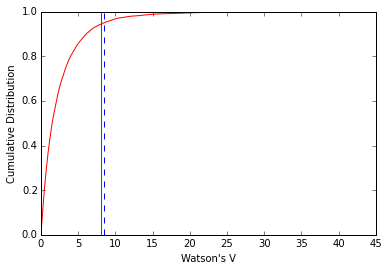

In [155]:
IPmag.watson_common_mean(Umk_directions_S, Umk_directions_N_flipped, NumSims=10000,
                         plot='yes')

In directional space, the north seeking and south seeking directions are consistent with sharing a common mean. In VGP space they are not. However, given that there are only 4 north-seeking directions, and that the north-seeking directions are therefore unlikely to average out secular variation, neither of these statistical tests comparing the two polarities are not particularly robust. The populations could be identical with the north-seeking polarity being poorly sampled. This analysis will be interesting to revisit if future work develops data from additional north-seeking sites within the LIP.

###Plotting up mean poles and generating Table 2 of main manuscript

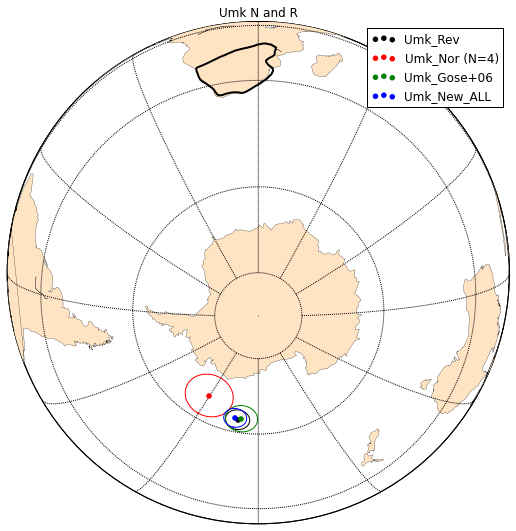

In [156]:
#create basemap for pole plot
plt.figure(figsize=(9, 9))
m1 = Basemap(projection='ortho',lat_0=-80,lon_0=30,resolution='c',
             area_thresh=50000)
m1.drawcoastlines(linewidth=0.25)
m1.fillcontinents(color='bisque',lake_color='white',zorder=1)
m1.readshapefile('../Data/Kalahari_Outline/reconstructed_0Ma_PLATE_ID__7702','Kalahari',
                 drawbounds=True,zorder=10,linewidth=2)
m1.drawmapboundary(fill_color='white')
m1.drawmeridians(np.arange(0,360,30))
m1.drawparallels(np.arange(-90,90,30))

IPmag.poleplot(m1,Umk_VGP_S_mean['dec'],Umk_VGP_S_mean['inc'],Umk_VGP_S_mean['alpha95'],
               label='Umk_Rev')
IPmag.poleplot(m1,Umk_VGP_N_mean['dec'],Umk_VGP_N_mean['inc'],Umk_VGP_N_mean['alpha95'],
               label='Umk_Nor (N=4)',color='r')
IPmag.poleplot(m1,218.8,-64,3.7,label='Umk_Gose+06',color='g')
IPmag.poleplot(m1,Umk_VGP_all_mean['dec'],Umk_VGP_all_mean['inc'],
               Umk_VGP_all_mean['alpha95'],label='Umk_New_ALL',color='b')

plt.title('Umk N and R')
plt.legend()
plt.show()

In [157]:
Umk_poles=[]
Umk_poles.append(Umk_VGP_all_mean)
Umk_poles.append(Umk_VGP_N_mean)
Umk_poles.append(Umk_VGP_S_mean)

UmkPoles = pd.DataFrame(data=Umk_poles, index=('Umk_New_ALL','Umk_North_Seeking',
                                             'Umk_South_Seeking'))
UmkPoles.loc['Gose et al. (2006)'] = pd.Series({'alpha95':'3.7', 
                                   'inc':-64, 
                                   'dec':218.8,
                                   'n':10,
                                   'k':172.2,
                                   'r':9.948}) 
#Insert other columns for complete table
# Tidy up table
UmkPoles = UmkPoles.rename(columns = {'csd':'CSD'})
UmkPoles = UmkPoles.rename(columns = {'alpha95':'A_95'})
UmkPoles = UmkPoles.rename(columns = {'dec':'Pole_Long'})
UmkPoles = UmkPoles.rename(columns = {'inc':'Pole_Lat'})
UmkPoles = UmkPoles.rename(columns = {'k':'K'})
UmkPoles = UmkPoles.rename(columns = {'n':'N'})
#reorder columns
UmkPoles = UmkPoles[['Pole_Lat','Pole_Long','A_95','K','CSD','N','r']]
UmkPoles

,Pole_Lat,Pole_Long,A_95,K,CSD,N,r
Umk_New_ALL,-63.958432,222.103677,2.642991,60.284528,10.432348,49,48.203776
Umk_North_Seeking,-67.072651,240.263175,5.614394,268.787124,4.940612,4,3.988839
Umk_South_Seeking,-63.580944,220.694431,2.784403,59.329719,10.515959,45,44.258382
Gose et al. (2006),-64.000000,218.800000,3.7,172.200000,NaN,10,9.948000


In [158]:
print UmkPoles.to_latex()

\begin{tabular}{lrrlrrrr}
\toprule
{} &   Pole\_Lat &   Pole\_Long &      A\_95 &           K &        CSD &   N &          r \\
\midrule
Umk\_New\_ALL        & -63.958432 &  222.103677 &  2.642991 &   60.284528 &  10.432348 &  49 &  48.203776 \\
Umk\_North\_Seeking  & -67.072651 &  240.263175 &  5.614394 &  268.787124 &   4.940612 &   4 &   3.988839 \\
Umk\_South\_Seeking  & -63.580944 &  220.694431 &  2.784403 &   59.329719 &  10.515959 &  45 &  44.258382 \\
Gose et al. (2006) & -64.000000 &  218.800000 &       3.7 &  172.200000 &        NaN &  10 &   9.948000 \\
\bottomrule
\end{tabular}



###Comparing VGPs between sills and dikes

All sites included in the compilation are sills with the exception of M-O-J which is a lava flow and Wil-1, Wil-2 and Palapye-dike which are dikes. Prompted by a reviewer's suggestion that there may be a statistical difference between the directions recorded by dikes and sills in the LIP these populations are considered in comparision to one another below.

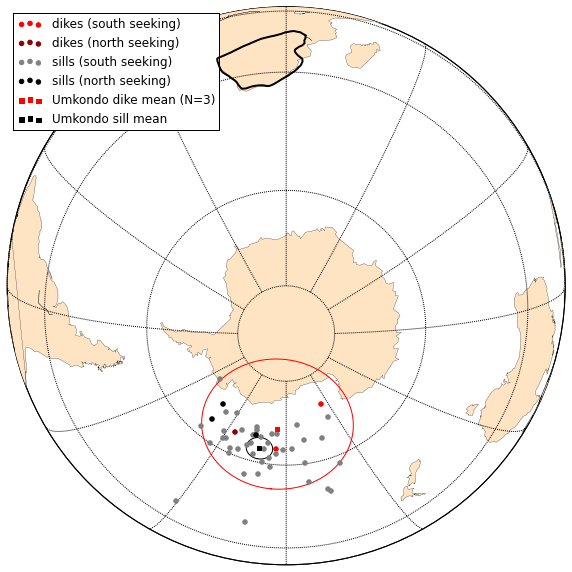

In [159]:
Umk_sills_S = Umk_VGPs_a95_filtered_S.drop(['Wil_1', 'Palapye_dike'])
Umk_sills_N = Umk_VGPs_a95_filtered_N.drop(['Wil_2'])

Umk_dikes_S = Umk_VGPs_a95_filtered_S.ix[['Wil_1','Palapye_dike']]
Umk_dikes_N = Umk_VGPs_a95_filtered_N.ix[['Wil_2']]

Umk_dikes_VGP = IPmag.make_di_block(Umk_dikes_S['pole_long'],
                                    Umk_dikes_S['pole_lat'])+IPmag.make_di_block(Umk_dikes_N['pole_long_rev'],
                                                                                  Umk_dikes_N['pole_lat_rev'])

Umk_sills_VGP = IPmag.make_di_block(Umk_sills_S['pole_long'],
                                    Umk_sills_S['pole_lat'])+IPmag.make_di_block(Umk_sills_N['pole_long_rev'],
                                                                                  Umk_sills_N['pole_lat_rev'])

Umk_dikes_mean = pmag.fisher_mean(Umk_dikes_VGP)
Umk_sills_mean = pmag.fisher_mean(Umk_sills_VGP)

plt.figure(figsize=(10, 10))
m1 = Basemap(projection='ortho',lat_0=-80,lon_0=30,resolution='c',
             area_thresh=50000)
m1.drawcoastlines(linewidth=0.25)
m1.fillcontinents(color='bisque',lake_color='white',zorder=1)
m1.drawmapboundary(fill_color='white')
m1.drawmeridians(np.arange(0,360,30))
m1.drawparallels(np.arange(-90,90,30))
m1.readshapefile('../Data/Kalahari_Outline/reconstructed_0Ma_PLATE_ID__7702','Kalahari',
                 drawbounds=True,zorder=10,linewidth=2)
IPmag.vgpplot(m1,Umk_dikes_S['pole_long'].tolist(),Umk_dikes_S['pole_lat'].tolist(),
              color='red',label='dikes (south seeking)')
IPmag.vgpplot(m1,Umk_dikes_N['pole_long_rev'].tolist(),Umk_dikes_N['pole_lat_rev'].tolist(),
              color='darkred',label='dikes (north seeking)')
IPmag.vgpplot(m1,Umk_sills_S['pole_long'].tolist(),Umk_sills_S['pole_lat'].tolist(),
              color='grey',label='sills (south seeking)')
IPmag.vgpplot(m1,Umk_sills_N['pole_long_rev'].tolist(),Umk_sills_N['pole_lat_rev'].tolist(),
              color='black',label='sills (north seeking)')
IPmag.poleplot(m1,Umk_dikes_mean['dec'],Umk_dikes_mean['inc'],Umk_dikes_mean['alpha95'],
               label='Umkondo dike mean (N=3)',color='r',marker='s')
IPmag.poleplot(m1,Umk_sills_mean['dec'],Umk_sills_mean['inc'],Umk_sills_mean['alpha95'],
               label='Umkondo sill mean',marker='s')
plt.legend(loc='upper left')
plt.show()

Results of Watson V test: 

Watson's V:           1.9
Critical value of V:  11.4
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 6.0
Critical angle for M&M1990:   14.8
The McFadden and McElhinny (1990) classification for
this test is: 'C'


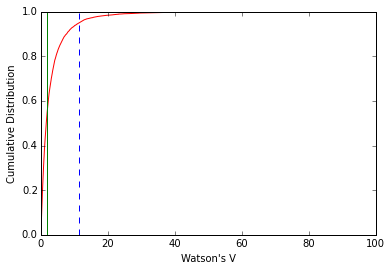

In [160]:
IPmag.watson_common_mean(Umk_dikes_VGP, Umk_sills_VGP, NumSims=10000,
                         plot='yes')

The VGPs from the dikes (N=3) and the sills (N=47) pass the Watson test for a common mean. However, given that there are only three VGPs from dikes this test is not particularly robust.

### Calculate scatter values, S$_{w}$, for each VGP used in this study, according to Biggin (2008)

Add necessary values to master VGP table (above: 'All_Umk_VGPs_edit'), then calculate S$_{b}$ for the Umkondo pole.

The scatter parameter for the distribution, Sb:
10.0558433204


/Users/taylorkilian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/taylorkilian/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


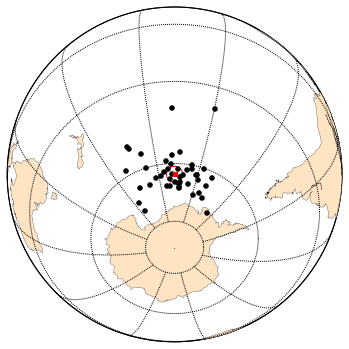

In [161]:
#First restructured table so sb_vgp_calc func recognizes column names etc.
#All_Umk_VGPs_S will be used *just* for calculating the scatter
All_Umk_VGPs_scatter = pd.DataFrame(data=Umk_VGPs_a95_filtered)
for n in range(len(All_Umk_VGPs_scatter)):
    if All_Umk_VGPs_scatter['pole_lat'][n] > 0:
        All_Umk_VGPs_scatter['pole_lat'][n] = np.float(
            -1.*Umk_VGPs_a95_filtered['pole_lat'][n])
        All_Umk_VGPs_scatter['pole_long'][n] = np.float(
            180.+Umk_VGPs_a95_filtered['pole_long'][n])

#function reads in site_lon, so changed the column name
All_Umk_VGPs_scatter = All_Umk_VGPs_scatter.rename(columns = {'site_long':'site_lon'})

#we can only use means when a k value (precision parameter) is give...
#...therefore we need to eliminate sites w/o k values from the...
#...scatter analysis - 4 sites from Mare+06 and Wilson+87
All_Umk_VGPs_scatter = All_Umk_VGPs_scatter[All_Umk_VGPs_scatter.k.notnull()]

Sb = IPmag.sb_vgp_calc(All_Umk_VGPs_scatter)

print 'The scatter parameter for the distribution, Sb:'
print Sb

### Elongation and Inclination - comparison to TK03 model          

In [162]:
def elong_calc(DIblock):
    #convert to cartesian
    DI_cart = pmag.dir2cart(DIblock)
    #create T matrix
    #Could use the function from pmag: pmag.Tmatrix(Umk_cart_cart),...
    #...however I don't know what the input should be, so did manually...
    #...according to Tanaka (1999)
    T_matrix = [[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
    T_matrix[0][0] = np.sum((DI_cart[:,0]**2))
    T_matrix[0][1] = np.sum((DI_cart[:,0]*DI_cart[:,1]))
    T_matrix[1][0] = np.sum((DI_cart[:,0]*DI_cart[:,1]))
    T_matrix[1][1] = np.sum((DI_cart[:,1]**2))
    T_matrix[0][2] = np.sum((DI_cart[:,0]*DI_cart[:,2]))
    T_matrix[2][0] = np.sum((DI_cart[:,0]*DI_cart[:,2]))
    T_matrix[1][2] = np.sum((DI_cart[:,1]*DI_cart[:,2]))
    T_matrix[2][1] = np.sum((DI_cart[:,1]*DI_cart[:,2]))
    T_matrix[2][2] = np.sum((DI_cart[:,2]**2))
    #calculate eigenvalues and eigenvectors for the T matrix
    eigvalues = pmag.tauV(T_matrix)
    t1 = eigvalues[0][0]
    t2 = eigvalues[0][1]
    t3 = eigvalues[0][2]
    elong = t2/t3
    return elong

def elong_bootstrap(DIblock, nb=5000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(DIblock)
        pseudo_elong = elong_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(np.absolute(mean['inc']))
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elong_calc(DIblock), 4)
    mean = pmag.fisher_mean(DIblock)
    inc = np.absolute(mean['inc'])
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high], elong_list
    print elong, low, high, inc, inc_low, inc_high

In [163]:
Umk_direction_N_block = IPmag.make_di_block(Umk_VGPs_a95_filtered_N['dec_tc']+180,
                                     Umk_VGPs_a95_filtered_N['inc_tc']*-1)

Umk_direction_S_block = IPmag.make_di_block(Umk_VGPs_a95_filtered_S['dec_tc'],
                                     Umk_VGPs_a95_filtered_S['inc_tc'])

Umk_direction_all_block = Umk_direction_N_block+Umk_direction_S_block

In [164]:
Umk_elong, Umk_inc, Umk_elong_list = elong_bootstrap(Umk_direction_all_block, nb = 10000)
print '(elongation, elong_low, elong_high):'
print Umk_elong
print '(inclination, inc_low, inc_high)'
print Umk_inc

(elongation, elong_low, elong_high):
[2.706, 1.7678, 5.1806]
(inclination, inc_low, inc_high)
[3.5626988341553645, 0.3843, 7.3514]


###Data from the Ethiopian Traps

Tauxe et al., (2008) included a compilation of elongation data from large igneous provinces (Deccan, Faroe, Kerguelen, and Yemen) and reported the calculated values and bootstrapped confidence intervals. Tauxe and Kodama (2009) added additional data from the Ethiopia Traps and the North Shore Volcanic Group where the parameters were plotted, but not tabulated. These data are reanalyzed here in order to plot them on a compilation with the new Umkondo elongation estimate. We also analyze the Kerguelen data and confirm that our method yields the same estimate as that presented in Tauxe et al. (2008).

In [165]:
def flip(D):
    """
     flip reverse mode
    """
    ppars=pmag.doprinc(D) # get principle direction
    Data =[]
    for rec in D:
        ang=pmag.angle([rec[0],rec[1]],[ppars['dec'],ppars['inc']])
        if ang>90.:
            d,i=(rec[0]-180.)%360.,-rec[1]
            Data.append([d,i,1.])
        else:
            Data.append([rec[0],rec[1],1.])
    return Data

In [166]:
#Ethiopia data
ET_data=pd.read_csv('../Data/Prior_Data/Rochette1998a.csv',header=0)
ET_dirs = ET_data.as_matrix()
ET_unit = []
ET_unit_flip = []
ET_unit_dir = []
for n in range(len(ET_dirs)):
    ET_unit.append([ET_dirs[n][3],ET_dirs[n][4],1.])
    
ET_unit_flip = flip(ET_unit)

ET_unit_dir = np.asarray(ET_unit_flip)

ET_elong = elong_calc(ET_unit_dir) 

# #create and populate table of elongations and inclinations
ET_local_mean = pmag.fisher_mean(ET_unit_flip)
ET_elong_boot, ET_inc_boot, ET_elong_list = elong_bootstrap(ET_unit_dir, nb = 10000)

print 'The elongation parameter for Ethiopian LIP and 95% bootstrapped error bounds:'
print '(elongation, elong_low, elong_high):'
print ET_elong_boot
print '(inclination, inc_low, inc_high)'
print ET_inc_boot

The elongation parameter for Ethiopian LIP and 95% bootstrapped error bounds:
(elongation, elong_low, elong_high):
[2.8405, 1.9024, 4.9301]
(inclination, inc_low, inc_high)
[0.88181528616860094, 0.0899, 6.8565]


In [167]:
#prepare data array to calculations...
#...dec/inc of poles in same polarity
Ker_data=pd.read_csv('../Data/Prior_Data/Kerguelen_data.csv',sep='\t',header=None)
Ker_dirs = Ker_data.as_matrix()
Ker_unit = []
Ker_unit_dir = []
for n in range(len(Ker_dirs)):
    Ker_unit.append([Ker_dirs[n][1],Ker_dirs[n][0],1.])

Ker_unit_flip = flip(Ker_unit)

Ker_unit_dir = np.asarray(Ker_unit_flip)

Ker_elong = elong_calc(Ker_unit_dir) 

#create and populate table of elongations and inclinations
Ker_local_mean = pmag.fisher_mean(Ker_unit_dir)
Ker_elong_boot, Ker_inc_boot, Ker_elong_list = elong_bootstrap(Ker_unit_dir, nb = 10000)

print 'The elongation parameter for Kerguelen LIP and 95% bootstrapped error bounds:'
print '(elongation, elong_low, elong_high):'
print Ker_elong_boot
print '(inclination, inc_low, inc_high)'
print Ker_inc_boot

The elongation parameter for Kerguelen LIP and 95% bootstrapped error bounds:
(elongation, elong_low, elong_high):
[1.2235, 1.0708, 2.4654]
(inclination, inc_low, inc_high)
[69.194514799337554, 66.8341, 71.4567]


The North Shore Volcanic Group (NSVG) is comprised of two main limbs with distinct stratigraphy and radiometric age control. The southwest limb of the NSVG was particularly well-sampled by Tauxe and Kodama (2009) and those sites can be bracketed with age control from the 40th Ave icelandite (Davis and Green, 1997; 1098.4 ± 1.9 Ma) and the Palisade rhyolite (Davis and Green, 1997; 1096.6 ± 1.7 Ma).

In [168]:
Tauxe_NSVG_Data=pd.read_csv('../Data/Prior_Data/Tauxe2009a_data.csv',sep=',')
Tauxe_NSVG_Data

NSVG_nswu=Tauxe_NSVG_Data.ix[Tauxe_NSVG_Data['sequence'] == 'nswu']
NSVG_nswu.reset_index(inplace=True)

NSVG_nneu=Tauxe_NSVG_Data.ix[Tauxe_NSVG_Data['sequence'] == 'nneu']
NSVG_nneu.reset_index(inplace=True)

NSVG_u_directions = []

for n in range(0,len(NSVG_nswu)): 
    dec,inc=NSVG_nswu['dec_tc'][n],NSVG_nswu['inc_tc'][n]
    NSVG_u_directions.append([dec,inc,1.])
    
for n in range(0,len(NSVG_nneu)): 
    dec,inc=NSVG_nneu['dec_tc'][n],NSVG_nneu['inc_tc'][n]
    NSVG_u_directions.append([dec,inc,1.])
    
NSVG_u_dir = np.asarray(NSVG_u_directions)

NSVGu_elong, NSVGu_inc, NSVGu_elong_list = elong_bootstrap(NSVG_u_dir, nb = 10000)

print 'The elongation parameter for the nswu and nneu sequences of the NSVG and 95% bootstrapped error bounds:'
print '(elongation, elong_low, elong_high):'
print NSVGu_elong
print '(inclination, inc_low, inc_high)'
print NSVGu_inc

The elongation parameter for the nswu and nneu sequences of the NSVG and 95% bootstrapped error bounds:
(elongation, elong_low, elong_high):
[1.7247, 1.188, 3.0916]
(inclination, inc_low, inc_high)
[43.620553653382075, 40.8621, 46.1257]


In [169]:
ET_elong_boot

[2.8405, 1.9024, 4.9301]

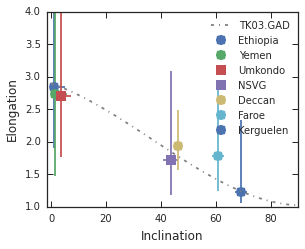

In [170]:
Ethiopian_elong_err = [[ET_elong_boot[0]-ET_elong_boot[1]],
                       [ET_elong_boot[2]-ET_elong_boot[0]]]
Ethiopian_inc_err = [[ET_inc_boot[0]-ET_elong_boot[1]],
                     [ET_inc_boot[2]-ET_elong_boot[0]]]

NSVGu_elong_err = [[NSVGu_elong[0]-NSVGu_elong[1]],
                       [NSVGu_elong[2]-NSVGu_elong[0]]]
NSVGu_inc_err = [[NSVGu_inc[0]-NSVGu_inc[1]],
                     [NSVGu_inc[2]-NSVGu_inc[0]]]

Umk_elong_err = [[Umk_elong[0]-Umk_elong[1]],
                       [Umk_elong[2]-Umk_elong[0]]]
Umk_inc_err = [[Umk_inc[0]-Umk_inc[1]],
                     [Umk_inc[2]-Umk_inc[0]]]

#Pull in data from Tauxe et al. 2008 table
#from other large igneous provinces

#Yemen LIP (N=69)
Yemen_elong = 2.73
Yemen_inc = 1.56
Yemen_elong_err = [[2.73-1.48],[5.73-2.73]]
Yemen_inc_err = [[1.56-0.1],[5.7-1.56]]

#Deccan LIP (N=286)
Deccan_elong = 1.93
Deccan_inc = 46.1
Deccan_elong_err = [[1.93-1.56],[2.48-1.93]]
Deccan_inc_err = [[46.1-44.4],[47.9-46.1]]

#Faroe LIP (N=82)
Faroe_elong = 1.78
Faroe_inc = 60.9
Faroe_elong_err = [[1.78-1.24],[2.90-1.78]]
Faroe_inc_err = [[60.9-58.6],[63.1-60.9]]

#Kerguelen LIP (N=98)
Kerguelen_elong = 1.22
Kerguelen_inc = 69.2
Kerguelen_elong_err = [[1.22-1.06],[2.33-1.22]]
Kerguelen_inc_err = [[69.2-67.0],[71.4-69.2]]

xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

import seaborn as sns
sns.set_style('ticks',{'xtick.direction':'in','ytick.direction':'in'})
plt.figure(figsize=(4.5,3.5))
plt.errorbar(ET_inc_boot[0], ET_elong_boot[0], xerr=Ethiopian_inc_err,
             yerr=Ethiopian_elong_err, fmt='o', ms=10, label='Ethiopia')
plt.errorbar(Yemen_inc, Yemen_elong, xerr=Yemen_inc_err, 
             yerr=Yemen_elong_err, fmt='o', ms=10, label='Yemen')
plt.errorbar(Umk_inc[0], Umk_elong[0],
             xerr=Umk_inc_err,
             yerr=Umk_elong_err,
             fmt='s', ms=10, label='Umkondo')
plt.errorbar(NSVGu_inc[0], NSVGu_elong[0], xerr=NSVGu_inc_err,
             yerr=NSVGu_elong_err, fmt='s', ms=10, label='NSVG')
plt.errorbar(Deccan_inc, Deccan_elong, xerr=Deccan_inc_err, 
             yerr=Deccan_elong_err, fmt='o', ms=10, label='Deccan')
plt.errorbar(Faroe_inc, Faroe_elong, xerr=Faroe_inc_err, 
             yerr=Faroe_elong_err, fmt='o', ms=10, label='Faroe')
plt.errorbar(Kerguelen_inc, Kerguelen_elong, xerr=Kerguelen_inc_err, 
             yerr=Kerguelen_elong_err, fmt='o', ms=10, label='Kerguelen')

plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD',linestyle='-.')
plt.xlim([-1.5,90])
plt.ylim([1,4])
plt.xlabel('Inclination', fontsize='12')
plt.ylabel('Elongation', fontsize='12')
plt.legend()
plt.savefig('Code_Output/EI.svg')
plt.show()

The bootstrap error bounds for elongation values are generally large and this is the case for the new Umkondo data. Broadly speaking, the elongation/inclination pair from the Umkondo compilation is within the range of that predicted by the TK03GAD model, and it is also very much within the bounds of the existing data from the the Yemen LIP. The elongation direction should be mostly in the up-down plane for a dataset with paleolatitude of ~ 0 degrees. To evalatuate the elongation direction, we plot the Bingham mean and a95 ellipse for the dataset in local coordinates.

In [171]:
#Export file to use for Bingham plot...
#...use command line eqarea_ell.py to create plots (below)

Umk_di_mean = pmag.fisher_mean(Umk_direction_all_block)

Umk_data_rot = []
for n in range(len(Umk_direction_all_block)):
    dr,ir = pmag.dotilt(Umk_direction_all_block[n][0],Umk_direction_all_block[n][1],Umk_di_mean['dec'],
                        90.+Umk_di_mean['inc'])
    Umk_data_rot.append([dr,ir])

Umk_data_rot = pd.DataFrame(Umk_data_rot)
Umk_data_rot.to_csv('Code_Output/Umk_data_rot.txt', sep=' ',
                   header=False,index=False)

Below are output plots from the pmagpy routine named eqearea_ell.py, for Umkondo data rotated so that the mean direction is vertical.

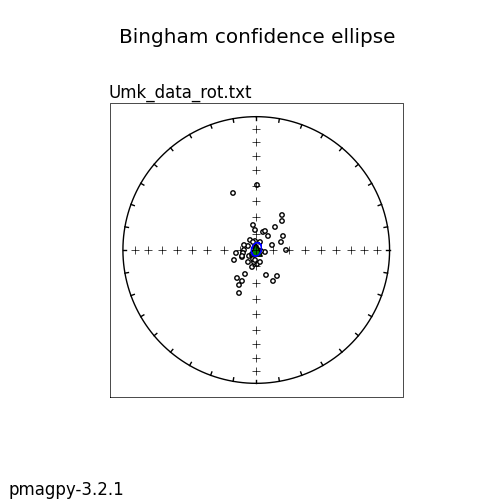

In [172]:
Umk_Bingh_rot=Image(filename='Local_PNGs/Umk_Bingham_vert.png',
                   height=500,width=500)
display(Umk_Bingh_rot)

From the plots above we can see that the major axis of the Bingham $\alpha$$_{95}$ ellipse, which indicates the direction with the highest error interval, is mostly along the up-down axis. Tauxe et al. (2008) stated that "directions...are elongate in the up-down plane at the equator." As can be seen in the plot of the Bingham confidence ellipse above, the elongation in the data set is mostly in the this plane.

## Cooling unit map - consolidated locality map (used for locality map in main text)

Make map plotting all localities of individual intrusion. This map is used to make the locality maps used in the main text and supplement of the paper.

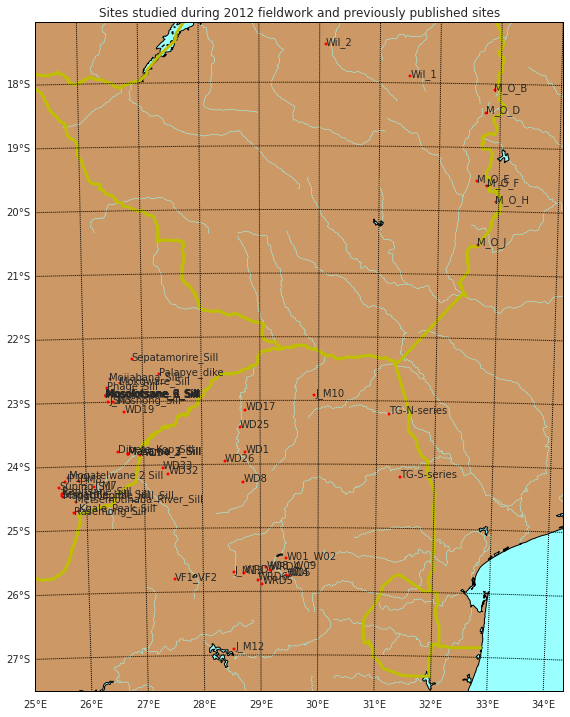

In [173]:
#!!!! using all sites regardless of a_95 value
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='cass',lat_0=-22.5,lon_0=29.5,llcrnrlat=-27.5,
            urcrnrlat=-17,llcrnrlon=25,urcrnrlon=34,lat_ts=-25,
            resolution='h',area_thresh = 0.1)
m.drawrivers(color='#99ffff')
m.drawcoastlines()
m.drawcountries(linewidth=3, color='y')
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
parallels = np.arange(-90,90,1)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
meridians = np.arange(0.,360.,1)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
plt.title('Sites studied during 2012 fieldwork and previously published sites')

s_long=[]
s_lat=[]
for n in range(0,len(All_Umk_VGPs)):
    s_long.append(All_Umk_VGPs['site_long'][n])          
    s_lat.append(All_Umk_VGPs['site_lat'][n])
x,y = m(s_long,s_lat)
m.plot(x, y, 'ro', markersize=3)

labels = All_Umk_VGPs.index    
for label, xpt, ypt in zip(labels, x, y):
    plt.text(xpt+1000, ypt, label)

plt.show()

##Kalahari and Grunehogna (crustal province in Antarctica)

An extension of the Kalahari craton occurs in the Grunehogna cratonic fragment in East Antarctica, which was detached from the main part of the craton during Gondwana breakup. Archean crust in the Grunehogna region is overlain by the Proterozoic Ritscherflya Supergroup, which contains basalt lavas at the top and is intruded by related dolerite sills. Geochronological and paleomagnetic evidence indicates that these mafic rocks are components of the Umkondo LIP (Groenewald et al., 1995; Hanson et al., 2006; Jacobs et al., 2008). Paleomagnetic data of Peters (1989) and Jones et al. (2003) when combined give a mean pole that overlaps with the Gose et al. (2006) Umkondo pole given the Euler rotation of Grunehogna to Kalahari of -9.67ºN, 328.77ºE, and 56.28ºCCW. This fit/Euler was recalculated given insights into the Neoproterozoic tectonics of Kalahari and Antarctica (Jacobs and Thomas, 2004), defined in Evans (2009) as -5.3ºN, 324.5ºE, 58.6ºCCW. Comparing our revised Umkondo pole with the Ritscherflya Supergroup using the Euler rotation proposed by Evans (2009) results in overlapping mean poles for the Umkondo and Ritscherflya poles (see the plot below which was made in J.P. Cogne's Paleomac software).

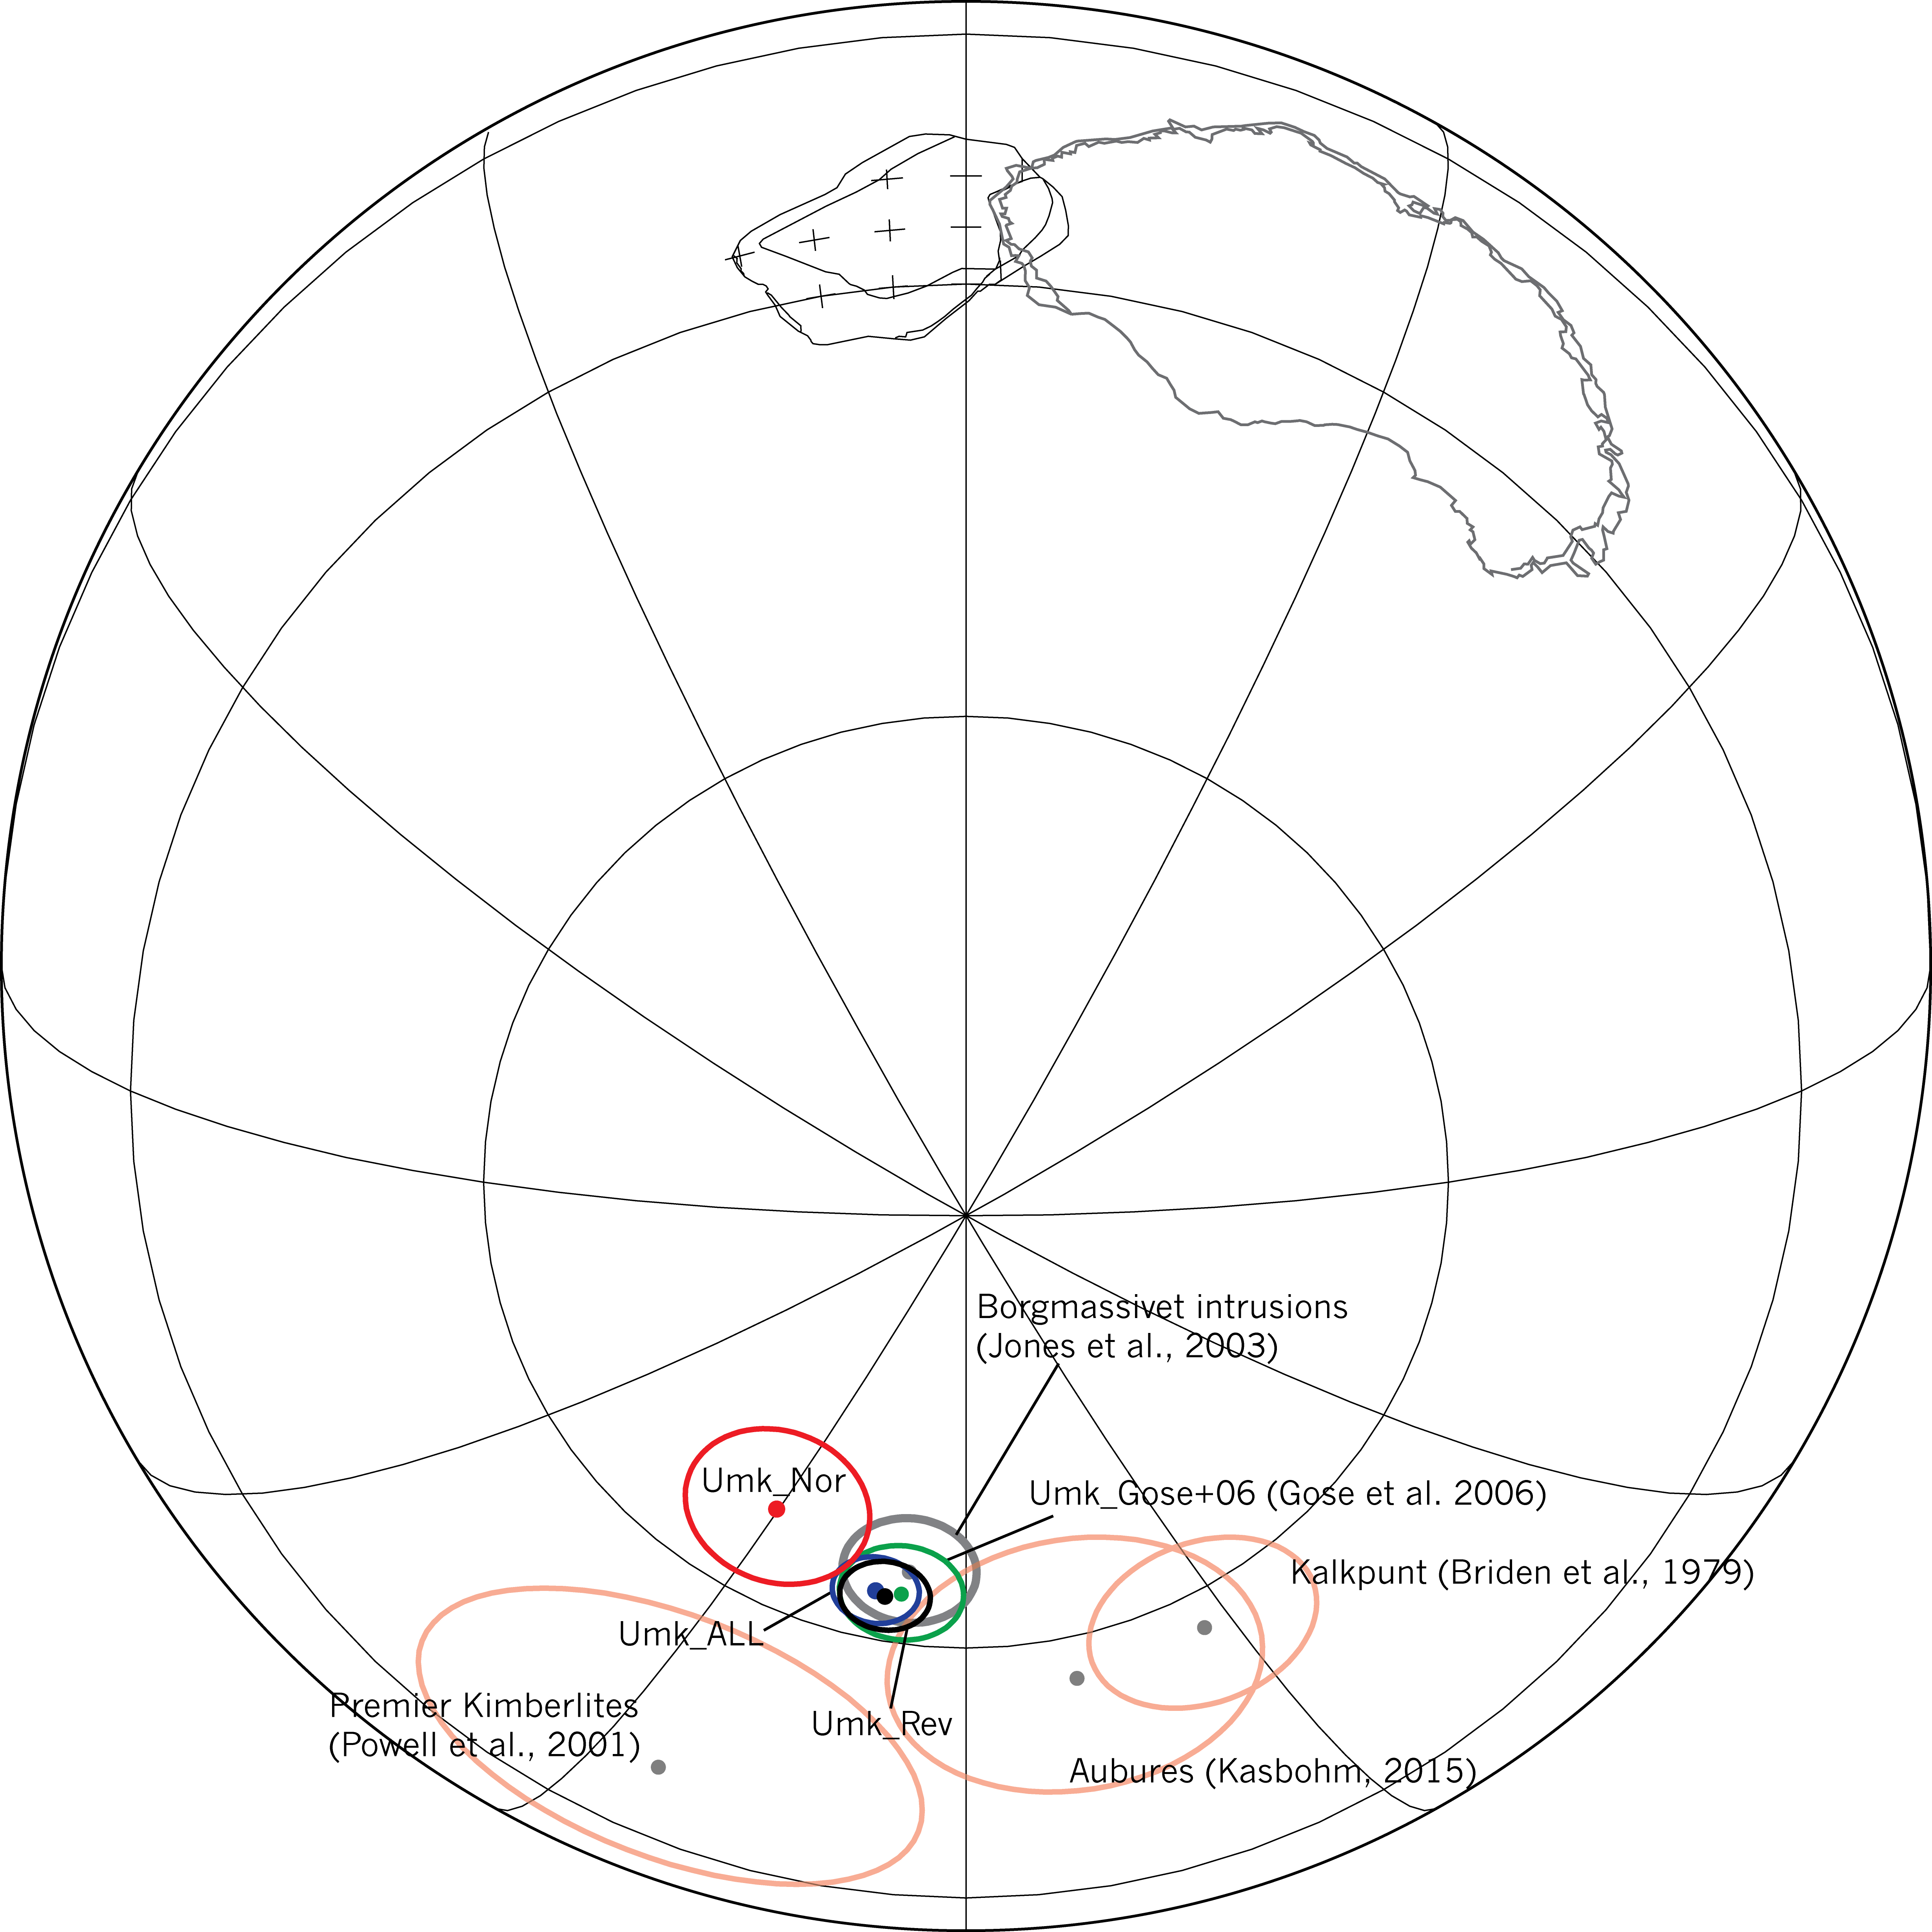

In [174]:
Grune_to_Kalah=Image(filename='./Local_PNGs/Grunehogna_to_Kalahari.png', width=650,
                     height=650)
display(Grune_to_Kalah)

# Gplates reconstruction (Paleopole references)

###Including pole abbreviations shown in reconstrution figure in main text

####Laurentia

Abit, Abitibi dykes - 1141 Ma (Ernst and Buchan 1993); M-lR1, MP Lower R1 - 1109 Ma (Swanson-Hysell et al. 2009); Nip, Nipigon Sills and Lavas, mean - 1115 to 1107 Ma (Borradaile and Middleton 2006); O-hR, Osler (high R) - 1105 Ma (Swanson-Hysell et al. 2014); M-lNuR, Mamainse (lower N/upper R) - 1100 Ma (Swanson-Hysell et al. 2009); M-uN, MP Upper N - 1095 Ma (Swanson-Hysell et al. 2009); PortLk, Portage Lake - 1093 Ma (Hnat et al. 2006); LST, Lake Shore Traps - 1087 Ma (Diehl and Haig 1994); None, Nonesuch shale - 1080 Ma (Henry et al. 1977); Freda, Freda sandstone - 1070 Ma (Henry et al. 1977); Hal, Haliburton Intrusions - 1015 Ma (Warnock et al. 2000).

####Kalahari

ENam, Namaqua Eastern Zone - less than 1165 ±10 Ma (Evans et al. 2002; Pettersson et al. 2007); Umkondo poles - three poles shown in Gplates videos: new Umkondo pole (this study; only Umkondo pole shown in Fig. 4 of main text) and the seperated normal and reversed means (this study); Borg, Borgmass Intrusives Grunehogna - ~1131 Ma (Jones et al. 2003); Aub, Aubures Fm - less than 1108 ±9 Ma (Kasbohm et al. 2015); Kalk, Kalkpunt Fm. - 800 to 1065 Ma (Briden et al. 1979; Pettersson et al. 2007); Ntim, Ntimbankulu pluton - 1030 to 1060 Ma (Mare and Thomas 1998); CNam, Central Namaqua belt - 1030 to 1000 Ma (Onstott et al. 1986; Powell et al. 2001); PEc, Port Edward Charnockite - 1004 ±5 Ma (Gose et al. 2004)

#Works Cited in Supporting Information

Davis, D. and Green, J., 1997. Geochronology of the North American Midcontinent rift in western Lake Superior and implications for its geodynamic evolution: Canadian Journal of Earth Science, v. 34, p. 476–488.

Evans, D., 2009. The palaeomagnetically viable, long-lived and all-inclusive Rodinia supercontinent reconstruction, in Ancient Orogens and Modern Analogues, vol. 327, pp. 371–404, eds Murphy, J., Keppie, J., & Hynes, A., Geological Society of London Special Publication.

Gose, W. A., Hanson, R. E., Dalziel, I. W. D., Pancake, J. A., & Seidel, E. K., 2006. Paleomagnetism of the 1.1 Ga Umkondo large igneous province in southern Africa, J. Geophys. Res., 111(B9), 10.1029/2005JB003897.

Groenewald, P.B., Moyes, A.B., Grantham, G.H., and Krynauw, J.R., 1995. East Antarctic crustal evolution: Geological constraints and modelling in western Dronning Maud Land, Precambrian Research, 75, 231-250.

Hanson, R., Crowley, J., Bowring, S., Ramezani, J., Gose, W., Dalziel, I., Pancake, J., Seidel, E., Blenkinsop, T., & Mukwakwami, J., 2004. Coeval large-scale magmatism in the Kalahari and Laurentian Cratons during Rodinia assembly, Science, 304, 1126–1129.

Hargraves, R., Hattingh, P., & Onstott, T., 1994. Palaeomagnetic results from the Timbvati Gabbros in the Kruger National Park, South Africa, South African Journal of Geology, 97(2), 114–118.

McDonald, A. J. & Andersen, H. T., 1973. Paleomagnetic study of gabbros, ultrabasic rocks and granulites in the basement core of the Vredefort Dome,, Master’s thesis, Univ. of Witwaters- rand, Johannesburg, South Africa.
McElhinny, M., 1964. Statistical significance of the fold test in paleomagnetism, Royal Astronomical Society Geophysical Journal, 80, 338–340.

McElhinny, M., 1966. The paleomagnetism of Umkondo lavas, eastern southern Rhodesia, Geophysical Journal of the Royal Astronomical Society, 10(4), 375–381.

McLean, N. M., Bowring, J. F., & Bowring, S. A., 2011. An algorithm for U-Pb isotope dilution data reduction and uncertainty propagation, Geochem. Geophys. Geosyst., 12, Q0AA18.

Pancake, J., 2001. Geochronological and paleomagnetic studies of Mesoproterozoic mafic igneous rocks in Botswana, Master’s thesis, Texas Christian University.

Peters, M., 1989. Igneous rocks in western and central Neuschwabenland, Vestfjella and Ahlmannryggen, Antarctica: Petrography, geochemistry, geochronology, paleomagnetism, geotectonic implications, Berichte zur Polarforschung, 61, 186. 

Powell, C., Jones, D., Pisarevsky, S., & Wingate, M., 2001. Paleomagnetic constraints on the position of the Kalahari craton in Rodinia, Precambrian Research, 110, 33–46.

Seidel, E., 2004. Paleomagnetic and geochronological study of parts of the 1.1 Ga Umkondo igneous province in South Africa, Ph.D. thesis, Texas Christian University.

Stocklmayer, V.R., 1978. The geology of the country around Inyanga. Southern Rhodesia Geological Survey Bulletin 79, 173p.

Tanaka, H., 1999. Circular asymmetry of the paleomagnetic directions observed at low latitude volcanic sites, 51(12), 1279–1286.

Tauxe, L., Kodama, K., & Kent, D., 2008. Testing corrections for paleomagnetic inclination error in sedimentary rocks: A comparative approach, Physics of the Earth and Planetary Interiors, 169(1-4), 152–165.

Tyndale-Biscoe, R., 1957. The geology of a portion of the Inyanga District. Southern Rhodesia Geological Survey Short Report 2, 11p.

Watson, R.L.A., 1969. The geology of the Cashel, Melsetter, and Chipinga areas. Rhodesia Geological Survey Bulletin 60, 85p.